# Modeling the Joint Distribution of Wind Speed and Direction  using Gaussain Mixture Models

OEN Method: Harris, Cook
The parent wind speed distribution: Why Weibull?
http://www.sciencedirect.com/science/article/pii/S0167610514001056

Gaussian Mixture Models, 
http://scikit-learn.org/stable/modules/mixture.html

# 1. Set up

## 1.1 Environment

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from import_file import *
from helpers.parallel_helper import *
load_libs()

plt.rcParams['axes.autolimit_mode'] = 'round_numbers'
plt.rcParams['axes.xmargin'] = 0.
plt.rcParams['axes.ymargin'] = 0.
mpl.rcParams['patch.force_edgecolor'] = True

## 1.2 Read Data

In [2]:
# Venezula
# file_path= './data/NCDC/arturo/dat.txt' # misdirection
# file_path= './data/NCDC/simon_bolivar_intl/dat.txt' # misdirection

# file_path, bandwidth= './data/NCDC/europe/uk/marham/dat.txt', 1.7
# file_path, bandwidth, NUMBER_OF_GAUSSIAN= './data/NCDC/europe/uk/tiree/dat.txt', 1.9, 4 
# file_path, bandwidth, NUMBER_OF_GAUSSIAN = './data/NCDC/europe/uk/boscombe_down/dat.txt', 1.5, 4
# file_path, bandwidth= './data/NCDC/europe/uk/middle_wallop/dat.txt', 1.3
# file_path, bandwidth= './data/NCDC/europe/uk/bournemouth/dat.txt',1.3 # 4?
# file_path= "./data/NCDC/europe/uk/weybourne/dat.txt"
# file_path= "./data/NCDC/europe/uk/skye_lusa/dat.txt" # 
# file_path= "./data/NCDC/europe/uk/wattisham/dat.txt"
# file_path= "./data/NCDC/europe/uk/south_uist_range/dat.txt" # inpropoer direction R square measure
# file_path= "./data/NCDC/europe/uk/holbeach/dat.txt" # inpropoer direction R square measure
# file_path= "./data/NCDC/europe/uk/cambridge/dat.txt" # inpropoer direction R square measure
# file_path= "./data/NCDC/europe/us/baltimore/dat.txt" # time too short
# file_path= "./data/NCDC/europe/uk/bealach_na_ba/dat.txt" # time too short
# file_path= "./data/NCDC/europe/uk/benbecula/dat.txt" # truncate (untruncate in m/s), 4?
# file_path= './data/NCDC/europe/uk/southhamption/dat.txt' # high 0, trend

# file_path, bandwidth, NUMBER_OF_GAUSSIAN = "./data/NCDC/europe/germany/landsberg_lech/dat.txt", 0.9, 4 
# file_path, bandwidth= "./data/NCDC/europe/germany/neuburg/dat.txt", 0.7
# file_path, bandwidth= "./data/NCDC/europe/germany/laupheim/dat.txt", 0.7 # double peak, 4?, trend
# file_path, bandwidth= './data/NCDC/europe/germany/niederstetten/dat.txt', 0.9 # get the peak
# file_path, bandwidth= "./data/NCDC/europe/germany/holzdorf/dat.txt", 0.9 # 2008 year
# file_path, bandwidth, NUMBER_OF_GAUSSIAN= './data/NCDC/europe/france/nantes/dat.txt', 0.9, 4 # unit shift, one direction deviate big
# file_path= './data/NCDC/europe/france/pau_pyrenees/dat.txt' # unit shift, 2; force using knot 
# file_path= "./data/NCDC/europe/france/avord/dat.txt" # try 4, initial speed (should be good with m/s), incompete dataset
# file_path= "./data/NCDC/europe/france/vatry/dat.txt"  # double peak, initial speed, incompete dataset
# file_path, bandwidth, NUMBER_OF_GAUSSIAN= "./data/NCDC/europe/spain/valladolid/dat.txt", 1.1, 4
# file_path= './data/NCDC/europe/spain/jerez/dat.txt' # high 0
# file_path, bandwidth= "./data/NCDC/europe/spain/barayas/dat.txt", 0.7 # not good fit
# file_path, bandwidth= './data/NCDC/europe/spain/malaga/dat.txt', 0.7 # directions blocked?
# file_path, bandwidth= './data/NCDC/europe/spain/tenerife_sur/dat.txt', 0.7 # directions blocked?
# file_path, bandwidth= './data/NCDC/europe/spain/almeria/dat.txt', 0.7 # negative dimensions?
# file_path, bandwidth= './data/NCDC/europe/greece/eleftherios_intl/dat.txt',0.7 # some direction might be blocked
# file_path= './data/NCDC/europe/ciampino/dat.txt' # try 4, bandwidth?
# file_path= "./data/NCDC/europe/huspel_aws/dat.txt"  # integer, 4?
# file_path= './data/NCDC/gibraltar/dat.txt' # bad fit

# MidEast
# file_path, bandwidth= './data/NCDC/mideast/uae/al_maktoum/dat.txt', 1.1
# file_path= './data/NCDC/mideast/uae/sharjah_intl/dat.txt' 
# file_path= './data/NCDC/mideast/uae/dubai_intl/dat.txt' 
# file_path= './data/NCDC/mideast/uae/abu_dhabi_intl/dat.txt' # Time shift
# file_path= './data/NCDC/mideast/uae/bateen/dat.txt' # Time shift
# file_path= './data/NCDC/mideast/buraimi/dat.txt' # not good dataset
# file_path= './data/NCDC/mideast/turkey/konya/dat.txt' 
# file_path= './data/NCDC/mideast/turkey/sivas/dat.txt' # bad dataset
# file_path= './data/NCDC/mideast/turkey/balikesir/dat.txt' # bad dataset
# file_path= './data/NCDC/mideast/turkey/bartin/dat.txt' # bad dataset
# file_path= './data/NCDC/mideast/iran/chahbahar/dat.txt'
# file_path= './data/NCDC/mideast/iran/zabol/dat.txt' # Problematic data
# file_path= './data/NCDC/mideast/iran/torbat_heydarieh/dat.txt' # Unusable

# file_path, bandwidth = "./data/NCDC/cn/shanghai/hongqiao_intl/dat.txt", 0.6
# file_path, bandwidth= "./data/NCDC/cn/shanghai/pudong/dat.txt", 0.8
# file_path, bandwidth= "./data/NCDC/cn/hefei_luogang/dat.txt", 0.6 # few 0, trend, try 2
# file_path, bandwidth= "./data/NCDC/cn/nanjing_lukou/dat.txt", 0.5
# file_path= "./data/NCDC/cn/zhengzhou_xinzheng/dat.txt" 
# file_path= "./data/NCDC/cn/tianjin/binhai/dat.txt" # few 0, trend, stationary speed, unstationary direction
# file_path= "./data/NCDC/cn/tianjin/tianjing/dat.txt" # 16 sectors
# file_path= "./data/NCDC/cn/shijiazhuang_zhengding/dat.txt" 
# file_path= "./data/NCDC/cn/henan_gushi/dat.txt" # 16 sectors, fit not very good
# file_path= "./data/NCDC/cn/nanning_wuxu/dat.txt" # numpy priblem, unstationary speed
# file_path= './data/NCDC/cn/macau/dat.txt'  
# file_path= "./data/NCDC/cn/hk_intl/dat.txt" # few 0
# file_path= './data/NCDC/cn/gaoqi/dat.txt' 

# file_path= './data/NCDC/southeast_asia/malaysia/mersing/dat.txt' # 2 mode, paper comparison
# file_path= './data/NCDC/southeast_asia/malaysia/penang/dat.txt'
# file_path= './data/NCDC/southeast_asia/malaysia/butterworth/dat.txt' # 2 mode 
# file_path= "./data/NCDC/southeast_asia/malaysia/bsultan_mahmud/dat.txt" # stable
# file_path= "./data/NCDC/southeast_asia/malaysia/bsultan_ismail/dat.txt" # 
# file_path= "./data/NCDC/southeast_asia/singapore/changi/dat.txt" # trend, no 0, questionary data
# file_path= "./data/NCDC/southeast_asia/singapore/paya_lebar/dat.txt" # questionary data
# file_path= "./data/NCDC/southeast_asia/singapore/seletar/dat.txt"
# file_path= "./data/NCDC/east_asia/cheongju_intl/dat.txt" # 2005-2009  may have problem, fit is good; numpy problem
# file_path= "./data/NCDC/east_asia/daegu_ab/dat.txt" # recent 5 year may have problem, but fit is generally good; numpy problem

# file_path, bandwidth= "./data/NCDC/oceania/auckland_intl/dat.txt", 0.9  # Good data, double mode
# file_path= "./data/NCDC/oceania/brisbane_archerfield/dat.txt" # high 0, few data 
# file_path= "./data/NCDC/oceania/narrandera/dat.txt" # high 0, few data
# file_path, bandwidth= "./data/NCDC/oceania/canberra/dat.txt", 0.7 # high 0, bad fit
# file_path, bandwidth, NUMBER_OF_GAUSSIAN= './data/NCDC/oceania/horsham/dat.txt', 0.9, 4 # get the peak

# file_path, bandwidth= './data/NCDC/us/boston_16nm/dat.txt', 0.9 # Offshore, mixed type

# file_path, bandwidth= './data/asos/olympia/hr_avg.csv', 0.5 # might block
# file_path, bandwidth, NUMBER_OF_GAUSSIAN  = './data/asos/bismarck_ND/hr_avg.csv', 1.1, 4
# file_path, bandwidth, NUMBER_OF_GAUSSIAN = './data/asos/aberdeen_SD/hr_avg.csv', 1.7, 2 # only to 2012
# file_path, bandwidth, NUMBER_OF_GAUSSIAN = './data/asos/minneapolis/hr_avg.csv', 1.1, 4
# file_path, bandwidth = './data/asos/lincoln_NE/hr_avg.csv', 0.9
# file_path, bandwidth = './data/asos/des_moines_IA/hr_avg.csv', 1.3
# file_path, bandwidth = './data/asos/springfield_IL/hr_avg.csv', 1.1 
# file_path, bandwidth = './data/asos/topeka/hr_avg.csv', 0.7 # High 0
# file_path, bandwidth = './data/asos/denver/hr_avg.csv', 1.3

# file_path, bandwidth, NUMBER_OF_GAUSSIAN = './data/NDAWN/baker/hr_avg.csv', 0.7, 4 
# file_path, bandwidth = './data/NDAWN/dickinson/hr_avg.csv', 0.6
# file_path = './data/NDAWN/rugby/hr_avg.csv'
# file_path = './data/NDAWN/bowman/hr_avg.csv'
# file_path = './data/NDAWN/grand_forks/hr_avg.csv'
# file_path = './data/NDAWN/williston/hr_avg.csv'
# file_path = './data/NDAWN/jamestown/hr_avg.csv'

# file_path, NUMBER_OF_GAUSSIAN = 'data/ECMWF/usa/47N123W/dat.csv', 4 # good enough
file_path = 'data/ECMWF/venezuela/8N67W/dat.csv' # can be coorect, still need other investigation.
# file_path = 'data/ECMWF/chile/52S75W/dat.csv' # good enough
# file_path = 'data/ECMWF/iceland/65N17W/dat.csv' # good enough
# file_path, NUMBER_OF_GAUSSIAN = 'data/ECMWF/germany/49N9E/dat.csv', 4 # miss peak
# file_path = 'data/ECMWF/sudan/18N32E/dat.csv' # good enough
# file_path = 'data/ECMWF/china/24N121E/dat.csv' # good enough
# file_path, NUMBER_OF_GAUSSIAN = 'data/ECMWF/australia/37S142E/dat.csv', 4 # miss the peak

In [3]:
if "cn_database" in file_path: 
    df = read_cn_database(file_path)
elif 'NCDC' in file_path:
    df = pd.read_csv(file_path, header=0, skipinitialspace=True, dtype={'HrMn':'object'})
    df.rename(columns={'Date':'date','Dir':'dir','Spd':'speed','Type':'type','I.1':'wind_type'}, inplace=True)
    df = df[['date','HrMn','type','dir','speed','wind_type' ]]
    df.dropna(subset=['dir','speed'], inplace=True)
    integer_data = True
elif 'NDAWN' in file_path:
    df = pd.read_csv(file_path, header=0, skipinitialspace=True, dtype={'HrMn':'object'})
    df['type']='default'
    df['wind_type']='default'
    df = df.dropna()
    convert_to_knot = False
    integer_data = False
elif 'asos' in file_path:
    # ASOS
    df = pd.read_csv(file_path, header=0, skipinitialspace=True, dtype={'HrMn':'object'})
    df['type']='default'
    df['wind_type']='default'
    df = df.dropna()
    convert_to_knot = False
    integer_data = False
    knot_unit = True
else:
    df = pd.read_csv(file_path, header=0, skipinitialspace=True)
    df.rename(columns={'U':'x','V':'y'}, inplace=True)
    df.x=-df.x
    df.y=-df.y
    df['speed']=np.sqrt(df.x**2+df.y**2)
    df['dir']=np.degrees(np.arctan2(df.y, df.x))%360
    df['time']=pd.to_datetime('1979-01-01T00:00:00Z')+pd.to_timedelta(df['time'], unit='h')
    df['date']=df['time'].dt.strftime('%Y%m%d')
    df['date']=df['date'].astype(int)
    df['HrMn']=df['time'].dt.strftime('%H00')
    df['type']='default'
    df['wind_type']='default'
    convert_to_knot = True
    integer_data = False
    cartesian = True

In [4]:
df

time  lat  lon         x         y     speed        dir  \
0     1979-01-01 00:00:00    8  293  3.193465  1.282236  3.441271  21.876385   
1     1979-01-01 06:00:00    8  293  3.755292  1.894354  4.206043  26.768623   
2     1979-01-01 12:00:00    8  293  4.169823  1.749044  4.521789  22.755746   
3     1979-01-01 18:00:00    8  293  4.774270  2.289687  5.294934  25.621862   
4     1979-01-02 00:00:00    8  293  2.714995  0.533149  2.766848  11.109913   
5     1979-01-02 06:00:00    8  293  3.350586  1.542004  3.688387  24.712789   
6     1979-01-02 12:00:00    8  293  4.124744  2.308235  4.726676  29.231675   
7     1979-01-02 18:00:00    8  293  4.091313  1.417061  4.329770  19.103959   
8     1979-01-03 00:00:00    8  293  2.373414  1.071804  2.604200  24.303338   
9     1979-01-03 06:00:00    8  293  2.825006  1.421410  3.162446  26.709377   
10    1979-01-03 12:00:00    8  293  4.220408  2.557760  4.934976  31.217777   
11    1979-01-03 18:00:00    8  293  3.933887  2.558289  4.692580  33.036784   
12    1979-01-04 00:00:00    8  293  2.557853  2.161062  3.348552  40.193584   
13    1979-01-04 06:00:00    8  293  2.344858  3.090968  3.879748  52.815460   
14    1979-01-04 12:00:00    8  293  4.014074  3.275113  5.180652  39.211261   
15    1979-01-04 18:00:00    8  293  4.676546  2.429330  5.269889  27.450567   
16    1979-01-05 00:00:00    8  293  2.680186  2.107106  3.409295  38.173686   
17    1979-01-05 06:00:00    8  293  2.405750  2.456642  3.438419  45.599660   
18    1979-01-05 12:00:00    8  293  3.023560  3.380021  4.535025  48.186136   
19    1979-01-05 18:00:00    8  293  2.815697  2.360458  3.674223  39.973819   
20    1979-01-06 00:00:00    8  293  1.547955  1.116550  1.908625  35.803173   
21    1979-01-06 06:00:00    8  293  1.798575  1.554625  2.377338  40.838985   
22    1979-01-06 12:00:00    8  293  2.841928  1.477254  3.202941  27.465728   
23    1979-01-06 18:00:00    8  293  2.992398  1.712616  3.447826  29.783465   
24    1979-01-07 00:00:00    8  293  1.918166  0.644942  2.023688  18.584116   
25    1979-01-07 06:00:00    8  293  1.711523  1.540520  2.302718  41.989968   
26    1979-01-07 12:00:00    8  293  3.201976  1.748272  3.648164  28.634447   
27    1979-01-07 18:00:00    8  293  2.855770  1.194062  3.095352  22.690911   
28    1979-01-08 00:00:00    8  293  1.933668  0.836382  2.106800  23.390241   
29    1979-01-08 06:00:00    8  293  2.714339  1.712266  3.209282  32.244647   
...                   ...  ...  ...       ...       ...       ...        ...   
55614 2017-01-24 12:00:00    8  293  4.030283  1.643179  4.352381  22.181119   
55615 2017-01-24 18:00:00    8  293  5.062057  1.118118  5.184072  12.455624   
55616 2017-01-25 00:00:00    8  293  1.703351  0.330463  1.735111  10.979412   
55617 2017-01-25 06:00:00    8  293  1.878849  2.380588  3.032701  51.718185   
55618 2017-01-25 12:00:00    8  293  5.115609  2.014119  5.497830  21.490567   
55619 2017-01-25 18:00:00    8  293  5.548887  1.284064  5.695522  13.029433   
55620 2017-01-26 00:00:00    8  293  2.896567  0.764752  2.995822  14.789762   
55621 2017-01-26 06:00:00    8  293  4.226969  2.758845  5.047623  33.131559   
55622 2017-01-26 12:00:00    8  293  5.295052  1.776070  5.584979  18.542516   
55623 2017-01-26 18:00:00    8  293  5.200557  1.519871  5.418099  16.291084   
55624 2017-01-27 00:00:00    8  293  2.493894  0.745063  2.602811  16.633770   
55625 2017-01-27 06:00:00    8  293  3.020334  3.209422  4.407132  46.738528   
55626 2017-01-27 12:00:00    8  293  4.941592  2.607793  5.587478  27.821652   
55627 2017-01-27 18:00:00    8  293  4.932518  1.536752  5.166366  17.304695   
55628 2017-01-28 00:00:00    8  293  3.048887  0.689809  3.125948  12.748500   
55629 2017-01-28 06:00:00    8  293  4.248518  2.334349  4.847586  28.786599   
55630 2017-01-28 12:00:00    8  293  5.297773  2.576121  5.890909  25.932029   
55631 2017-01-28 18:00:00    8  293  5.381306  1.091600  5.490905  11.466875   
55632 2017-01-29 00:0

In [5]:
if 'NCDC' in file_path:
    lat, long = get_lat_long(file_path)
    print(lat,long)
    map_osm = folium.Map(location=[lat, long], zoom_start=4)
    folium.Marker([lat, long]).add_to(map_osm)
    display(map_osm)

In [6]:
df['time']=pd.to_datetime(df["date"].astype(str).map(str) + df["HrMn"], format='%Y%m%d%H%M')
df.set_index(['time'], inplace=True)
df['HrMn']=df['HrMn'].astype(int)
df = df.query("(dir <= 999) & (speed < 100) & \
              (date >= 19700000) & (date < 20170000) ")

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


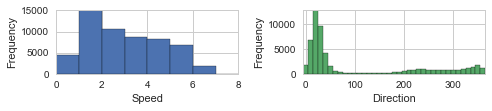

In [7]:
plot_speed_and_angle_distribution(df.speed, df.dir)

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

lat      lon             x             y         speed  \
count  55520.0  55520.0  55520.000000  55520.000000  55520.000000   
mean       8.0    293.0      2.347453      0.746779      3.013051   
std        0.0      0.0      1.987388      1.302335      1.623413   
min        8.0    293.0     -5.531177     -6.194098      0.014598   
25%        8.0    293.0      1.008199     -0.212245      1.622883   
50%        8.0    293.0      2.383520      0.900916      2.731613   
75%        8.0    293.0      3.876776      1.706899      4.339078   
max        8.0    293.0      7.523897      5.136300      7.778235   

                dir          date          HrMn         month  dir_windrose  
count  55520.000000  5.552000e+04  55520.000000  55520.000000  55520.000000  
mean     103.667379  1.997567e+07    900.000000      6.522767     99.539393  
std      122.714927  1.096640e+05    670.826435      3.448779     63.738816  
min        0.000426  1.979010e+07      0.000000      1.000000      0.180783  
25%       19.291249  1.988070e+07    450.000000      4.000000     62.853101  
50%       30.601976  1.997567e+07    900.000000      7.000000     73.443840  
75%      220.193131  2.007070e+07   1350.000000     10.000000    108.416350  
max      359.999129  2.016123e+07   1800.000000     12.000000    359.995599

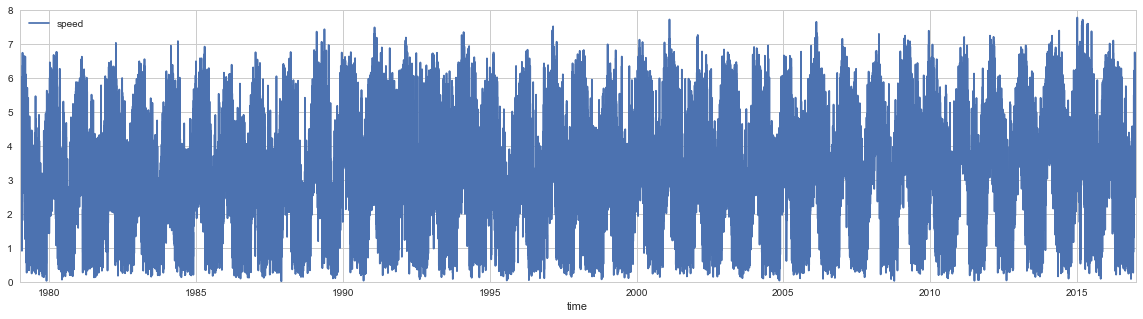

In [8]:
# Dir [10,360]=> [0,350]
df['dir'] = df['dir'].apply(lambda x: x%360 if x < 999 else x) 
df['month'] = df['date']%10000//100
# Convert Windrose coordianates to Polar Cooridinates 
if 'cartesian' in globals():
    df['dir_windrose'] = df['dir'].apply(lambda x: (90 - x)%360 if x < 999 else x)
else:
    df['dir_windrose'] = df['dir']
    df['dir'] = df['dir'].apply(lambda x: (90 - x)%360 if x < 999 else x)
display(df.describe())
df.plot(y='speed',legend=True,figsize=(20,5))

## 1.3 General Data Info

### 1.3.1 Unit Detection

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/

True


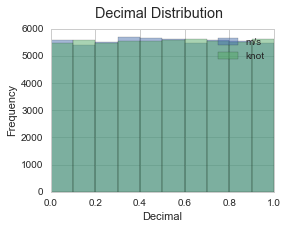

In [9]:
df['decimal'] = df.speed % 1
df.decimal.hist(alpha=0.5, label='m/s', figsize=(4, 3))

if 'convert_to_knot' not in globals():
    convert_to_knot = True if len(df.query('decimal >= 0.2')) / len(df) > 0.3 else False
    
if convert_to_knot:
    knot_unit = True
    df['speed'] = df['speed'] * 1.943845
    df['decimal'] = df.speed % 1
    df.decimal.hist(alpha=0.5, label='knot')
    # need more elaboration, some is not near an integer
    if integer_data:
        df['speed'] = df['speed'].apply(lambda x: int(round(x)))
    plt_configure(xlabel='Decimal', ylabel='Frequency', legend={'loc': 'best'}, title='Decimal Distribution')
else:
    knot_unit = False
    
df.drop(['decimal'], 1,inplace=True)
print(knot_unit)

In [10]:
dir_unit_text = ' (degree)'
if knot_unit == True:
    speed_unit_text = ' (knot)'
else: 
    speed_unit_text = ' (m/s)'

### 1.3.2 Sampling Type Selection

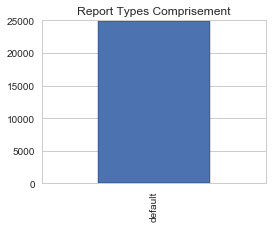

In [11]:
sample_type = df.query('date > 20000000')['type']
sample_type.value_counts().plot(
    kind = 'bar', title = 'Report Types Comprisement', figsize=(4,3))

report_type_most_used = sample_type.value_counts().argmax()
df = df.query("type==@report_type_most_used")

### 1.3.3 Sampling Time Selection

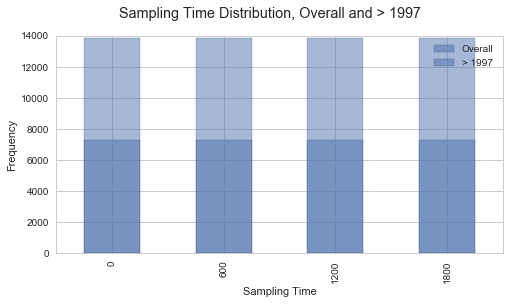

In [12]:
MID_YEAR = (min(df.date)//10000+max(df.date)//10000)//2

df['HrMn'].value_counts().sort_index().plot(kind='bar', alpha=0.5,label='Overall')
df.query('date > @MID_YEAR * 10000')['HrMn'].value_counts().sort_index().plot(
    kind='bar', alpha=0.5, label='> %s' %  MID_YEAR )

plt_configure(xlabel='Sampling Time', ylabel='Frequency', legend={'loc':'best'}, figsize=(8, 4), 
              title = 'Sampling Time Distribution, Overall and > %s ' %  MID_YEAR)

[0]


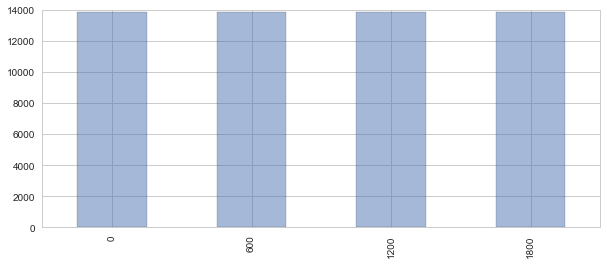

In [13]:
df['sample_time'] = df.HrMn % 100 
sample_time = df.query('date > 20000000')['sample_time']
sample_times = sample_time.value_counts()[sample_time.value_counts() > 2000]
sample_times = sample_times.index.tolist()
# df = df.query("sample_time in @sample_times")
df = df.query("sample_time == @sample_times[0]")
df.drop(['sample_time'], 1,inplace=True)
print(sample_times)

df['HrMn'].value_counts().sort_index().plot(kind='bar', alpha=0.5, figsize=(10, 4))

## 1.4 Error Data handling and Adjustment

### 1.4.1 Artefacts

wrong direction record

In [14]:
if integer_data:
    display(df.query("(dir % 10 >= 0.1) & (dir != 999)"))
    df = df.query('(dir % 10 <= 0.1) | (dir == 999)')

sudden increase in speed

lat  lon         x         y      speed        dir  \
time                                                                      
2015-01-03 18:00:00    8  293  7.074783  3.232395  15.119683  24.555170   
2001-02-13 18:00:00    8  293  7.474081  1.939659  15.009727  14.548349   
2015-03-11 18:00:00    8  293  7.444246  2.024129  14.995842  15.211267   
2015-03-06 18:00:00    8  293  7.257496  2.443865  14.885808  18.610265   
2006-02-14 18:00:00    8  293  7.197013  2.598849  14.874036  19.854707   
2015-05-13 12:00:00    8  293  7.523897  1.054587  14.768257   7.978885   
2015-05-11 12:00:00    8  293  7.462750  1.398655  14.759005  10.615125   
2015-02-28 18:00:00    8  293  7.160526  2.413264  14.688187  18.625016   
1997-02-27 18:00:00    8  293  7.380292  1.433794  14.614363  10.994094   
2015-05-09 12:00:00    8  293  7.284893  1.818640  14.595301  14.017118   

                         date  HrMn     type wind_type  month  dir_windrose  \
time                                                                          
2015-01-03 18:00:00  20150103  1800  default   default      1     65.444830   
2001-02-13 18:00:00  20010213  1800  default   default      2     75.451651   
2015-03-11 18:00:00  20150311  1800  default   default      3     74.788733   
2015-03-06 18:00:00  20150306  1800  default   default      3     71.389735   
2006-02-14 18:00:00  20060214  1800  default   default      2     70.145293   
2015-05-13 12:00:00  20150513  1200  default   default      5     82.021115   
2015-05-11 12:00:00  20150511  1200  default   default      5     79.384875   
2015-02-28 18:00:00  20150228  1800  default   default      2     71.374984   
1997-02-27 18:00:00  19970227  1800  default   default      2     79.005906   
2015-05-09 12:00:00  20150509  1200  default   default      5     75.982882   

                        incre  incre_reverse  
time                                          
2015-01-03 18:00:00  3.492320       5.354918  
2001-02-13 18:00:00  1.887292       5.570717  
2015-03-11 18:00:00  1.306164       4.343181  
2015-03-06 18:00:00  1.932012       3.359976  
2006-02-14 18:00:00  3.220349       5.596302  
2015-05-13 12:00:00  2.868443       0.984035  
2015-05-11 12:00:00  3.613922       1.791540  
2015-02-28 18:00:00  3.031261       4.642801  
1997-02-27 18:00:00  1.683914       3.883265  
2015-05-09 12:00:00  8.397486       2.913513

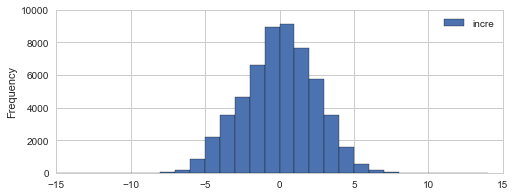

In [15]:
# sudden increse
df['incre'] = df.speed.diff(1)
df['incre'].fillna(0, inplace=True)
df['incre_reverse'] = df.speed.diff(-1)
df['incre_reverse'].fillna(0, inplace=True)

display(df.sort_values(by='speed',ascending=False).head(10))
df['incre'].plot(kind='hist', bins=arange(-15, 15), legend=True, figsize=(8, 3))

In [16]:
incre_threshold = 20 if knot_unit else 10
print('sudden increase number', len(df.query('(incre > @incre_threshold )&(incre_reverse > @incre_threshold )')))
df = df.query('(incre < @incre_threshold )|(incre_reverse < @incre_threshold )')

# Check the max speed
display(df.sort_values(by='speed',ascending=False).head(10))
df.drop(['incre', 'incre_reverse'], 1, inplace=True)

sudden increase number 0


lat  lon         x         y      speed        dir  \
time                                                                      
2015-01-03 18:00:00    8  293  7.074783  3.232395  15.119683  24.555170   
2001-02-13 18:00:00    8  293  7.474081  1.939659  15.009727  14.548349   
2015-03-11 18:00:00    8  293  7.444246  2.024129  14.995842  15.211267   
2015-03-06 18:00:00    8  293  7.257496  2.443865  14.885808  18.610265   
2006-02-14 18:00:00    8  293  7.197013  2.598849  14.874036  19.854707   
2015-05-13 12:00:00    8  293  7.523897  1.054587  14.768257   7.978885   
2015-05-11 12:00:00    8  293  7.462750  1.398655  14.759005  10.615125   
2015-02-28 18:00:00    8  293  7.160526  2.413264  14.688187  18.625016   
1997-02-27 18:00:00    8  293  7.380292  1.433794  14.614363  10.994094   
2015-05-09 12:00:00    8  293  7.284893  1.818640  14.595301  14.017118   

                         date  HrMn     type wind_type  month  dir_windrose  \
time                                                                          
2015-01-03 18:00:00  20150103  1800  default   default      1     65.444830   
2001-02-13 18:00:00  20010213  1800  default   default      2     75.451651   
2015-03-11 18:00:00  20150311  1800  default   default      3     74.788733   
2015-03-06 18:00:00  20150306  1800  default   default      3     71.389735   
2006-02-14 18:00:00  20060214  1800  default   default      2     70.145293   
2015-05-13 12:00:00  20150513  1200  default   default      5     82.021115   
2015-05-11 12:00:00  20150511  1200  default   default      5     79.384875   
2015-02-28 18:00:00  20150228  1800  default   default      2     71.374984   
1997-02-27 18:00:00  19970227  1800  default   default      2     79.005906   
2015-05-09 12:00:00  20150509  1200  default   default      5     75.982882   

                        incre  incre_reverse  
time                                          
2015-01-03 18:00:00  3.492320       5.354918  
2001-02-13 18:00:00  1.887292       5.570717  
2015-03-11 18:00:00  1.306164       4.343181  
2015-03-06 18:00:00  1.932012       3.359976  
2006-02-14 18:00:00  3.220349       5.596302  
2015-05-13 12:00:00  2.868443       0.984035  
2015-05-11 12:00:00  3.613922       1.791540  
2015-02-28 18:00:00  3.031261       4.642801  
1997-02-27 18:00:00  1.683914       3.883265  
2015-05-09 12:00:00  8.397486       2.913513

### 1.4.2 Direction re-aligment 
For some dataset, the 16 sectors are not record properly,

e.g. the sectors are [0,20,50 ...], need to redistribute the angle into 22.5, e.g. [0, 22.5, 45...]

In [17]:
display(df['dir'].value_counts().sort_index())
effective_column = df.query('dir < 999')['dir'].value_counts()[df['dir'].value_counts() > 30].sort_index()
if integer_data:
    SECTOR_LENGTH = 360/len(effective_column) 
else: 
    SECTOR_LENGTH = 10
print(len(effective_column), SECTOR_LENGTH)

0.000426      1
0.004348      1
0.010816      1
0.012154      1
0.014005      1
0.015081      1
0.016481      1
0.018718      1
0.020858      1
0.021080      1
0.022984      1
0.023208      1
0.025930      1
0.027103      1
0.030242      1
0.030585      1
0.031968      1
0.042793      1
0.049803      1
0.053299      1
0.054787      1
0.056006      1
0.057618      1
0.062004      1
0.071439      1
0.072058      1
0.075020      1
0.078713      1
0.078821      1
0.080968      1
             ..
359.909566    1
359.911111    1
359.911748    1
359.912435    1
359.915387    1
359.927654    1
359.929347    1
359.931445    1
359.933627    1
359.935945    1
359.938759    1
359.940867    1
359.947681    1
359.951174    1
359.952136    1
359.953549    1
359.957948    1
359.960487    1
359.962809    1
359.972397    1
359.974800    1
359.974991    1
359.976301    1
359.986678    1
359.990818    1
359.991429    1
359.995050    1
359.995389    1
359.995792    1
359.999129    1
Name: dir, dtype: int64

0 10


In [18]:
df=realign_direction(df, effective_column)

### 1.4.3 0 Speed

In [19]:
with_too_many_zero, null_wind_frequency = is_with_too_many_zero(df.query("(date >= 20050000)"))
delete_zero = with_too_many_zero
if delete_zero:
    df = df.query('(speed > 0)')
print(delete_zero, null_wind_frequency)

False 0.0158567191421


In [20]:
print(df.query('dir == 999')['speed'].value_counts())
df=fill_direction_999(df, SECTOR_LENGTH)

Series([], Name: speed, dtype: int64)


## 1.5 Time Shift Comparison

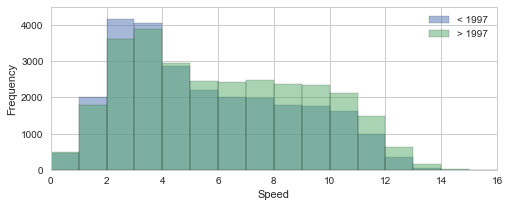

In [21]:
DIR_REDISTRIBUTE = 'even'
if DIR_REDISTRIBUTE == 'even':
    DIR_BIN = arange(-5, 360, 10) 
elif DIR_REDISTRIBUTE == 'round_up':
    DIR_BIN = arange(0, 360+10, 10) 

# Comparison between mid_year, looking for: 
# 1. Odd Even Bias
# 2. Time Shift of Wind Speed Distribution
bins = arange(0, df.speed.max() + 1)
df.query('date < @MID_YEAR * 10000')['speed'].plot(
    kind='hist', alpha=0.5,bins=bins, label='< %s' % MID_YEAR)

df.query('date > @MID_YEAR * 10000')['speed'].plot(
    kind='hist', alpha=0.5,bins=bins, label='> %s' % MID_YEAR)

plt.suptitle('Speed Comparison between year < %s, > %s ' % (MID_YEAR, MID_YEAR), fontsize = 14)
plt_configure(xlabel='Speed', ylabel='Frequency', legend=True, figsize=(8, 3))

In [22]:
df.query('date < @MID_YEAR * 10000')['dir'].plot(
    kind='hist', alpha=0.5,bins=DIR_BIN, label='< %s' % MID_YEAR)

df.query('date > @MID_YEAR * 10000')['dir'].plot(
    kind='hist', alpha=0.5,bins=DIR_BIN, label='> %s' % MID_YEAR)

plt.suptitle('Dir Comparison between year < %s, and > %s ' % (MID_YEAR, MID_YEAR), fontsize = 14)
plt_configure(xlabel='Dir', ylabel='Frequency', legend={'loc':'best'}, figsize=(8, 3), tight='x')

In [23]:
display(df[df['dir'].isnull()])
df.dropna(subset=['dir'], inplace=True)

Empty DataFrame
Columns: [lat, lon, x, y, speed, dir, date, HrMn, type, wind_type, month, dir_windrose]
Index: []

1979 - 1979


D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


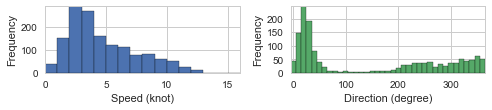

1980 - 1984


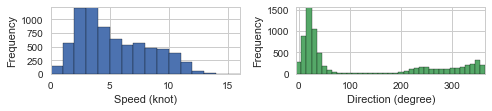

1985 - 1989


1990 - 1994


1995 - 1999


2000 - 2004


2005 - 2009


2010 - 2014


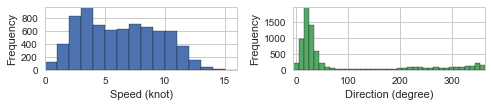

2015 - 2016


In [24]:
# Inspect the time shift of speed and degree distribution, and odd-even bias
check_time_shift(df, speed_unit_text=speed_unit_text, dir_unit_text=dir_unit_text)

(0, 11.0)

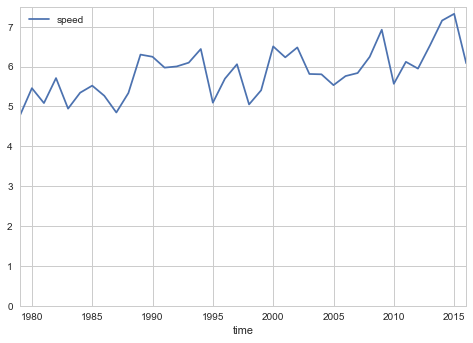

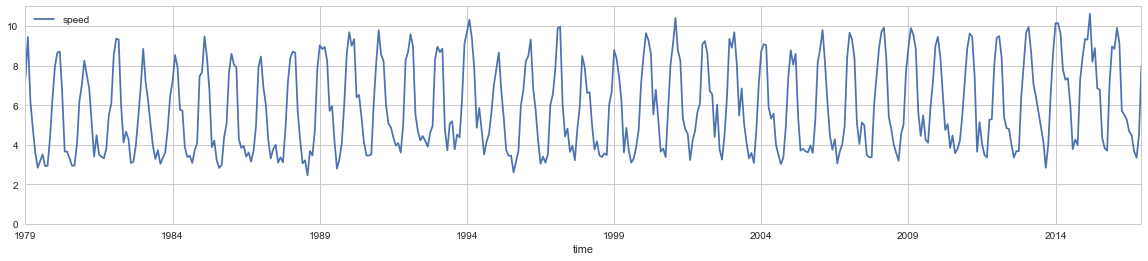

In [25]:
df.resample('A').mean().plot(y='speed')
plt.gca().set_ylim(bottom=0)
df.resample('M').mean().plot(y='speed', figsize=(20,4))
plt.gca().set_ylim(bottom=0)

In [26]:
for column in ['speed', 'dir']:
    if column == 'speed':
        bins = arange(0, df[column].max()+1, 1)
    else:
        bins = arange(0, 361, 10)
    den, _ = np.histogram(df[column], bins=bins, density=True)
    y_top=max(den)*1.2
    for year in arange(1980, 2016):
        end_year = year
        sub_df = df[str(year):str(end_year)]
        if len(sub_df) > 1000:
            plt.figure()
            df[column].hist(bins=bins, alpha=0.3, normed=True)
            sub_df[column].hist(bins=bins, alpha=0.5, figsize=(3,1.5), normed=True)
            plt.gca().set_ylim(top=y_top)
            plt_configure(title=str(year))
    align_figures()

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAANYAAAB6CAYAAADDPa27AAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAECJJREFUeJzt3X9sU+W/wPF32eha9ltYkAtsbCASGDhhMsxVjBjEiEII
QzYJ3MgkaIJoFsYvRWBMthDwm0gWgslMCGgi2eXegEZUogZUQEGmbJMfF4XCgLGfZf0x2q3P/QPX
7wbtOtadtd0+r2QJO8952s8p+7Sn5zzP59EppRRCiB41INABCNEXSWIJoQFJLCE0IIklhAYksYTQ
gCSWEBqQxApSSilef/119u3b597W2NjIqlWryMjI4KmnnuKjjz7C5XK52y0WC+vXr2fatGlMmzaN
NWvW0NDQ4G53Op3k5+eTkZFBRkYG27Zto7W1tVePq7+QxApCra2tbNq0iWPHjnXY/tZbb3Hu3Dl2
7dpFcXEx3377Ldu3b3e3b968mYsXL/LJJ59QUlLCxYsXee+999ztH374IT/++CO7d+/mX//6FwcP
HmT37t29dlz9ihJBxWQyqaysLPXss8+q9PR0tXfvXqWUUuXl5Wrs2LGqoqLCve+ZM2fUhAkTlNVq
VUopNXnyZHXo0CF3+8GDB1VaWppSSqnm5mb12GOPqSNHjrjbDxw4oJ588knV2traG4fWr8gnVpA5
c+YMKSkpHDhwgOjoaPd2k8mEwWBg/Pjx7m3jxo3D6XRSXl4OQHx8PIcOHaKpqQmLxcIXX3xBamoq
AH/++Sd2u52pU6e6+6enp1NXV4fJZOqlo+s/wgMdgOhozpw5zJkz577tCQkJNDc3U19fz0MPPQRA
VVUVAPX19QBs2bKFvLw8nnjiCQBGjhzJZ599BkB1dTVGo7FDsiYkJABw8+ZNRo0apdkx9UfyiRUi
Jk2aRFJSEhs3bsRsNtPQ0EBRURHh4eE4nU4A/vrrL5KTk9mzZw979uwhOjqavLw8lFLY7XYiIiI6
PKZerwfA4XD0+vH0dfKJFSL0ej07d+4kNzeXjIwMjEYjK1asoKKigqioKEwmEwUFBRw+fJikpCQA
du7cyXPPPccvv/yCwWC4L4Hafjcajb1+PH2dJFYIefTRR/nyyy+pq6sjKiqK1tZWtm3bxsiRIykv
L8dgMLiTCmD48OHEx8dz9epVxowZg81mw2KxEBUVBUBNTQ0AQ4cODcjx9GVyKhgizGYzr776KlVV
VQwePJiIiAi+//57EhISGD16NEOHDsVms3Ht2jV3n9raWhobG0lMTGTcuHEYjUZOnz7tbj916hRD
hgwhMTExEIfUp0lihYjY2Fju3LlDYWEhly9f5tixY+Tn57NixQp0Oh1paWmkpqaSl5dHeXk5lZWV
5ObmkpqaSnp6OgaDgczMTPLz8zl9+jTHjx9nx44dLFmyJNCH1ifplAqOiY7t30nFXStXrmT27NnM
mjULgFu3blFSUsKFCxeIiYlh9uzZPP/88+79zWYz+/bt4+zZswBMnDiRxYsXExMTA9z9TrVnzx5O
nDjBwIEDmT59OllZWQwYIO+vvkyZMuWB9g+qxHrQ4ANB4uw5oRAjdC9OeasSQgOSWEJoQBJLCA1I
YgmhAUksITQgiSWEBnwOaXK5XGzatInz58+j1+spKCjoMGwGwG6389prr/HBBx8wevRoAObNm+ce
OjNixAgKCws1CL9jnO1ny3oSHx8v92xEr/CZWEeOHMHhcPD5559TVlZGUVERu3btcrefPXuWjRs3
Ul1d7d52584dlFLs3btXm6g9aGho4NOT/01kTJTHduttC4sy5jN48OBei0n0Xz4T6/Tp0zz99NMA
pKWluSfVtXE4HBQXF7N69Wr3tnPnzmG321m6dCktLS3k5uaSlpbmMxh/Rl80NjZisVlQXo7IarNQ
VlZGXFxct5+jTaiMEgmFOEMhxu7wmVjtR0MDhIWF0dLSQnj43a6e7kgbDAZycnJYsGABly9fZtmy
ZRw+fNjdxxt/7sLX1dVx+c9qouNiPLabDY0kDkt0TxL0pCunin15tEBvC4UYoXvJ7zOxoqKisFqt
7t9dLpfPBElOTiYpKQmdTkdycjJxcXHU1NQwbNiwBw6wp9iarPxPzVcMHjrEY7ucKoqe5POb/OTJ
kzl69CgAZWVljB071ueDlpaWUlRUBNydEm6xWNzTwANGKQYa9RgGGTz+6A0RBMmwSdEH+PzEmjlz
Jj/99BNZWVkopdi6dSuHDh3CZrOxcOFCj30yMzNZt24d2dnZ6HQ6tm7d6vNTzl9KKZwOJ04v08zt
zc3UWRy0hEV6bL9db8Zms2kZouhHfP61DxgwgPz8/A7b2i6pt9f+CqBer2fHjh09EF7X2Ww2qqrN
xDg9fwjfvHUbfaSR8IEDPbaHaZz4on/pU39NYeHhXhNnQLjn7UJoQe6WCqEBSSwhNCCJJYQGJLGE
0IAklhAakMQSQgOSWEJoQBJLCA1IYgmhAUksITQgiSWEBiSxhNBAnxqE6w/1TzGayEjP00rauFyu
XopIhDJJrH/YrTa+OHeEh5u8z3K23rYwIeL+KTNC3MvnqaDL5eL9999n4cKFLF68mCtXrty3j91u
Jysri0uXLnW5T7BRwEBDhNcZxjLLWDwITcqf+eoTjFpbWrlZ14TOYPW6z+16MyNjPNfMEKI9n59Y
XS1/lpKS0uU+wSo87O5ESW8/MstYdJUm5c989fHGnxpzN2/epNHcSKvOc/vt22bCIwYSUV/frXaA
JnMjDEoKmVp4oRBnKMTYHZqUP+tOH/CvrqDJZOJX2xVivdQNtNabCY8I91pX0Fc7QJjyP87eEgo1
+0IhRuhe8mtS/qw7fYToSzQpf+apjxD9iSblzzz1EaI/kSFNQmggJK4fd2Xtq4aGBuTerQgWIZFY
vta+Aqj6+yoOtC3K6XK5qKmpwWQyed1n+PDhhIWFaRqHCH4hkVgAkTFRXpfoARgUFYXdckfTGCzm
Jr6rvcTlk55rvFsazayctYjExERN4xDBL2QSK1gMio4idrDne12KuzXk29/D69D+z7mqTuflLnbb
cwwa5HMfEdwksXpQa0sLpyqrqG7Se2xvbKhFNyCM2Nh4r49hs1mYkBzX6fQVWUs5+Eli9bCICCPG
QYM8tlmtBqxWCw5Hs9f+tbW3+PTWd8QP9px81iYL//WfCxkyRAYDBzNJrB6kXC6abpsxN3oeb3ij
6iqVtj+Id3hPiusmE4bYQYTHeF5Z0mxroba2FqPR2Hkscok0oCSxepDdaqfM+QvXDdc8tl+/ZSLq
oRgiY6O9PoYhcpB7lL1nuk5PNwGam21E6rx/KgrthURi+VqtEaCl1dmLEXlniBrkNXEMkZ5PER9U
Z6ebbncae+S5RPeERGL5Wq0R/r1iY1/n63QT7r5eBpfV69VJkCuPWguJxILOV2uE/rNio6/TTYCG
2lqG2P4Dw0PVHtubm208NTnZZ+Ec0X0hk1ji3zo73QRobrajd+p9ny4KzcjNECE0IIklhAbkVLAP
Ui4XVkuT1wscdpsdlyuhl6PqX3wmlsvlYtOmTZw/fx69Xk9BQQFJSUnu9u+++47i4mLCw8OZP38+
r7zyCgDz5s1zF5QZMWIEhYWFGh2CuJfdaue66xoDbnm+6tfUaCatIYHoaO/f04R//Kor6HQ6KSws
pLS0FKPRSHZ2NjNmzCA6OhqlVIdZxaJ3RUQavV7gaGkJjnt+fZlfdQUvXbpEYmIisbGx6PV6pkyZ
wq+//sq5c+ew2+0sXbqUJUuWUFZWpt0RCBGE/KoraLFYOpxOREZGYrFYMBgM5OTksGDBAi5fvsyy
Zcs4fPhwt+sK+qoZCP7XDexKXcG2fep74Tm0jLPJ3MjZs2epqanx+hi9ReoK/qN9jcB726xWK9HR
0SQnJ5OUlIR

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAANgAAAB6CAYAAADd9J0IAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAEUJJREFUeJzt3XtsFFX/x/F3u9vtbnfbUqDg81OLgo+iVgSsVvNTiHiB
hIvGVlow9Zd4iXc0xAZvKELj/ZJI0CDRhIgmNIgG9FEE4VEEUamAFBQQtaVLay97abfbdtvd8/tj
6dBdWoqU6c6231dCZGY62++sfObszJw9J0EppRBC6CIx1gUIMZBJwITQkQRMCB1JwITQkQRMCB1J
wITQkQTMoJRS3HPPPaxatUpb5/F4ePzxx8nNzeXaa6/lrbfeIhQKadt9Ph9PPfUUV199NVdffTUL
FizA7XZr29vb21m8eDG5ubnk5ubyyiuvEAwG+/W4BhsJmAEFg0EWLVrE1q1bI9Y/8sgj/Pbbb7zz
zjssW7aMjRs38tprr2nbn3/+eQ4dOsT777/Pe++9x6FDh3jmmWe07W+88Qbfffcdy5cv580332Td
unUsX768345rUFLCUCorK1VhYaG6/vrrVU5Ojvrggw+UUkqVl5erCy+8UO3bt0/72V27dqlLL71U
NTc3K6WUmjhxolq/fr22fd26dWr8+PFKKaVaW1vV5ZdfrjZt2qRtX7t2rbrmmmtUMBjsj0MblKQF
M5hdu3YxevRo1q5dS2pqqra+srISq9XKJZdcoq0bO3Ys7e3tlJeXA5CRkcH69etpamrC5/Px2Wef
kZ2dDcCvv/5KS0sLV111lbZ/Tk4ODQ0NVFZW9tPRDT7mWBcgIs2aNYtZs2adsD4zM5PW1lZcLhdD
hw4FwOl0AuByuQBYsmQJxcXFXHnllQCce+65fPTRRwD8/fff2Gy2iNBmZmYCUFNTw3nnnafbMQ1m
0oLFiXHjxjFq1Ciee+45vF4vbrebl156CbPZTHt7OwB//PEH559/PitXrmTlypWkpqZSXFyMUoqW
lhaSk5MjXtNisQAQCAT6/XgGC2nB4oTFYmHp0qXMnz+f3NxcbDYbDz/8MPv27cPhcFBZWUlJSQlf
fvklo0aNAmDp0qXccMMN/Pjjj1it1hOC1Llss9n6/XgGCwlYHLnooov4/PPPaWhowOFwEAwGeeWV
Vzj33HMpLy/HarVq4QI4++yzycjI4MiRI1xwwQX4/X58Ph8OhwOAuro6AEaOHBmT4xkM5CNinPB6
vcydOxen08mwYcNITk5my5YtZGZmMmbMGEaOHInf76eqqkrbp76+Ho/HQ1ZWFmPHjsVms1FWVqZt
37lzJ8OHDycrKysWhzQoSMDiRHp6Om1tbbz44ov89ddfbN26lcWLF/Pwww+TkJDA+PHjyc7Opri4
mPLycvbv38/8+fPJzs4mJycHq9VKfn4+ixcvpqysjO+//57XX3+dO++8M9aHNqAlKGWML1x2PbOK
sHnz5jF9+nSmTp0KQG1tLe+99x4HDx4kLS2N6dOnc/PNN2s/7/V6WbVqFXv37gXgsssuo6ioiLS0
NCB8zbVy5Up27NhBUlISkyZNorCwkMREOc/25oorrjit/QwVsNM9iP4kdZ458VAj9K1OOXUJoSMJ
mBA6koAJoSMJmBA6koAJoSMJmBA6koAJoSMJmBA6koAJoSMJmBA6koAJoaO4+D6YUgq/3x+xLiUl
hYSEhBhVJMSpiYuA+Xw+vvxmD8nJ4W/etrW1MG3y5RHjSwhhRHERMLfbzc66HaQOSQegyeMl150l
AROGFxcBA7A5UrCnhwPV0dEe42qEODVyk0MIHfXagoVCIRYtWsSBAwewWCyUlJREDKyyefNmli1b
htlsJi8vj9mzZ9Pe3s5TTz2F0+kkEAjwwAMPcMMNN+h6IEIYUa8B27RpE4FAgNWrV7N7925eeukl
3nnnHSA8mcCLL77ImjVrsNlszJkzhylTpvDNN98wZMgQXn31VTweD7feeqsETAxKvQasrKyM6667
DoDx48drwzQDHD58mKysLNLTwzcfrrjiCn766SemTZumjSOhlMJkMulRuxCG12vAuo6jB2Aymejo
6MBsNuPz+SLu5Nntdnw+H3a7Xdt33rx5PPbYY6dUTE8D39TU1ODxeggee+zV5PWwd+9ebVy//hYv
A/TEQ53xUGNf9Bowh8NBc3OzthwKhTCbzd1ua25u1gJXXV3NQw89xNy5c5k5c+YpFdPTwCKVlZX8
5K8g/diY7CYVHjEpFuP5DYaBWvpLPNQIfTsJ9HoXceLEiXz77bcA7N69mwsvvFDbNmbMGCoqKvB4
PAQCAXbu3MmECROor6/nrrvuori4mPz8/H9clFKK5uZm7Y/f78cQQ18J8Q/12oLddNNNbNu2jcLC
QpRSvPDCC6xfvx6/309BQQFPPPEEd999N0op8vLyGDlyJCUlJTQ2NvL222/z9ttvA7BixQqsVusp
FeX3+/nu5z+xWlMAqKw4QkhmYhRxqNeAJSYmsnjx4oh1Y8aM0f4+ZcoUpkyZErH9mWeeiZhZ8XRY
rSnYUsIBS062QUefXk6ImJAHzULoSAImhI4kYELoSAImhI4kYELoSAImhI4kYELoSAImhI4kYELo
yJBDBoRCIbweN4FAKwBNjV5UovRGFPHHkAFzu91sq9qiDXJztLYSx9C0GFclxD9nyIBB5CA3VntK
jKsR4vTINZgQOpKACaEjCZgQOpKACaEjCZgQOpKACaEjCZgQOjLsc7CTUYQHxuk6ZBzInGHCeOIy
YMGODnbud/J3k0Vb19rq59qJ52uDngphBHEZMBUKEWgLaH0VAdpa2wiFQjGsSogT9XoNFgqFePbZ
ZykoKKCoqIiKioqI7Zs3byYvL4+CggJKS0sjtu3Zs4eioqIzWzHQ0tzCbteP/FC7TfuzrWoLbrf7
jP8uIfpCl9lVhg8fzooVK1i3bh02m02Xwq1d+iqCTMonjKnXFuxUZ1exWCza7CoAWVlZLF26VKey
hYgPusyuAjB16lSqqqr+UTGdg+xHz6bS2OjFnJxEssvV7TL074wr8TIjSDzUGQ819oVus6ucjs6Z
NqJnU2l2eTEnmxnawzL034wr8TQjiNHrjIcawYCzqwghwnSZXUUIEabL7CqdzjnnnBNu3QsxmEhf
RCF0ZKieHJ03TGRGSzFQGCpgO/f/DciMlmLgMFTAZEZLMdAYKmBeT/jBsQw0KgYKQwXsh9ptgAw0
KgYOQwVMBhoVA43cphdCRxIwIXQkARNCRxIwIXRkqJscfdHdSFMyypSItQETsOiRpmSUqcEnFAqd
MC5LRkYGiYmx+6A2YAIWPdKUjDI18EUHqqGhgfX7v8KeFn7c09zk4//+t4Dhw4fHqsSBE7CW5hZ2
t//IUWt4mIImj5fx7sw+fcNaGJvb7ebDHz7GnhYe0sL55xF8oQQybeGZURv9Qfx+fyxLHDgBg8iR
pmSUqZ4Z8aPUqYiu2+VykZJqJ3VIuNdPisNBi68Nc1ISACZz7P95x74C0e+iz/zNjT7uyM1j2LBh
gHEDGF137ZFqrOl2bPbw0IAdQeOdVCVgg5Q9zaGd+aP1FsBY6lq3u85NdV0jHabwjaya2kYsdn3G
4TxdEjBBKBTC1WUIvOiPXtHbO+ndqnV3EyPQFqA9EADCLZYp0ax9JEw0J+lWy+kasAGT52LHdXft
otTxrwP5m5r5pO4Lho0M322rraohbVg6kN7tdui9VYv+nZ13dLsGsre7vC6Xi5XbVmNPPXYTo8JJ
a4KZER0mwJgtVrQBGzB5LnZcb9cugUAHSdYkrClWAMzJyQQCx1uK9kAHKWn2iI+U0a1adIBcLhf/
ObgZx7GbTrVVNZiSzFpIm9xeRvqGRIxCFgwGSUhI0F7D6XTiau4gZA0vN7V0YLEnGbrFijZgAybP
xY5TSmGxJms

In [27]:
for column in ['speed', 'dir']:
    if column == 'speed':
        bins = arange(0, df[column].max()+1, 1)
    else:
        bins = arange(0, 361, 10)
    density_all, _ = np.histogram(df[column], bins=bins, density=True)
    df[column].hist(bins=bins, figsize=(5,3))

    R_squares = []
    years = []
    for year in arange(1980, 2016):
        start_year, end_year = year-1, year+1
        sub_df = df[str(start_year):str(end_year)]
        if len(sub_df) > 1000:
            density, _ = np.histogram(sub_df[column], bins=bins, density=True)
            y_mean = np.mean(density_all)
            SS_tot = np.sum(np.power(density_all - y_mean, 2))
            SS_res = np.sum(np.power(density_all - density, 2))

            R_square = 1 - SS_res / SS_tot
            R_squares.append(R_square)
            years.append(year)

    plt.figure()
    plot(years, R_squares)
    ylim = max(min(plt.gca().get_ylim()[0],0.85),0)
    plt.gca().set_ylim(bottom=ylim, top=1)
    plt_configure(figsize=(5,3))
    align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAUgAAADECAYAAAD9EbgkAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAFFdJREFUeJzt3X9MVff9x/HnBQqO33WZSVNmAzgSnbnpqqs21a4262j/
MO0IU7gG52ybr4bocFavIj9srCLptwzbjfmjXUyvInPVre26ZFmdkVUMIVjbyWxJGWMR/IHoV7lK
L3Dv/f5huJ3C8QL31xFfj7/kcu/nvu8VXpx77znnZfF6vV5ERGSYqEgPICJiVgpIEREDCkgREQMK
SBERAwpIEREDCkgREQMx/q4wMDDAhg0b6OzsJCoqii1bthATE8OGDRuwWCx85zvfoby8nKioKA4e
PEhdXR0xMTGsXLmSBQsW8NVXX7Fu3Tp6enpISEigsrKSyZMnh+OxiYgExO8W5LFjxxgcHKSuro7C
wkKqq6upqKigqKiI2tpavF4vR44cobu7G4fDQV1dHW+//TZVVVX09/dz4MABsrKyqK2t5fnnn6em
piYcj0tEJGB+AzI9PR23243H48HpdBITE0NLSwuPPvooAE888QQNDQ189tlnfO973yM2NpakpCSm
Tp3K559/TnNzM/Pnz/dd98SJE6F9RCIiQeL3JXZ8fDydnZ08++yzXLlyhZ07d9LU1ITFYgEgISGB
3t5enE4nSUlJvtslJCTgdDpvuXzouv40NzeP9/GIiNzRrFmzRn1dvwG5d+9e5s2bx9q1azl37hw/
/elPGRgY8H3/+vXrJCcnk5iYyPXr12+5PCkp6ZbLh64b7AcRSs3NzQHN0traSsHGWuJTpox7jRtX
L2JfYiUnJ2fcawRToM9JMGmWkWmWkY1148tvQCYnJ3PfffcBkJKSwuDgIDNmzKCxsZE5c+ZQX1/P
3LlzsVqtVFdX43K56O/vp62tjaysLB555BGOHTuG1Wqlvr7eNE9UOMWnTCHx/gcjPYaIjJHfgFy2
bBnFxcXYbDYGBgZYs2YNM2fOpLS0lKqqKjIyMsjOziY6OpqCggJsNhter5c1a9YQFxdHfn4+drud
/Px87rvvPl5//fVwPC4RkYD5DciEhAR27Ngx7PJ9+/YNu2zRokUsWrTolsu+8Y1v8MYbbwQwYuS4
3W46OjpueW91rNrb24M4kYiEk9+AvJe1tbVRuf8z4lPOj3uNnrNn+Gba9CBOJSLhooD0I9D3D29c
vRDEaUQknHSooYiIAQWkiIgBBaSIiAEFpIiIAQWkiIgBBaSIiAEFpIiIAQWkiIgBBaSIiAEFpIiI
AQWkiIgBv8diHz58mD/84Q8AuFwuzpw5Q21tLdu2bVNpl4hMaH63IHNycnA4HDgcDr773e9SUlLC
r3/9a5V2iciEN+qz+fzjH//gyy+/pLy8nF/96le3lHYdP36cqKgoX2lXbGzsLaVdL774ou+6ow1I
M/TSdHR0RHqEW5jhORmiWUamWUZmplnGYtQBuWvXLgoLCwHwer0hLe0Cc3TSJCUlwZ/Gfy7IYDPD
cwLm6xjRLMNplpGNNahH9SHNtWvXaG9vZ+7cuTdvFPX1zUJV2iUiEmmjCsimpiYee+wx39dDpV0A
9fX1zJ49G6vVSnNzMy6Xi97e3mGlXUPXNctfEhERf0b1Eru9vZ20tDTf13a7XaVdIjLhjSoghz5k
GZKenn5PlHaJyL1NO4qLiBhQQIqIGFBAiogYUECKiBhQQIqIGFBAiogYUECKiBhQQIqIGFBAiogY
UECKiBhQQIqIGFBAiogYGNXJKnbt2sXf/vY3BgYGyM/P59FHH2XDhg3qpBGRCc3vFmRjYyOffPIJ
Bw4cwOFwcP78eSoqKtRJIyITnt8tyI8//pisrCwKCwtxOp2sX7+egwcPqpMmAszwnAzRLCPTLCMz
0yxj4Tcgr1y5QldXFzt37uTs2bOsXLlSnTQRYobnBMzXMaJZhtMsIxtrUPsNyNTUVDIyMoiNjSUj
I4O4uDjOn/86NNRJIyITld+AnDVrFu+88w4/+9nPuHjxIn19fTz22GM0NjYyZ84c6uvrmTt3Llar
lerqalwuF/39/cM6aaxWqzppxsnr8dDV1UVra2vAa2VmZhIdHR2EqUQmPr8BuWDBApqamsjNzcXr
9VJWVkZaWpo6acKor7cbx1ELh05+FNA6N65exFFhIysrK0iTiUxso9rNZ/369cMuUydNeMWnTCHx
/gcjPYbIPUU7iouIGFBAiogYUECKiBhQQIqIGFBAiogYUECKiBhQQIqIGFBAiogYUECKiBhQQIqI
GFBAiogYUECKiBgY1ckqfvzjH5OYmAhAWloaK1asUCeNiEx4fgPS5XLh9XpxOBy+y1asWEFRURFz
5syhrKyMI0eO8PDDD+NwODh06BAulwubzcbjjz/u66RZtWoVH374ITU1NZSUlIT0QYmIBIPfl9if
f/45fX19LF++nKVLl3Lq1ClaWlpu6aRpaGjgs88+83XSJCUl3dJJM3/+fN91T5w4EdpHJCISJH63
ICdNmsQLL7zAT37yE/7973/z0ksvhaWTxgwlP2Yr7QqG06dPj/r/4E7M8P8zRLOMTLMEzm9Apqen
89BDD2GxWEhPTyc1NZWWlhbf90PVSWOGagazlXYFw8yZMwM+o7jZSpg0y3CaZWRjDWq/L7Hfffdd
tm/fDsCFCxdwOp08/vjjNDY2AlBfX8/s2bOxWq00Nzfjcrno7e0d1kkzdF2zPFEiIv743YLMzc1l
48aN5OfnY7FY2LZtG/fff786aURkwvMbkLGxsSOGmjppRGSi047iIiIGRrWjuEwMXo+H9vb2gNdx
u91BmEbE/BSQ95C+3m7Kdl8iPqVt3GvcuHoR+xKrbz9YkYlMAXmPUb+2yOjpPUgREQPagpSIcLvd
tLWN/6X+f68jEioKSBkTr8dDV1cXra2tAa3T3t5O2e4TxKdMGfcaej9UQk0BKWPS19uN46iFQyc/
CmidnrNn+GbadL0fKqamgJQxC8YHPTeuXgjSNCKhow9pREQMKCBFRAzoJbbctYL1gRFAZmYm0dHR
QZhKJhIFpNy1gvWB0fX/O8+W/3mc9PT0gNbRLkcTz6gCsqenh5ycHH77298SExOjwi4xjWB9YHRz
lyMdgim38huQAwMDlJWVMWnSJAAqKipU2CUTjg7BlJH4DcjKykry8vLYvXs3wLDCruPHjxMVFeUr
7IqNjb2lsOvFF1/0XbempmbUg5mhw2IidtJIaJnh53aIZgncHQPy8OHDTJ48mfnz5/sCMhyFXaBO
Grk7meHnFszXA2OmWcbijgF56NAhLBYLJ06c4MyZM9jtdi5fvuz7fqgKu0REzOCOAbl//37fvwsK
Cti8eTOvvfYajY2NzJkzh/r6eubOnYvVaqW6uhqXy0V/f/+wwi6r1RrWwq5gnQghGCeXFZG715h3
87Hb7aYv7Gpra6NgY21AJ0KAr48XFvFH+2ROTKMOSIfD4fv33VDYpeOFJZyCtU/mjasXcVTYAu4u
l+DQjuIiQaJdhSYeHYstImJAASkiYkABKSJiQAEpImJAASkiYkABKSJiQAEpImJAASkiYkABKSJi
QAEpImJAASkiYsDvsdhut5uSkhLa29uxWCy88sorxMXFqZdGRCY8v1uQR48eBaCuro6ioiJ++ctf
+nppamtr8Xq9HDlyhO7ubhwOB3V1dbz99ttUVVXR39/v66Wpra3l+eefH1PtgohIJPndgvzhD3/I
k08+CUBXVxfJyck0NDSEpZdGRCSSRnW6s5iYGOx2O3/961954403OH78eMh7aQIp+VHZltzNTp8+
Pab+JiNmKsoy0yxjMerzQVZWVvLyyy+zaNEiXC6X7/JQ9dIEUs+gsi25m82cOTPgE+aarSjLTLOM
hd/3IP/4xz+

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAVAAAADECAYAAADJaHk4AAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAFCtJREFUeJzt3X9MVff9x/HXBYTqBbV0MzGzbICa6Yiz1bkt/qrfrKVr
6toZ6+Q2uEVrlDkd3VQQRDTgKnEl27pZa2Oz5KLSG232q1262bnaVusaWjX+mikhbP4WtJaL8uty
vn8Y70rv4SIfuD/gPh9JE7nnwn3fT/XFOfece18Oy7IsAQB6LS7SAwDAQEWAAoAhAhQADBGgAGCI
AAUAQwQoABi6qwA9duyYcnNzu9z25z//WT/4wQ/8X3s8Hs2bN08LFizQgQMHJEktLS1auXKlXC6X
li5dqmvXrkmSjh49qqeeekoLFy7Ub3/72/56LgAQVj0G6Msvv6z169ertbXVf9upU6e0d+9e3bmE
9OrVq3K73aqurtbOnTtVWVmptrY27dmzR+PHj9fu3bv15JNPatu2bZKk0tJSPf/889qzZ4+OHTum
U6dOhejpAUDo9BigaWlpeuGFF/xfX79+XZWVlSoqKvLfdvz4cT3wwANKTExUSkqK0tLSdObMGdXU
1GjmzJmSpFmzZunw4cPyer1qa2tTWlqaHA6HZsyYoUOHDoXgqQFAaCX0dIfs7GydO3dOkuTz+VRc
XKx169YpKSnJfx+v16uUlBT/106nU16vt8vtTqdTTU1N8nq9Sk5O7nLf//73vz0OWlNTc/fPCgB6
YcqUKUbf12OAftbJkydVX1+vjRs3qrW1VR9//LE2b96sb33rW2pubvbfr7m5WSkpKUpOTvbf3tzc
rOHDh3e57bO33w3TJ9nfampqmMUGs9hjluidQ+rbzlmvzsJPmjRJr7/+utxutyorKzV27FgVFxdr
0qRJqqmpUWtrq5qamlRbW6vx48frwQcf1Ntvvy1JOnjwoKZMmaLk5GQNGTJE//nPf2RZlt59911N
nTrV+AkAQKT0ag+0O1/84heVm5srl8sly7L07LPPKikpSTk5OSooKFBOTo6GDBmi559/XpK0adMm
rV69Wj6fTzNmzNDXv/71/hgDAMLqrgJ0zJgx8ng8QW9bsGCBFixY0OU+Q4cO1W9+85uAnzd58uSA
nwcAAw0X0gOAIQIUAAwRoABgiAAFAEMEKAAYIkABwBABCgCGCFAAMESAAoAhAhQADBGgAGCIAAUA
QwQoABjql4+zi1Y+n0+1tbXdbs/MzFR8fHwYJwIwmAzqAK2trVXuut0aNmJUwLabN67I/ZxL48eP
j8BkAAaDXtcanz59Wi6XS7m5uVqyZIkaGhokRW+t8bARo5R875cC/rMLVQDojV7XGm/evFklJSVy
u916+OGH9fLLL1NrDCAm9brWuLKyUhMmTJB0+zXGpKQkao0BxKRe1RpL0qhRtw99P/zwQ1VVVWnX
rl165513Ql5rLPW+Pa++vj7o9hMnTqipqalXP9N0llBiFnvMYi9aZomWOfrC6CTSG2+8oRdffFE7
duxQamqqbVVxNNQap6SkSH+51O32rKwso5NI0VbJyiyBmMVetMwSLXNIYaw1lqQ//vGPqqqqktvt
1v333y9J1BoDiEm92gP1+XzavHmzRo8erZUrV0qSvvGNb2jVqlXUGgOIOb2uNf7Xv/5lex9qjQHE
Gt7KCQCGCFAAMESAAoAhAhQADBGgAGCIAAUAQwQoABgiQAHAEAEKAIYIUAAwRIACgKEB34kUrDiu
rq4uzNMAiCUDPkCDFcc1njut+8ZMiMBUAGLBgA9Q6X/FcZ9388blCEwDIFbwGigAGCJAAcBQr3vh
6+vrlZOTI5fLpdLSUnV2dkqK3l54AAiVXvfCP/fcc8rPz9fu3btlWZbeeusteuEBxKQeTyLd6YVf
u3atJOnkyZOaNm2apNtd7++9957i4uL8vfCJiYldeuGfeeYZ/323bdvWpRdekr8XfuLEiT0Oa9ee
11N1cTDUGvc/ZrHHLIGiZY6+6HUvvGVZcjgckrp2vYejF96uBrWn6uJgqDXuX8xij1midw4pzLXG
cXH/+5ZgXe+h6IUHgGjS6wCdOHGijhw5Iul21/vUqVPphQcQk3p9IX1BQYFKSkpUWVmpjIwMZWdn
Kz4+nl54ADGn173w6enpqqqqCrgPvfAAYg0X0gOAIQIUAAwRoABgiAAFAEMEKAAYIkABwBABCgCG
CFAAMESAAoAhAhQADBGgAGCIAAUAQwQoABgiQAHAEAEKAIZ6/YHKktTe3q7CwkKdP39ecXFxKisr
U0JCggoLC+VwODRu3DiVlpYqLi5OHo9H1dXVSkhIUF5enubMmaOWlhatWbNGjY2NcjqdqqioUGpq
an8/NwAIKaM90LffflsdHR2qrq7WihUr9Ktf/apf6o4BYCAxCtD09HT5fD51dnbK6/UqISEhoO74
0KFDOn78uL/uOCUlpUvd8cyZM/33PXz4cP89IwAIE6ND+GHDhun8+fP67ne/q+vXr2v79u364IMP
+lR3fDfohbfHLPaYxV60zBItc/SFUYD+/ve/14wZM/Tzn/9cFy9e1A9/+EO1t7f7t5vUHd8NeuED
MYs9ZrEXLbNEyxxSmHvhJWn48OH+PcgRI0aoo6Ojz3XHADDQGO2B/uhHP1JRUZFcLpfa29v17LPP
Kisrq891xwAwkBgFqNPp1K9//euA2/tadwwAAwkX0gOAIQIUAAwRoABgiAAFAEMEKAAYIkABwBAB
CgCGCFAAMESAAoAhAhQADBGgAGCIAAUAQ0YfJjIYWJ2dqqur63Z7Zmam4uPjwzgRgIEmZgP0VtNV
bdjRoGEjagO23bxxRe7nXEYftgwgdsRsgErSsBGjlHzvlyI9BoAByjhAX3rpJf3jH/9Qe3u7cnJy
NG3aNGqNAcQUo5NIR44c0UcffaQ9e/bI7Xbr0qVL1BoDiDlGAfruu+9q/PjxWrFihZYvX66HHnqI
WmMAMcfoEP769eu6cOGCtm/frnPnzikvL0+WZQ24WuNgeqo8jqZKVmaxxyz2omWWaJmjL4wCdOTI
kcrIyFBiYqIyMjKUlJSkS5f+Vy08UGqNgwlWeRxtlazMEohZ7EXLLNEyhxSBWuMpU6bonXfekWVZ
unz5sm7duqVvf/vb1BoDiClGe6Bz5szRBx98oPnz58uyLG3YsEFjxoyh1hhATDG+jGnt2rUBt1Fr
DCCW8F54ADBEgAKAIQIUAAwRoABgiAAFAEMEKAAYIkABwBABCgCGCFAAMESAAoAhAhQADBGgAGCI
AAUAQwOqlfPs2bMBtwXrdgeAUBpQAbpsy/6A2xrPndZ9YyZEYBoAsW5ABahdh/vNG5cjMAkA9PE1
0MbGRs2ePVu1tbWqr69XTk6OXC6XSktL1dnZKUnyeDyaN2+eFixYoAMHDkiSWlpatHLlSrlcLi1d
ulTXrl3r+zMBgDAzDtD29nZt2LBB99xzjyTRCw8g5hgfwldUVGjhwoXasWOHJAX0wr/33nuKi4vz
98InJiZ26YV/5pln/PeNxgCl1tgMs9hjlkDRMkdfGAXoa6+9ptTUVM2cOdMfoOHohQ8nao17j1ns
MUv0ziH1LciNAnTfvn1yOBw6fPiwTp8+rYKCgi6vY4aqFx4AoonRa6C7du1SVVWV3G63JkyYoIqK
Cs2aNYteeAAxpd8uYyooKKAXHkBM6XOAut1u/5/phQcQS3gvPAAYIkABwBABCgCGCFAAMESAAoAh
AhQADBGgAGCIAAUAQwQoABgiQAHA0ICq9AgXq7MzaFmdz+cL4zQAohUBauNW01Vt2NGgYSNqA7bd
vHFFBU9P8n94NIDYRYB2Y9iIUbYldgBwB6+BAoAh9kABhJXP51N9fX2Xup/PyszMVHx8fJinMmMU
oO3t7SoqKtL

## 1.6 Re-distribute Direction and Speed (Optional)
e.g. Dir 50 -> -45 ~ 55, to make KDE result better

In [28]:
if integer_data:
    df = randomize_angle(df, DIR_REDISTRIBUTE, SECTOR_LENGTH)

In [29]:
if integer_data:
    if delete_zero:
        redistribute_method = 'down'
    else:
        redistribute_method = 'up'

    df, speed_redistribution_info = randomize_speed(df, redistribute_method)

## 1.7 Generate (x,y) from (speed,dir)

In [30]:
# Cook orientation
# df['dir']= (df['dir'] + 180)%360

In [31]:
# There might be a small dot in the centre, which is due to too many zero (more than 1 speed) in center
# Scatter plot in matplot has performance issue, the speed is very slow
df['x'] = df['speed'] * cos(df['dir'] * pi / 180.0)
df['y'] = df['speed'] * sin(df['dir'] * pi / 180.0)

# 2. Re-select Data and Overview

## 2.1 Data Overview

In [32]:
## Summery of the data selection
print('Knot unit?', knot_unit)
print('Report type used:', report_type_most_used)
print('Sampling time used:', sample_times)
if 'speed_redistribution_info' in globals():
    print('Speed redistribution info:', speed_redistribution_info )

df_all_years = df # for later across-year comparison
df = df_all_years.query('(date >= 20100000) & (date < 20150000)')
# df = df.query('(HrMn == 0) and (speed >= 0.5) and (date%10000 > 900) and (date%10000 < 1000)' )
df.describe()

Knot unit? True
Report type used: default
Sampling time used: [0]


lat     lon            x            y        speed          dir  \
count  7304.0  7304.0  7304.000000  7304.000000  7304.000000  7304.000000   
mean      8.0   293.0     5.086904     1.795121     6.265979    85.837826   
std       0.0     0.0     3.797667     2.379407     3.149447   113.404919   
min       8.0   293.0    -9.067731    -8.861296     0.060222     0.020858   
25%       8.0   293.0     2.589888     0.339205     3.481821    18.465053   
50%       8.0   293.0     5.322140     2.174497     6.108422    27.905471   
75%       8.0   293.0     8.037613     3.492754     8.836912    71.817418   
max       8.0   293.0    13.864125     9.984171    14.372612   359.940867   

               date         HrMn        month  dir_windrose  
count  7.304000e+03  7304.000000  7304.000000   7304.000000  
mean   2.012067e+07   900.000000     6.523549     92.042788  
std    1.414344e+04   670.866319     3.448769     59.264110  
min    2.010010e+07     0.000000     1.000000      0.564645  
25%    2.011040e+07   450.000000     4.000000     61.823783  
50%    2.012070e+07   900.000000     7.000000     71.317846  
75%    2.013100e+07  1350.000000    10.000000     88.560048  
max    2.014123e+07  1800.000000    12.000000    359.602892

In [33]:
df.plot(y='speed',legend=True,figsize=(20,5))

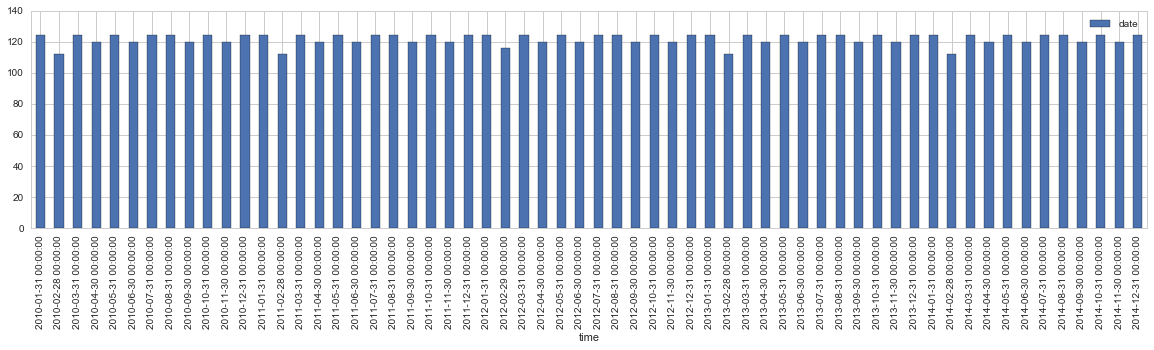

In [34]:
# Accumulation by month
df.resample('M').count().plot(y='date', kind='bar',figsize=(20,4))

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


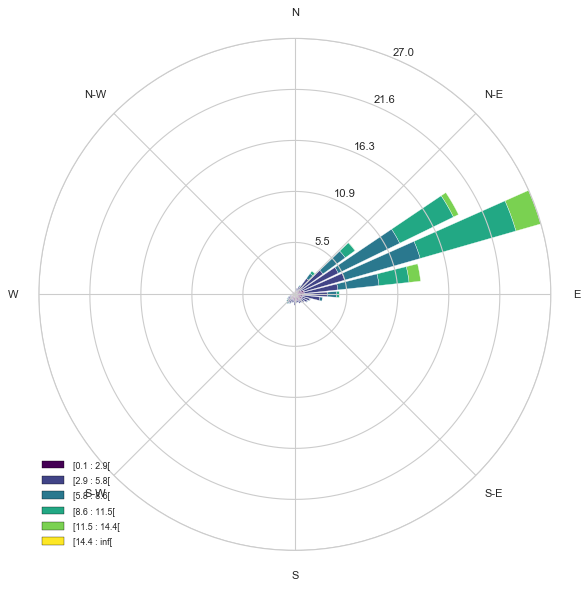

In [35]:
# 90 degree is east
ax = WindroseAxes.from_ax()
viridis = plt.get_cmap('viridis')
ax.bar(df.dir_windrose, df.speed, normed=True, opening=0.8, edgecolor='white', nsector=36, cmap=viridis)
ax.set_legend()

In [36]:
if len(df) > 1000000:
    bins=arange(0,362)
    df['dir'].hist(bins=bins, normed=True,alpha=0.5,label='min')
    
    df = df_all_years.sample(n=500000, replace=True)    
    df['dir'].hist(bins=bins, normed=True,alpha=0.5,label='min resmapled')
    plt_configure(legend=True, figsize=(20,4))

In [37]:
x, y_weibull, y_cdf_weibull, weibull_params, y_ecdf = fit_weibull_and_ecdf(df.speed)

# 1. Histogram comparison
fig = plt.figure()
df['speed'].hist(bins=arange(0, df.speed.max()), alpha=0.5, label='Data', normed=True)             
plot(x, y_weibull, '-', color='black',label='Weibull')   
plt_configure(figsize=(4,3),xlabel='V',ylabel='PDF', legend=True)

# 2. CDF comparison
fig = plt.figure()
plot(log(x), log(-log(1-y_ecdf)),'o', label='ECDF')
plot(log(x), log(-log(1-y_cdf_weibull)),'-', label='Weibull')
plt_configure(xlabel="ln(V)", ylabel="ln(-ln(1-P)",legend={'loc':'best'}, figsize=(4,3))
align_figures()

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: RuntimeWarning: divide by zero encountered in log
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:12: RuntimeWarning: divide by zero encountered in log


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAARYAAADSCAYAAACPQ+9ZAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzt3XdYFOfax/EvoKtSBFQk9m5sIRp7JRGxiwWQYlCjeY2J
ETGKJVFi1GjUJEdN7JoYQUXFirF3gyUUORoxJtZjQUF6UQR33j887pGAC6y7O7vs87kurkt39tn5
MQs3M7Mzz20mSZKEIAiCFpnLHUAQhNJHFBZBELROFBZBELROFBZBELROFBZBELROFBZBELROZ4VF
qVQSFBSEl5cXfn5+3L59u8BzHj9+jLe3N9evX8/3eFJSEs7OzgUeFwTBOOissBw5coSnT5+yZcsW
Jk2axDfffJNv+aVLlxg2bBh37tzJ93hubi5BQUGUL19eV9EEQdAxnRWW6OhounbtCkDLli35448/
8i1/+vQpy5Yto379+vkeX7BgAd7e3lStWlVX0QRB0LEyunrhzMxMrK2tVf+3sLAgLy+PMmWer7J1
69YFxuzYsYNKlSrRtWtXVq9eXaz1REdHayewIAglVtjvMeiwsFhbW5OVlaX6v1KpVBWVV9m+fTtm
ZmacPXuWK1euMHXqVFasWIGDg4Paca/65vQtOjpaZDHQHCCyvIqmWdT9UddZYXnnnXc4fvw4ffv2
JTY2lsaNGxc5ZuPGjap/+/n5MWvWrCKLiiAIhkdnhcXV1ZWIiAi8vb2RJIl58+YRHh5OdnY2Xl5e
ulqtIAgGQGeFxdzcnNmzZ+d7rEGDBgWeFxwcXOj4Vz0uCILhExfICYKgdaKwCIKgdaKwCIKgdTo7
xyL8j1KpJCUlRaOx9vb2mJuL+i8YF1FY9CAlJYVf9kRhZV2xROOyMtMZ4daGypUr6yiZIOiG+FOo
J1bWFbGpaF+ir5IWIqF0GDFiBBcvXgSe3/rSunVr1q5dq1ru5+fHlStXCow7deoUW7Zs4e7duwwd
OrTY6/v4449Vr6utG3/FHosgqBEYGMi2bdu0+pqenp54e3u/cnnnzp2JiorCycmJ6OhounTpwsmT
J/nwww/Jycnh3r17NGnSpMC4bt26AXD37l2t5tWE2GMRBAPTqVMnoqKiADh58iSenp5kZGSQkZHB
hQsXaNeuHZGRkfj4+PD+++8zffp0cnNz2bFjB99++y0AycnJjB07Fk9PT5YtWwbAtGnTOHXqFPB8
72batGk6+x7EHosgqLFo0SIWLVqk9ddVd59Ns2bNuHHjBpIkERkZyWeffUbHjh05c+YMV69epUuX
LsycOZNNmzZRuXJlFi9ezM6dO/Pdi5ednc2iRYuwtLRk2LBhuLi4aP17UEfssQiCgTE3N6dJkyac
OnUKBwcHFAoF3bp1IyYmhujoaDp27EhCQgIBAQH4+fkRERHBvXv38r1GkyZNsLGxwcLCgrfeeoub
N2/mW67rdmKisAiCAercuTOrVq1SzWnUunVr4uLiUCqV2Nvb88Ybb7B8+XKCg4MZO3YsHTp0yDf+
+vXrZGVlkZeXx8WLF2nUqBEKhYLExEQA4uLidJpfHAqVYtevX2fXrl0cO3aMpk2b4uvrS6tWrTAz
M5M7mlCETp06MWPGDBYuXAiAQqHAxsaGpk2bYm5uzhdffMGYMWOQJAkrKysWLlxIfHy8arytrS0T
J04kOTmZvn370rBhQzw9Pfn8888JDw+nbt26Os1vZuwtVo1hXoukpCTCjv2FTUX7Er1eRnoKHt0b
F/s6FkmSuHDhAjt37mTz5s2FfnT45ptv4uvri4+PD40aNSpRHk0Yw/sjh9KQRd04cShk5HJzczl2
7Bj+/v7UqVOH1q1bM3fuXO7cuUP//v1Zu3Ytd+7cYdeuXQwdOpTbt2/z5Zdf0rhxY9q1a8fixYvz
/aUTBG0Qh0JGKiYmhsWLF7N3717V7QJ2dna8//77DBo0iKpVq6qOzwFq1qzJwIEDycjIYNeuXWze
vJlDhw6pPnXo3r07Pj4+uLu7Y2dnJ9e3JZQSBtX+Izc3l8DAQHx9ffHw8ODo0aO6imfUIiIi6Nat
G8HBwVhaWjJu3DgOHz5MQkICwcHBuLu7Y2lpWehYGxsb/Pz82LdvH/Hx8SxbtoxOnTpx9OhRPvzw
Q+rUqcORI0f0/B0JpY1Btf/Ys2cPdnZ2bNq0ibVr1zJnzhxdxTNav//+O3369CEnJ4fQ0FDu3LnD
jz/+SI8ePShbtmyJXsvBwYFPPvmE3377jZs3bzJnzhyePHlC3759CQ0N1dF3IJgCnR0KFbf9x5Qp
U1SP9e7dm169egHPT0RaWFjoKp5RiomJoVevXmRlZREaGoqnp6fWXrtu3brMmDGDrl274ubmho+P
DwkJCfj7+2ttHcbode5MfxV7+5KdxDdGBtX+w8rKSjXW39+fgICAYq3LkFqAFJYlNTWVBw/Sych8
XKLXyspMIzY2Gzs7O65du8ZHH31Eeno6s2fPpn79+kV+35psF2tra1auXMn48eOZMGECFy5cYNy4
ca/1EbWhvz/qpKamcjjyPhWsrIt+cjE8zsrEtW117OzsjHq7FMWg2n8AxMfHM27cOHx9fRkwYECx
1mXoH9slJSVxLVmTj5sr0LJlYxISEhg/fjxpaWmsW7eOUaNGaZylOFq3bk2HDh3o1asX69evx8zM
jNWrVxfr/dNmDm3TJMvz986yxO/dq2Skp9CyZWNu3bqlNsv58+cJCAigYcOGSJJEXl4ew4cPp2/f
voU+//79+/z555907969xJl00f5DZ+dY3nnnHdUNT8Vt//Ho0SNGjRpFYGAgHh4euopmVK5fv46L
iwuJiYmsWLGiWEVFG+rVq0dERARt2rTh559/ZvDgwWRnZ+tl3cJzHTp0IDg4mJCQENatW8fatWsL
nS4B4Ny5c8TExOg54asZVPuPlStXkp6ezvLly1m+fDkAa9asMdk+zo8S7jM4wJ/4+HiWLFnC2LFj
9bp+BwcHjh8/jru7O3v37qVHjx6Eh4eLiadkYGVlhZeXF/v27SMkJIQHDx6QkJBA9+7d8ff3Z/Xq
1Tx58oRWrVphY2PDjz/+iCRJZGVl8d1331GvXj295jWo9h8zZsxgxowZuopkVB4l3OdfX40nKTGe
hQsXynYS1dramvDwcEaNGsXGjRvp2rUrBw8epFatWrLkMWWVK1fm0KFD9O7dG09PT3JycujWrRsT
J05kzJgx3LhxAxcXFzZu3MiiRYtwdHRk5cqVHDhwQDWZk76IC+QMUEpSAvOmfkBSYjzTp08nMDBQ
1jwKhYINGzZQtWpV/vWvf9GpUycOHDhA8+bNZc1lau7fv0+rVq24dOkS586dw9ramqdPnxZ4nqOj
I19//TWWlpY8fPiQd955R+9ZRWExMGkpj5g37QMexv+HvkNGMmnSJLkjAc/3QL/77juqVavGlClT
6Nq1K/v27StwV21plJWZLvtrZWZmsm3bNjw8PHj8+DGzZ8/m9u3bbN26FUmSMDc3R6lUAjBz5kwO
Hz6MtbU1U6dO1fkUCYURhcWAZGWmM2/6KO7fuUE/j1H09xwtd6R8zMzMCAwMxNHRkVGjRjFw4EAu
XLhA9erV5Y6mM/b29oxwa6P117x161aRzzt37hx+fn6Ym5vz7Nkzxo8fT7169Zg0aRKxsbEoFArq
1KlDQkICjRs3ZsWKFTRv3hw3NzeGDRtGhQoVqFKlCgkJCVrNXxyisJRAURdLpaamkpSUVODx5ORk
ivNHI2zDD9y99Tc93YbhM3oymRmprxNXZ4YPH05KSgoBAQH4+Phw9OhRjT6KNgbm5uaynKxu3749
Z8+eLXTZnj17Cjzm6OjIwYMHAejXr59OsxVH6fxp0JGi2ng8eJDOteS/Cjye8OAuNraVqWj76msh
7tz6iyN7N/N

In [38]:
df.plot(kind='scatter', x='x', y='y', alpha=0.05, s=2)
plt.gca().set_aspect('equal')
plt_configure(figsize=(3.2,3.2),xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)

## 2.2 Overview by Direction

In [39]:
if len(effective_column) == 16:
    rebinned_angle = 22.5
else: 
    rebinned_angle = 10

In [40]:
%%time
original_incre, incre = SECTOR_LENGTH, rebinned_angle
start, end = -original_incre/2 + incre/2, 360

max_speed = df.speed.max()
max_count = max_count_for_angles(df, start, end, incre)
plot_range = [0, max_speed, 0, max_count*1.05]

for angle in arange(start, end, incre):
    start_angle, end_angle = angle-incre/2, angle+incre/2
    sub_df, sub_max_speed = select_df_by_angle(df, start_angle, end_angle)   
    
    fig = plt.figure()
    sub_df['speed'].hist(bins=arange(0, max_speed), alpha=0.5, label='Data')
    title ='%s (%s - %s), %s' % (angle, start_angle, end_angle, len(sub_df)) 
    plt.axis(plot_range)
    plt_configure(figsize=(3,1.5), title=title)
align_figures()

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAM0AAAB6CAYAAAAcc9ekAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAEG5JREFUeJzt3XtMFNfbB/Dvskil3KuCphYFEQlVYBVBXxRfNYZaQgVv
tXhpilpL2lQ0NmIrXrFSb40x4gWlKkkr/ii8NdoSlai80WoLoq13VwuWKjdZYJfbwu55/6DO2y3L
MgcWBpbnk/jHzJyZfc7i15k5Mx5kjDEGQohoVlIXQEhvQ6EhhBOFhhBOFBpCOFFoCOFEoSGEk0WF
pqmpCVu2bEFwcDCCg4OxY8cO6HQ6s7UHAI1Gg4iICFRVVbXZZsOGDRg1apTBny1btrTZ/tGjR1i4
cCH8/f0RHh6O3Nzc9jvbjqVLl7aq4ejRo222z8vLQ1RUFPz8/DBnzhz8/vvvwrZz585h3bp1XJ/f
3NyMXbt2YdKkSQgICMCyZcvw5MkTo20fPnyI0aNH4/r16x3a3u2YBUlKSmIzZsxgBQUF7MqVKywk
JITt37/fbO0ZY2zr1q3s4MGDJtssWLCAJScns7KyMuGPWq022ra+vp6FhoayhIQEplQq2f79+9mY
MWNYYWFh+x02YfLkySwrK8ughrq6OqNtS0pKmEKhYHv37mVKpZJt2rSJBQcHs+rqaqHNnDlz2PXr
10V//tdff82mTJnCfv75Z/bkyRO2atUqNm3aNNbU1GTQrrm5mc2ePZt5e3uza9eutTpOe9ulYDGh
aWhoYP7+/uzChQvCuszMTDZx4kSm0+k63Z4xxsrKylhAQACrqqoyWUtQUBC7fPmyqLqzsrLYxIkT
mVarFdYtWrSIJSUlidrfGLVazby9vZlSqRTVft++fSwyMlJY1uv1bPr06SwtLc2gzkWLFomuYffu
3ezcuXPC8r1795i3tzd7+vSpQbsDBw6whQsXthmK9rZLwWIuz+7du4f6+noEBQUJ6wIDA/HixQs8
ffq00+0BID09HQqFAk5OTm3WUV5ejqqqKnh4eIiq+8aNG1AoFOjXr5+wbvz48SgoKBC1vzFKpRLW
1tZwd3cX1b6goADjx48XlmUyGcaNG2dQw9SpU1FQUIAHDx6IOubq1asxY8YMAEB1dTVOnDiB4cOH
Y8iQIUKbR48e4fjx49i8ebPRY7S3XSoWE5rS0lLY2trCwcFBWDdo0CAAQElJSafbA8ClS5cwefJk
k3UolUrIZDKkpKRgypQpePvtt5Gamgq9Xm+0fVlZGVxdXQ3WDRw4EKWlpSY/p70a7O3tER8fj0mT
JmHWrFnIyspqs72YGpycnDBmzBhcvnyZq5YjR44gKCgIZ86cwebNm2FtbQ0A0Ol0iI+Px8qVKzF4
8OBW+7W3XUoWE5r6+nq88sorButsbGwAAFqtttPtdTod7t69Cy8vL5N1PHnyBFZWVnB3d8fhw4cR
ExOD/fv348iRI1x1G6tBrMePH6OhoQETJ07EkSNHEBkZiYSEBJw9e7ZTNXh5eeH27dtctYSFhSEz
MxNRUVGIjY3F48ePAbSEyd7eHu+++67R/drbLiVrqQswl/79+7f6Ib9ctrW17XT7qqoq6HQ6uLi4
COuWLVuG/Px8Yfns2bOIjo5GeHg4nJ2dAQCjRo1CdXU1jh07hg8//FB0Hf379zfaz/DwcDx79kxY
NnYZt2bNGnz00UfCZaSPjw/+/PNPpKWlITw8vMM1ODs7tzkC1pY33ngDALBp0ybk5+cjIyMDc+bM
QWpqKjIyMiCTyVrto1QqTW6XmsWEZvDgwairq4NGo4G9vT2AlvsLAHBzc+t0+5c/vH9eZm3btg0N
DQ3CsqurK2QymRCYl7y8vFBRUQGdTge5XG6wzc3NTfjcl8rLy43WAACHDx9Gc3Oz0W0vyeXyVvdd
I0aMwKVLl4y2F1uDTqeDlVX7Fyd6vR4XL17E6NGjhWPIZDKMGDECKpUK2dnZUKvVeOeddwz2W758
OSIjI+Hq6mpyu6nh++5gMaHx8fGBra0t8vPzMWXKFAAtzx4GDhxo9IaYt72Liwusra2hUqmEdcb+
Ym/btg1KpRLffPONsO727dsYPnx4q8AAgEKhwO7du9Hc3Cxc7+fl5UGhUBjt5+uvv27qawAAfPLJ
J3BycsK2bduEdXfu3IGnp6fR9gqFwiBQjDHcuHEDMTExBu1UKpVw32eKlZUVtmzZggULFiA2NhZA
S+Du3buH+fPnY+7cuYiIiBDa19fXY9asWUhMTERISAjkcrnJ7ZKTevjOnLZu3cqmTZvG8vLy2NWr
V1lISIjBMxWVSsVUKpXo9v82d+5cdujQIZM1XLt2jfn4+LBDhw6xoqIilpWVxQICAtgPP/zAGGt5
7lBWVsbq6+sZY4xpNBoWEhLC4uPjmVKpZMnJyczPz6/V0CyPrKws5uvryzIyMlhRURE7duwYe/PN
N9mvv/7KGGOssbGRlZWVscbGRsYYY8+fP2f+/v5s9+7dTKlUss2bN7MJEyawmpoag+NGRUWx1NRU
xljL86WysjLW3NxstIaUlBQ2duxYdv78eaZUKll8fDwLCQlpdcyX34GpIeX2tnc3GWPS/Se0f94P
mINWq8Xx48dx7do19OvXD6GhoViwYIFwSbF161YAQEJCgqj2/5aZmYlHjx5h7dq1Juv45ZdfkJmZ
iefPn8PFxQURERGYPn06gJbLnpUrV2LFihXCGa6wsBCpqakoKiqCm5sbFi1aBD8/v059FxcuXMBP
P/2EiooKuLm5Yd68ecKw8t27d5GYmIj169fD19cXQMvZ8MSJEygtLYW7uzs++OADgzNTXV0dVqxY
gR07dmDIkCG4fPkyDh06hL179xo9++j1epw5cwY5OTmoqqqCt7c33n//fQwdOrRV24aGBsTExBjU
w7O9q4wbN874BikTm5eXJ+XHcyspKWH+/v6svLyca7/e1k9jTp48yZYsWWKwbvny5a2+C0voK2Om
+2ExQ87dwc3NDVFRUUhPT5e6lG7FGMN3330n3J8ALQ9lraysMHDgQAkrkwaFhtPq1avx448/mnxh
09JkZ2fD29sbEyZMENb5+fnhwIEDElYlHYsZPesuDg4ObT4ktFQzZ87EzJkzDda9HOnri+hMQwgn
Cg0hnCg0hHCi0BDCiUJDCCcKDSGcKDSEcKLQEMKJQkMIJwoNIZwoNIRwotAQwolCQwgnCg0hnCg0
hHCi0BDCiUJDCCcKDSGcTP6f1aamJnz++ef466+/oNVqERsbCy8vL8THx0Mmk2HkyJHYuHEjrKys
cOrUKZw8eRLW1taIjY3F1KlTu6sPhHQrk6E5ffo0nJ2dsXPnTlRVVSEyMhI+Pj6Ii4tDcHAwNmzY
gJycHAQEBCAtLQ3ff/89GhsbER0djZCQEGFCcUIsicnQvPXWWwgLCwPQMo2PXC7HnTt3hN/pEhoa
iitXrsDKygoKhQI2NjawsbGBu7s77t+/3+kJ7wjpiUyGxs7ODkDL75n89NNPERcXh6+++kqYDNzO
zg5qtRoajcbg97zY2dlBo9GIKsDcs2z2VH2ln4Dl97XdeXieP3+Ojz/+GNHR0YiIiMDOnTuFbbW1
tXB0dIS9vT1qa2sN1v8zRKa0OfWnBcnPz+8T/QQsp6+mgm9y9KyiogIxMTH47LPPMHfuXACAr6+v
8Ft2c3NzERgYCD8/P+Tn56OxsRFqtRqPHz+Gt7e3GbtASM9h8kxz8OBB1NTUIDk5GcnJyQCAL774
AomJidizZw88PT0RFhYGuVyOxYsXIzo6GowxrFq1qtVv1iLEUkj+WwMs4VTenr7ST8By+mqqH/Rw
kxBOFBpCOFFoCOFEoSGEE4WGEE4UGkI4UWgI4UShIYQThYYQThQaQjhRaAjhRKEhhBOFhhBOFBpC
OFFoCOFEoSG

Wall time: 6.3 s


## 2.3 Overview by Month

In [41]:
%%time
month_incre = 1
current_df = df.query('speed>=1')
for month in arange(1, 12+month_incre, month_incre): 
    end_month = month+month_incre
    sub_df = current_df.query('(month >= @month) and (month < @end_month)')
    title = 'Month: %s' % (month)
    ax = WindroseAxes.from_ax()
    ax.bar(sub_df.dir_windrose, sub_df.speed, normed=True, opening=0.8, edgecolor='white', nsector=36, cmap=plt.get_cmap('viridis'))
    plt_configure(figsize=(3,3), title=title)
align_figures()

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAOwAAADxCAYAAADIm1tRAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAMTQAADE0B0s6tTgAAIABJREFUeJzsvXmUXGWd//++te9r19L73tVLAgn4DSQEBFQSBcw4CMM4
xhEH/TKKuKMcyGSUUZiv7OCX409EUBEDX1AGRfZ9kRCSkN73rZaufd/v8vujuZfu9Fbd/VQvUK9z
ck66q+5zb1Xf930+z+f5LBTHcRxKlCixKRCt9wWUKFGicEqCLVFiE1ESbIkSm4iSYEuU2ESUBFui
xCaiJNgSJTYRJcF+BCjt3H14KAl2DTj//PPhcDhw8803z/u6y+WCw+GAw+FAKBQieu7nn38eBw8e
FH6+++67sX37dqLnSCQSOO+88/D0008THbfEXEqCXSMoisJzzz0372vPPPNM0c774IMPwuv1Fm38
RCKBr3/963C73UU7R4kPKAl2jdi+fTucTid6enrmvPb000/D4XCsw1WtjsOHD+PSSy9FX1/fel/K
R4aSYNeItrY2VFdXz5lN3W43Ojs7sXfv3jnHPPfcc7jkkkuwbds2fPzjH8cdd9wBmqaF188//3z8
6le/wsGDB7Fjxw6cdtpp+OEPf4hEIgEA2L9/Pw4fPoyXX34ZDocDTqdTOPapp57Cnj17sHXrVvzj
P/4jjh49KrzmdDrhcDhw9913L/qZvvGNb6ClpQX33Xffir6TEsunJNg15IILLphjFj/zzDM49dRT
YbfbZ/3+0KFDuPrqq3HKKafgnnvuwRe/+EXcf//9+NGPfjTrfb/85S8Ri8Vw22234dvf/jb++te/
4t577wUAHDx4EO3t7TjttNNw6NAhWK1WAEA6ncbtt9+Oa665BnfeeSfS6TS++c1vCg8Dq9WKQ4cO
4dJLL1308zz00EO48847YTKZVvW9lCgcyXpfwEeJvXv34te//jWGh4fR2NgIYNoc/vSnPz3rfQzD
4I477sCFF14oOIx2794NrVaLgwcP4sorr0RraysAwG6347bbbgNFUdi9ezdeeeUV3HfffdixYwc+
/vGPQ6PRQKVS4bvf/S5++9vfApj2Gv/85z/Htm3bAAA0TeOb3/wmhoaG0NraCplMJry2GC0tLcS+
mxKFUZph15CtW7eivLwczz77LADA4/HgxIkT2LNnz6z3jYyMIBQKzTGTL7zwQgDAkSNHZo1JUZTw
s8ViATA9u8bj8XmvQywW45RTThF+rqysBIAF319i41AS7BpCUdQss/iZZ57BKaecgvLy8lnvi0aj
AACz2Tzr91qtFjKZTFijAoBSqZxzDrFYjN27d+Omm26a9zrkcjlEog/+9Pz/WZZd4ScrsVaUBLvG
XHDBBeju7obT6cQzzzwzxxwGAIPBAAAIBoOzfh+LxZDL5YTXF+NHP/oR3nrrLUQiETIXXmJDUBLs
GnPaaafBYrHgj3/8I95777055jAA1NfXw2g0zglEeOqpp4QxlkKj0eDGG2/E2NjYLM9yic1Nyem0
xohEInzqU5/CAw88IKxpT0YsFuPqq6/GjTfeCL1ej0984hPo7+/H3Xffjb179xbs7Nm9ezcsFguO
HTsGpVKJbDZb0HG5XA49PT2w2+1zvNcl1pfSDLsOXHDBBcjn8/PuvfJ88YtfxE9/+lO8/fbbuOqq
q/DQQw/hiiuuwC233LKsc/3kJz9BOp1GIBDA0NBQQcf4fD780z/9Ex599NFlnatE8aFKNZ0+XDid
TnzpS1/Ciy++KPzu9ddfx7/927/hhRdeQFVV1TpeXYnVUhJsiRKbiJJJXKLEJqIk2BIlNhElwZYo
sYkobet8CGBZFgzDCJUlOI4T/k9R1Kx/YrF4VijjevDd734X3d3dUCgUAICrr74atbW1uOGGGxCL
xdDS0oKbb74ZKpVq1nG5XA7XXXcd+vv7IRKJ8KMf/Qi7du1aj4+wbpQEu4HhOA75fB65XA75fF74
l81mhd/RNL3skEKxWAypVAqpVAqZTAaZTCb8LJVKIZfLIZEU79bo6urCI488Mitia9++fbj++uux
Y8cO3Hnnnbj33nvxve99b9ZxTzzxBGiaxl/+8hf09/fjq1/9Kl599dWiXedGpCTYDQLHccjlckil
Ukgmk0gmk0ilUmBZFiKRSPgnkUggkUigVCqh1+shl8sF0fEiE4lEYBgGx48fx7Zt20BRFDiOA03T
yOVyyGazguj5c/LCZ1kWHMdBKpVCpVIJ2T4qlYqIiMPhMEKhEK699lp4PB7s2bMHl1xyCeLxOHbs
2AEAuPTSS7F///45gmVZFtlsFgzDIJvNCjP0R4mSYNcJmqYRj8fniFMikUAqlUKpVMJsNkOv10Mq
la7qXHxwv1gshlwuh1arXfC9HMchnU4jGo0imUwiEAggn8+DZdlZIlar1dBoNMs2r4PBIHbt2oUf
//jHkMvluOqqqyCRSGCz2YT3WK3WecvafO5zn8Of/vQnnH322UIO8EeNkmDXkGw2i0gkgnA4jGQy
KZimKpUKFosFer0eYrF4Xa+RoihhRp1JLpdDOBxGLBaD3++H2+0GRVHQ6/UwGAwFX3tTUxPuuusu
4ef9+/fjd7/73bzXcTL33HMPtm3bhocffhhjY2P48pe/jI6ODiE98KNASbBFhOM4pFIphMNhRCIR
ZLNZSKVSaDQaVFZWLjrTbTRkMhlsNpswE7Isi1AohGAwiImJCTAMA7VaDZPJJJjq89HZ2Qm/34/z
zz9fGAcA/H6/8B6/3z9vDPMLL7yA22+/HRRFob6+HqeeeipOnDhREmyJlcNxnGBKRiIRsCwLuVwO
g8EAm822avN2oyASiVBWVoaysjIAQDKZhM/nw9TUFCYnJyGXy2E0GmGxWCCTyYTj8vk8fvazn2HH
jh2QyWT44x//iMsuuwy//OUvcfjwYezYsQOPPfYYPv7xj885Z2trK5555hm0tLQgFAqhq6sL3/nO
d9bsM28ESqGJhGAYBuFwGF6vF9lsFnK5HGazGVardVay+FpeD+90WmszO5vNwuv1IhKJIJ/PQ6/X
w2q1QqvVgqIo3H///Xj00UfBMAz27NmD733vexgYGMCBAwcQj8dRVVWFW2+9FVqtFg8//DB8Ph++
9a1vIRAI4MCBAxgfH4dYLMaVV16Jffv2relnW29Kgl0lmUwGPp8PgUAAIpEIBoMBlZWV6z6Trqdg
Z5JIJOByuZBMJgXnktlsLuq20YeZ0re2AjiOQyQSgdfrRTKZhEKhQG1tLUwm07oHJWw0NBoNHA4H
GIaBx+PB1NQUXC4XTCYTrFbrHOdWicUpzbDLgOM4hEIhuFwuMAwDjUaD6urqDbkfuFFm2PkIh8Nw
u93IZDLQaDSoqqqCWq1e78vaFJRm2ALgOA6xWAyTk5PI5/MwGo2orq7ecELYLBiNRhiNRqTTaYyP
j6Ovr09YSmzEh99GoiTYJUgkEpicnEQ6nYbBYEBtbW1JqIRQKpVobW1FOp3G6Ogouru7YTabUVFR
McuzXOIDSoJdgHQ6DafTiXg8Dq1Wi61bt667I+nDilKpRHt7OxKJBMbGxtDV1QWr1Qq73V5yTp1E
6ds4CZqmMTk5iVAoBJVKhba2tjm1f0sUB41Ggy1btiAUCsHpdMLv96O8vBw2m63kzHufkmBnEA6H
MT4+DpFIhObmZuh0uvW+pI8kJpMJJpMJbrcbHo8HoVAIDQ0NpfUtSoIFMD2rjo+PIxqNwmKxoLKy
cl2CHUrMpqKiAlarFUNDQ+jp6UFFRcVHfrb9yAs2HA5jbGwMUqm0ZP4S5r//+78RDodx8803Y2Bg
YMkE9a9+9avw+XwApmOMBwYG8MADD2Dnzp0IBALCUuWjPNt+ZKcRmqYxPDyM0dFRWK1WdHR0lMRK
kLfeegt/+tO

Wall time: 17.1 s


In [42]:
df.describe()

lat     lon            x            y        speed          dir  \
count  7304.0  7304.0  7304.000000  7304.000000  7304.000000  7304.000000   
mean      8.0   293.0     5.086904     1.795121     6.265979    85.837826   
std       0.0     0.0     3.797667     2.379407     3.149447   113.404919   
min       8.0   293.0    -9.067731    -8.861296     0.060222     0.020858   
25%       8.0   293.0     2.589888     0.339205     3.481821    18.465053   
50%       8.0   293.0     5.322140     2.174497     6.108422    27.905471   
75%       8.0   293.0     8.037613     3.492754     8.836912    71.817418   
max       8.0   293.0    13.864125     9.984171    14.372612   359.940867   

               date         HrMn        month  dir_windrose  
count  7.304000e+03  7304.000000  7304.000000   7304.000000  
mean   2.012067e+07   900.000000     6.523549     92.042788  
std    1.414344e+04   670.866319     3.448769     59.264110  
min    2.010010e+07     0.000000     1.000000      0.564645  
25%    2.011040e+07   450.000000     4.000000     61.823783  
50%    2.012070e+07   900.000000     7.000000     71.317846  
75%    2.013100e+07  1350.000000    10.000000     88.560048  
max    2.014123e+07  1800.000000    12.000000    359.602892

# 3. Create input data and configuration

In [43]:
SPEED_SET = array(list(zip(df.x, df.y)))
if 'NUMBER_OF_GAUSSIAN' not in globals():
    NUMBER_OF_GAUSSIAN = 3
FIT_METHOD = 'square_error'
DEFAULT_BANDWDITH = 1.5 if knot_unit else 0.7
fig_list = []

In [44]:
fit_limit = ceil(df['speed'].quantile(.95))
fitting_axis_range = arange(-fit_limit, fit_limit+1, 1)
print(fitting_axis_range)

FITTING_RANGE = []
for i in fitting_axis_range:
    for j in fitting_axis_range:
        FITTING_RANGE.append([i,j])

[-12 -11 -10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3   4   5
   6   7   8   9  10  11  12]


In [45]:
plot_limit = ceil(df['speed'].quantile(.95))
PLOT_AXIS_RANGE = arange(-plot_limit, plot_limit+1, 1)

# 4. Kernel Density Estimation

In [46]:
sample = SPEED_SET
KDE_KERNEL = 'gaussian'
# KDE_KERNEL, bandwidth = 'tophat', 1

In [47]:
%%time
if 'bandwidth' not in globals():
    bandwidth = DEFAULT_BANDWDITH
    from sklearn.grid_search import GridSearchCV
    # from sklearn.model_selection import GridSearchCV  ## too slow

    # The bandwidth value sometimes would be too radical
    if knot_unit:
        bandwidth_range = arange(0.7,2,0.2)
    else:
        bandwidth_range = arange(0.4,1,0.1)

    # Grid search is unable to deal with too many data (a long time is needed)
    if len(sample) > 50000:    
        df_resample=df.sample(n=50000, replace=True)
        bandwidth_search_sample = array(list(zip(df_resample.x, df_resample.y)))
    else:
        bandwidth_search_sample = sample

    grid = GridSearchCV(neighbors.KernelDensity(kernel = KDE_KERNEL),
                    {'bandwidth': bandwidth_range}, n_jobs=-1, cv=4) 

    grid.fit(bandwidth_search_sample)
    bandwidth = grid.best_params_['bandwidth']
    
print(bandwidth)

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


0.7
Wall time: 6.31 s


In [48]:
if 'bandwidth' not in globals():
    bandwidth = DEFAULT_BANDWDITH

kde = neighbors.KernelDensity(bandwidth=bandwidth, kernel = KDE_KERNEL).fit(sample)

points = FITTING_RANGE
# very slow if the dataset is too large, e.g. 100,000
# kde returns log prob, need to convert it
kde_result = exp(kde.score_samples(points))
print('bandwidth:', bandwidth, len(kde_result))
print(kde_result[:5])

bandwidth: 0.7 625
[  3.19947684e-22   1.34447199e-18   8.18525832e-16   9.65230619e-14
   2.87152059e-12]


In [49]:
# Plot jPDF
X = Y = PLOT_AXIS_RANGE
# Can't work if pass as generate_Z_from_X_Y(X,Y, exp(kde.score_samples())), need to use lambda
# see http://stackoverflow.com/questions/21035437/passing-a-function-as-an-argument-in-python
kde_Z = generate_Z_from_X_Y(X,Y, lambda coords: exp(kde.score_samples(coords)))
colorbar_lim = 0, kde_Z.max()

plot_3d_prob_density(X,Y,kde_Z)

fig_kde,ax1 = plt.subplots(figsize=(3.5,2.5))
plot_2d_prob_density(X,Y,kde_Z,xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text, ax=ax1)

with sns.axes_style({'axes.grid' : False}):
    from matplotlib import ticker
    fig_hist,ax2 = plt.subplots(figsize=(3.5,2.5))
    _,_,_,image = ax2.hist2d(df.x, df.y, bins=PLOT_AXIS_RANGE, cmap='viridis',)
    ax2.set_aspect('equal')
    cb = plt.colorbar(image)
    tick_locator = ticker.MaxNLocator(nbins=6)
    cb.locator = tick_locator
    cb.update_ticks()
    plt_configure(ax=ax2, xlabel='x'+speed_unit_text,ylabel='y'+speed_unit_text)
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAATkAAAE5CAYAAADr4VfxAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsvXuUJHWVLvrlu7Ky3pX1fmc1CHbLQwFxULw+esFFnB6F
aeyepo8IZ1zcuXJh3XEUPLQ43ehwnAWzjovmKO06c06jF3vJzKAHxrtGZHRGODBSo1xaGul6P7Iq
Myvf78yIuH+U+9eRkRGREZGZVZlFfGu5bCozXpkRX+792/v7tkUQBAEmTJgwsUth3ekTMGHChIl6
wiQ5EyZM7GqYJGfChIldDZPkTJgwsathkpwJEyZ2NUySM2HCxK6GSXImTJjY1TBJzoQJE7saJsmZ
MGFiV8MkORMmTOxqmCRnwoSJXQ2T5EyYMLGrYZKcCRMmdjVMkjNhwsSuhklyJkyY2NUwSc6ECRO7
GibJmTBhYlfDJDkTJkzsapgkZ8KEiV0Nk+RMmDCxq2GSnAkTJnY1TJIzYcLEroZJciZMmNjVMEnO
hAkTuxomyZkwYWJXw77TJ2Bi5yEIAvL5PIrFImw2GxwOB6xWKywWy06fmgkTVcMiCIKw0ydhYueQ
y+UQi8XQ3t6OQqEAAFhbW0N3dzfa29thtVpN0jPR1DAjuXcwOI5DJpNBMBiEx+NBsViEw+GAIAgQ
BAEcx6FYLCKfz8NiscBms5mkZ6LpYJLcOxCCIKBYLILjOFgsFnAch9nZWXAcB7vdDp7nkU6n4XK5
YLdfuEWI9HK5HKxWK2w2G2w2G+x2u0l6JhoWZrr6DgPP8ygUCqCv3e/3IxwOY3x8HE6nE/l8Huvr
67BYLCgUCrDb7WhtbYXb7UZraytsNlvJ/mg/FouFkZ3dbi97nwkTOwUzknuHgNJPjuMAAMViESsr
K+B5Hg6HA+3t7cjn82hpaYHD4UBnZyc8Hg9yuRzS6TRisRg2NjYY6RHxicmsWCxCEATkcjmT9Ew0
DEySeweA53kUi0XwPA+LxYJEIoHV1VX09PSgo6MDS0tLJe+3WCwQBAEWiwUtLS1oaWlBT08PBEFA
NptFJpNBNBrF+vo6HA4HIzw10rNat7qVCoUCOjo6TNIzsW0wSW6Xg9bRqJiwvr6OeDyOsbExFqlp
XbGwWCyMzMSkl06nEY1G4ff74XQ6S9JbIjdBEJDJZBAIBFgBg/7fjPRM1BMmye1SSNPTfD6P5eVl
OJ1OTE9Ps4JCNcUCMekBWxEjRXqRSAR+vx8ul4sRHm1DkaI00jNJz0Q9YJLcLoQ0PY1EIlhfX0d/
fz96enrKiE0ayREJ6YXVamXrdb29vYz00uk0wuEwstksACAUCjFyFEd6JumZqAdMkttlEKenPM/D
7/cjk8lgamoKLS0tZe+vZ9uHmPQAIJVKIRAIAAA2NzeRy+XQ0tLCIr2WlhaT9EzUHCbJ7RIIgoCN
jQ20trbC5XIhm81ieXkZHo8H09PTjDyUtgXqS3jAFulZrVZ4vV4AWxFnJpNBOp1GKBRipEdrelpJ
z+l0mj16JhRhktwuAPW+RSIR2O12JBIJBINBDA8Po7OzU3VbOXIwmq5WgvRYVqsVHo8HHo8HwAUF
Bqkw8vk8S2sp0qN9SEkvn8+D4zh0d3fD4XCYpGeCwSS5JgcpFwiUDk5PT8PpdGraR6P0g9tsNrS1
taGtrQ3ABdJLp9MIBAIoFAplkR6RGRU83G43stlsiSLDJL13NkySa1JIpVnJZBKZTAbt7e0YGxvT
/FArva8RiE+N9DY2NlAsFhnpEdFLI71CoWCS3jscJsk1IcTFBQDY2NhAJBJBS0sLurq6qn6AG5UA
pKRXLBYZ6SWTSdYyQ5Gey+UySc+ESXLNBGnvW6FQwMrKCiwWC6anp7G2tqZ7n/Vaf9sO2O12tLe3
o729HS6XC5lMBm1tbaw5meM4tp7X2tpaUqAQkx4VMoj4TNLbXTBJrkkg7X2Lx+NYXV2F1+uF1+st
abKtBZqR+KxWKyM9YCvSS6fTTIYmjvKkpMfzPCvgiEnPbrfDbrebpNfEMEmuCcBxHDO0FAQBfr8f
iUQCExMTrAcNMBaV0TapVAqxWIypF5oNctdtt9vR0dGBjo4OAFuRL6W30WgUPM+XRHriCE5MeoVC
AYlEAgMDAybpNSFMkmtgSIsL1PvW0tKCPXv21KQhlshhZWUFHR0diEajSKfTsNvtLN0TKxMaGZWI
x+FwwOFwlJAeRXrhcBiCIJREekR6FBFSemuxWMxIr4lgklyDQpyeAkA4HMbGxgYGBgbQ3d1dk/62
QqGA5eVlAIDP52N/DwQC7LhiZQJFPOLWjWYGWUp1dnZCEISSSC8cDgMA3G43MxIlZxagNNIzSa+x
YZJcAyISicBms8HlcoHneaytrSGbzSpKswh6SE5st5ROp+FwOFhKbLFY4HQ60dPTA6BUmSDtVyOF
RbM/1HTNTqezhPTS6TQSiQRyuRzm5+dlIz3AJL1GhklyDQRKT0OhEDo6OsBxHJaXl9He3l5RmqXn
GBsbG4hGoxgdHUVbWxuCwaAqOcopEyjNW19fR7FYVKxibhdqXSgRk57D4UA4HMbAwADS6TRSqRRC
oRCsViu7brfbrUh6AErmY9hsNpP0thEmyTUIxL1vVD1NpVKapFmESpEcpadWqxV79uwpmd+gZz82
m022iile0FeKeOqJeh1DEASmkXU6nejq6mJjHKlHj3zyxGQvjuBM0ts5mCS3w5D2vnEch1QqBavV
qkuaBaiTE6Wnvb29rOVEy3ZaIFfFJNLb3NyExWJhD30ztqbIwWKxwOVyweVyobu7u4T0EokEIz2x
VbwS6QWDQXR1dcHj8TCHFZP0ageT5HYQSrbkdrsdXV1dughOCZSexmIx5gZcb8gt6NPDn8/n2dqW
+OFvZIgLDkqQI71cLodMJoN4PM7mY4jTWyK9bDbLKrf5fB4AyuZjmKRnHI19d+1iSKVZ6+vrbJ0s
Ho8buqmlERm5AdtsthI3YKXtpP9fC4jXtlpaWrC+vo6hoSGk0+mSh19pOE4jwMhnIZ6PISY9uaFA
4io6fe8U3Utn3pqkpx8myW0zpL1vtE5mt9vZOlkikTD8YNF2coqIRoE04hEPxxHPiSDS01Jw0RJt
VYNa6IGVhgJxHMeuWxzpicnMJD3jMEluGyFNT2OxGNbW1tDX14fe3l52o1YTSZEbcDweL1NEqGE7
1sqUevvEw3HkLNOV3IO3C/UgUPF1x+NxDA4OQhAExaFAJukZh0ly2wSx75sgCFhbW0MqlcLk5GSZ
lMooyfE8z6RZaumpFNIHwmKxsPRpuyG1TBf36ImNNOU85ZoV4uqt1qFAFOGapFcZJsnVGUrSLCIi
ufUnIyQXi8UQDofR2tqK8fFx3Td1vdM9o1ByDxZ7yrndbgiCwKq3tb6Oen82cvvXMhTI5XKVRHpS
0isWi8jn81hbW8PIyAgcDsc7kvRMkqsjxMJ6YEsiFQgEMDg4iO7ubsXt9ERSPM9jfX0diUSCyb30
3sDNdMMrecrRg59KpRRF940KLSQqF+ES6VUaCkTrftTmIo70HA5HCTnuRpgkVwdQ79vZs2exZ88e
AMDa2hry+Tx8Ph9cLpfq9lojuVwux2ap7tmzB5FIpIRU9Z5zLdYEtxvkKZfL5WCxWNDR0VEiugdQ
Rnp6sRORXCWopfXioUBut7uscguURnq7nfRMkqsxpML6VCqF9fV1dHR0YHR0VNOiuRaSoaKFeJaq
UXKi7fL5fMP3rFWCUo+eWIolVmM0+/USpGm9mPQAYG5uTtVkQY70bDYb69drZtLbHd9wg0Da+0bi
+pGREaYG0AolsqL0NJlMlhUtjJIcFUKy2SwsFgu7sfP5fE0akncK4h49qRSLVAlaevQaMZKrBCI9
t9uNaDQKn8/

In [50]:
kde_cdf = cdf_from_pdf(kde_result)
config = {'bandwidth': bandwidth, 
          'fitting_range': FITTING_RANGE,
          'fit_limit': fit_limit,
          'kde_kernel': KDE_KERNEL}

In [51]:
%%time
gof_kde=Parallel(n_jobs=-1)(delayed(resampled_kde)(df, kde_result, config) 
                                       for i in arange(50)) 

Wall time: 8.37 s


In [52]:
for gof_name in [ 'R_square', 'K_S','Chi_square']:
    plt.figure(figsize=(4,3))
    pd.DataFrame(gof_kde)[gof_name].hist()
    plt_configure(title=gof_name)
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAQ8AAADXCAYAAAAENdTIAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAFGNJREFUeJzt3XlUlNXjBvCHRRCGEdQDHQslxY0sDSy1UvpKmUvuaeLY
FNlpMbMiOqA2AZUjmOaSqbimB8El87jVqeNCaMXRgrI0iuNIk2BigChbMAz390c/p1wZLu/AO/J8
/gJ538tzrsPDOzP35boIIQSIiBrJtaUDEJFzYnkQkRSWBxFJYXkQkRSWBxFJYXkQkRT3lg5ANxYR
EYHCwsIr/s3b2xu9e/dGbGwsQkNDWygZEeDCdR7qFRERgSlTpmDixIkAACEEzp07h8WLFyM3NxcH
Dx6Ej49PC6ek1opPW1ROo9HA398f/v7+CAgIQN++fZGcnIyysjIcPXq0peNRK8bycEIeHh4AADc3
twaPPXXqFPR6PUJDQzFo0CC89dZbqKqqsn19w4YNCA8PR1hYGObPn49XXnkFy5cvBwDMnj0br776
6hXjRUREYPPmzQCAuro6LFmyBBEREejTpw8efPBBGI1GWK1W2/lvvvkmJk+ejAEDBuDbb7+FxWLB
okWL8NBDD6F///547rnncPr0aUXmhZoXy8PJlJaWwmg0wt/fH/fdd1+Dx8fExOD222/H7t27sXr1
amRlZWHNmjUAgE8++QTLly9HXFwctm3bhrNnzyIzM9PuLOvWrcPu3buRnJyML7/8ErGxsUhLS8Oh
Q4dsx+zbtw/Tpk3Dpk2bEBoaig8//BCHDx/G0qVLsX37dnTt2hV6vR7l5eWNnwxqUSwPlUtOTkZo
aChCQ0PRr18/hIeHo6SkBB9//LFdr3cUFBTAz88Pt99+O/r164dVq1Zh7NixAIAtW7YgMjISjz/+
OHr06IHk5GR4eXnZna179+5ISkrCgAEDEBgYiPHjxyM4OBh5eXm2Y7p27Yrx48cjJCQELi4u2Lhx
IxITE3H//fcjODgYBoMBPj4+2LNnT+Mnh1oU321RuRdffBFjx45FbW0t0tPTsX//frzyyivo0aOH
XefPmjULCxYswM6dOzF48GAMGzYMI0eOBACYTCZMnz7ddqyPjw969epld7ZHH30Ux44dw8KFC5Gf
n4+8vDycOXMGjz32mO2Yzp072z7+448/UFtbi+nTp8PFxcX27zU1NXzq4oRYHirXvn17BAUFAQAS
EhJQWlqKGTNmYM+ePejUqVOD50dFRWHEiBE4ePAgjhw5gtjYWBw5cgRJSUlo27Yt6uvrrzj+8usp
AK74Ab+srq7O9vFHH32ETZs24YknnsBjjz2GmJgYxMTEXHF827ZtbR9ffi1kw4YN6Nix4xXH8V0j
58OnLU4mISEBbm5uSExMbPDYmpoaGI1GWCwWTJs2DSkpKYiPj8dnn30GAOjZsyeOHz9uO762tha/
/fab7fM2bdqgsrLS9nllZSVKS0ttn69fvx5xcXGYPXs2xo8fj8DAQJw9exY3eve/S5cucHd3R2lp
KYKCghAUFITOnTtj2bJlV+Qg58DycDIdOnRATEwMvvrqKxw4cOCmx3p6eiInJwfvvvsu8vLyYDKZ
sH//fvTt2xcA8MILL2D79u3YsWMHTp8+jXfeeQd//fWX7fx77rkH33//PTIzM3H69GkYDAa4uv77
kLntttuQmZkJs9mMkydP4rXXXsPFixdRW1t73TwajQZTp06F0Wi0nZeYmIiMjAy7n4aRerA8nNCk
SZMQGhqK+fPno7q6+qbHLl26FK6urtDpdJg0aRI8PDywaNEiAMCQIUMQHx+PFStWYOLEifDy8kJI
SIjt3HHjxmH06NGIjo7GtGnTEBISgrCwMNvXk5OTUVBQgDFjxmDmzJkIDAzEpEmTcPLkyRvmiY2N
xfDhwzF37lyMHTsWeXl5WLdu3RWvjZBz4ApTusLEiRMxdOhQzJo1q6WjkMrxBVMnVlpaansR8nq8
vb2h0WiaMRG1JiwPJ6bT6ZCfn3/Drz///PN48803mzERtSZ82kJEUviCKRFJYXkQkRSWBxFJsas8
jh8/Dr1eDwDIzc2FTqeDXq/Hc889h+LiYocGJCJ1arA81q5dC4PBgJqaGgCA0WjE22+/jdTUVAwb
Ngxr1651eEgiUp8Gy6NLly62Pw4DAIsXL7atQrRarfD09HRcOiJSrQbLY/jw4XB3/3c5SEBAAAAg
JycHmzdvRlRUlMPCEZF6SS0S+/zzz7Fq1SqsWbMGHTp0aPD47OxsmW9DRArp37+/4mM2ujx2796N
bdu2ITU1FX5+fnaf54jwjpSdnc3MDuaIvHl5eXgx+QB82t+h2JgVFwqxevaj6Nmzp9PNMeC4X96N
Kg+r1Qqj0YhOnTrZbpy6//77r/kjuUR067OrPAIDA7F9+3YAwLFjxxwaiIicAxeJEZEUlgcRSWF5
EJEUlgcRSWF5EJEUlgcRSWF5EJEUlgcRSWF5EJEUlgcRSWF5EJEUlgcRSWF5EJEUlgcRSWF5EJEU
lgcRSWF5EJEUlgcRSWF5EJGURm83aTabMXXqVOh0OiQkJKC+vt6hAYlInRq93WRSUhJef/11pKen
QwiBgwcPOjwkEalPo7ebPHnyJAYMGAAACA8Px7fffuu4dESkWo3eblIIARcXFwCARqNBeXm549IR
kWo1esc4V9d/+6ayshLt2rWz6zxn3HKSmR1P6bxms1nR8S47ceKE7Rels82xozS6PO666y4cPXoU
AwcOxOHDhzFo0CC7znPGLfqY2bEckVer1QL7zik6JgDcfffd3G7yKo1+qzYuLg7Lly/HlClTYLFY
MHz4cEfkIiKVa/R2k127dsXmzZsdGoqI1I+LxIhICsuDiKSwPIhICsuDiKSwPIhICsuDiKSwPIhI
CsuDiKQ0enk6kZKsVitMJpNi4+Xn5ys2Ft0cy4NalMlkgn5OOrx9AxQZr6QgFx0DQxQZi26O5UEt
zts3AD7t71BkrKqLRYqMQw3jax5EJIXlQURSWB5EJIXlQURSWB5EJIXlQURSWB5EJIXlQURSWB5E
JEVqhanFYsHs2bNRWFgIV1dXvPfeewgODlY6GxGpmNSVR2ZmJurq6rB161bMnDkTS5cuVToXEamc
1JVH165dYbVaUV9fj4qKiiu2o6Rbm5J3wZrNZmg0GkXGouYn9VPv7e2NwsJCjBw5EhcuXEBKSkqD
5zjjFn3MfC2z2YwFaT+1urtgud3ktaTKY+PGjRg8eDBiYmLw559/4plnnsHevXvh6el5w3OccYs+
Zr6WVquFt++5VncXLLebvJZUebRr1w5t2rQBAPj6+qKurg5Wq1XRYESkblLlERUVhblz50Kn08Fi
sSA6Ohre3t5KZyMiFZMqD41Gg2XLlimdhYicCBeJEZEUlgcRSWF5EJEUlgcRSWF5EJEUlgcRSWF5
EJEUlgcRSeHtsEQNEPX1tj1wzWYztFptk8cMDg6Gm5tbk8dpSSwPogZUl/+F+DXF8Pb9/z9FsO9c
k8arungeqUk69OzZU4F0LYflQWQHJffTvVXwNQ8iksLyICIpLA8iksLyICIpLA8iksLyICIpLA8i
ksLyICIp0ovEVq9ejUOHDsFisWDq1KmYPHmykrmISOWkyuPo0aP44YcfsGXLFlRXV2PDhg1K5yIi
lZMqj6+//ho9e/bEzJkzUVFRgdjYWKVzEZHKSZXHhQsXcPbsWaSkpKCgoAAzZszAF198ARcXlxue
44xb9DHztcxms0PHby3+u32ls5IqDz8/P3Tr1g0eHh7o1q0bPD09UVpaio4dO97wHGfcoo+Zr6XV
apt8Vyn9u31lc3DULxSpd1v69++PI0eOQAiBoqIiVFdXw8/PT+lsRKRiUlceQ4cOxXfffYdJkyZB
CIH4+Hin/8M

In [53]:
# %%time
year_length = 5
gofs_bivariate = []
df_start_year, df_end_year = df_all_years.index.year[0], df_all_years.index.year[-1]
for start_year in arange(df_start_year, df_end_year-year_length):
    end_year = start_year+year_length-1
    df_previous = df_all_years[str(start_year):str(end_year)]
    speed_previous = array(list(zip(df_previous.x, df_previous.y)))
    kde2 = neighbors.KernelDensity(bandwidth=bandwidth, kernel=KDE_KERNEL).fit(speed_previous)
    kde_result2 = exp(kde2.score_samples(points))
    gofs_bivariate.append(goodness_of_fit_summary(kde_result2, kde_result))
gofs_bivariate=pd.DataFrame(gofs_bivariate)
gofs_bivariate.index = arange(df_start_year, df_end_year-year_length)

In [54]:
gofs_bivariate

Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
1979    5.657709  0.171007  2.608078e-06    0.071925     1.017349  0.839484
1980    8.003337  0.146877  2.058014e-06    0.063892     0.903720  0.873338
1981    2.787697  0.142917  1.947882e-06    0.062159     0.879207  0.880116
1982    1.169024  0.129107  1.525896e-06    0.055015     0.778166  0.906088
1983    0.195153  0.156665  2.097035e-06    0.064495     0.912248  0.870936
1984    0.196819  0.149066  1.925393e-06    0.061799     0.874117  0.881500
1985    0.151851  0.129150  1.543363e-06    0.055329     0.782607  0.905013
1986   13.593145  0.107034  1.225366e-06    0.049301     0.697337  0.924584
1987    7.756489  0.091959  1.051772e-06    0.045675     0.646057  0.935268
1988   14.885278  0.059834  7.320671e-07    0.038106     0.538996  0.954944
1989   15.475917  0.051336  4.374233e-07    0.029456     0.416640  0.973078
1990   31.735681  0.053544  5.057513e-07    0.031673     0.448000  0.968873
1991   83.013667  0.073217  6.901035e-07    0.036998     0.523320  0.957527
1992   83.049747  0.080421  7.290614e-07    0.038028     0.537888  0.955129
1993    8.489735  0.080862  7.333897e-07    0.038141     0.539482  0.954863
1994    1.370206  0.099558  1.016004e-06    0.044892     0.634976  0.937469
1995    0.203977  0.122131  1.308066e-06    0.050937     0.720484  0.919494
1996    0.466026  0.083707  7.527488e-07    0.038641     0.546556  0.953672
1997    0.442453  0.074174  7.324475e-07    0.038116     0.539136  0.954921
1998    0.148450  0.065322  6.432048e-07    0.035719     0.505225  0.960413
1999    0.379935  0.050913  5.199125e-07    0.032113     0.454229  0.968002
2000    8.205025  0.038947  4.848817e-07    0.031013     0.438660  0.970158
2001    0.128494  0.061964  6.484377e-07    0.035864     0.507276  0.960091
2002    0.065899  0.075621  7.058992e-07    0.037419     0.529275  0.956555
2003    0.076457  0.091473  9.344392e-07    0.043052     0.608955  0.942489
2004    0.065956  0.083040  7.111151e-07    0.037557     0.531227  0.956234
2005    0.043374  0.059467  3.600673e-07    0.026725     0.378009  0.977839
2006    0.027667  0.042216  1.690399e-07    0.018311     0.259003  0.989596
2007    0.030311  0.022727  6.941501e-08    0.011734     0.165973  0.995728
2008    0.197770  0.019494  6.397742e-08    0.011265     0.159339  0.996062
2009    9.207880  0.012154  3.707733e-08    0.008576     0.121301  0.997718
2010    0.000000  0.000000  0.000000e+00    0.000000     0.000000  1.000000

In [55]:
gofs_bivariate.plot(y='R_square', figsize=(4,3))
gofs_bivariate.plot(y='K_S', figsize=(4,3))
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAARkAAADECAYAAACrx1VSAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzt3XtAVGX++PH3DMP9IiCKKBdBERVERQRN806aypYpKbiW
ouXur9o0f65mF23xl24X+25tutZW3xa3tFpz09JKSylFFFJRBFQEBEUQuQ73Yc7vD2SSBIbLDDMD
z+sfYeacM5/zCB/Oec7zPB+ZJEkSgiAIeiI3dACCIHRvIskIgqBXIskIgqBXIskIgqBXIskIgqBX
IskIgqBXbUoy586dY8mSJfe8/sMPPzB//nwWLlzIZ599BoBarebll19m4cKFLFmyhOzsbACys7OJ
jIwkKiqKjRs3olardXgagiAYK61J5v333+fFF1+kpqamyet1dXVs2bKFDz/8kNjYWPbs2UNhYSGH
Dx+mtraWPXv2sGbNGrZu3QrAli1bWLVqFZ988gmSJHHkyBH9nJEgCEZFa5Lx9PTknXfeuef1jIwM
PD096dWrFxYWFowZM4bTp0+TlJTE/fffD8CoUaO4cOECACkpKYSEhAAwadIkTpw4ocvzEATBSCm0
bTBz5kxyc3PveV2pVGJvb6/53tbWFqVSiVKpxM7OTvO6mZkZKpUKSZKQyWSabcvLy7UGl5SU1KaT
EARBP8aMGdPpY2hNMi2xs7OjoqJC831FRQX29vb3vK5Wq1EoFMjl8ibbOjg4tOlzWjvJpKQknTSC
roh4WifiaZ0+46lTqcm8Ucqla8WkXyvmUnYxNwp//T11623L2OGujB3uir9Pb8wVZjr7I9/hJDNo
0CCys7MpKSnBxsaGxMREli9fjkwm48cff2T27NmcPXuWIUOGADB8+HASEhIIDQ0lLi6OcePG6eQE
BKEnq65VkVugpKa2nqoaFTW19VTXqqiuraemVsXt0mrSrxVz9XopdapfH7bYWCkYNaQPY4b2JXiY
KwP62GnuNHSt3Ulm//79VFZWsnDhQtavX8/y5cuRJIn58+fj6upKWFgYx48fZ9GiRUiSxKuvvgrA
unXreOmll9i2bRs+Pj7MnDlT5ycjCD1JenYRWz4+ze3S6la3M5PLGNjfgSGeTgzxcMLPy4kBfeyQ
y/WTVH6rTUnG3d1d84g6PDxc8/q0adOYNm1ak23lcjl/+ctf7jmGt7c3u3bt6kysgiDccSg+i51f
nketVhMW4omzgxWWFmZYWSiwuvOvpaUZDrYWePfvhaW5mcFi7fDtkiAIXa9OVc/OL8/z7cls7G3M
+fOSUEYN6WvosFolkowgmIjCkiq2fnya9GvF+AzoxYalIbg62xg6LK1EkhEEE3Aho5C//iuREmUN
U8e481TEKIPeArWHSDKCYOS+Pp7J+/vOA/DkwyOYO9Fbb0+C9EEkGUEwYmcvFfCPvck42lmy7rFg
Aga5GDqkdhNJpgMSEhJYtWoVgwcPBhoGF7q7u7N48WIDRyZ0J1U1Kt75/BxyuYyNK8Yx2MPR0CF1
iEknme/OlLD94Hc6PeaEkQOIDvfXut24ceN46623NN+vWbOGpKQkQkNDdRqP0HP965uLFBRVEjHd
12QTDJh4kjEWtbW1FBQUEBgY2Oz73333He+//z4KhYK+ffvy1ltvUVhYyJo1awDw9fXl8uXLxMbG
Mm3aNA4ePIilpSVvvPEGPj4+PPTQQ7z88svcvHmTgoICpk2bxurVq1m/fj0lJSWUlJSwc+dO/vnP
f5KYmIharWbp0qX07WvcjzaFlqVcvc2BnzNx72vHojA/Q4fTKSadZB4Y7cjzBpp7cvLkSZYsWcLt
27eRy+U8+uij+Ps3fwV04MABli9fzqxZs9i3bx9KpZLt27cTHh7Oo48+yv79+7l8+XKLn5WXl8eo
UaOIiIigpqaGSZMmsXr1aqDhimrp0qUcO3aM3NxcPv30U2pqanj00Uc1SUwwLdW1Kt7ecwaZDJ5d
OBoLE3mK1BKTTjKG1Hi7VFxcTHR0NO7u7i1u+/zzz7Nz50527dqFj48PM2bMIDc3l0WLFgEQGhqq
GVF9t8aSWI6Ojpw/f56TJ09iZ2dHbW2tZhtvb28ALl26REpKimZxMZVKxa1bt3R2vkLX+eTbdG4U
VvDQpEEMHehs6HA6TSy/2UlOTk68/vrrvPjiixQXFze7zZ49e3jmmWc00yq+//57/Pz8NLNcG9fc
AbCwsKCgoABJkkhLSwNg79692Nvb8+abbxIdHU11dbUmATU+yvTx8SE0NJTY2Fg+/vhjHnzwQVxd
XfV23oJ+pGcX8d9jV3DrbcvvHxxq6HB0QlzJ6MDgwYNZsmQJH3/8MTNmzLjn/cDAQFauXImtrS02
NjZMmTKFadOmsX79er799lt69eql2XbFihU8+eSTDBgwQLMcxvjx41mzZg1nz57FwsICLy8vCgoK
mnzGtGnTOHXqFFFRUVRWVjJjxgysra31e+KCTqnqJf625yxqCZ5ZOAori27y6ykZscTExE6939U6
Gs+VK1ek3//+9zqOpvu0j74YWzyvfXBEmvvcPmn7F2cNHYokSbprn26SKg2vtraWmJiYJqsFQkOf
SXOz0gXhbhm5Jfx0sZw+TtY8Pme4ocPRKZFkdMTCwoKXXnqpQyubDRo0iNjYWD1EJZgCVb2av+05
gyTB0xGjsLEyN3RIOqU1yajVajZt2kR6ejoWFhZs3rwZLy8vzfv79u3jgw8+wN7ennnz5hEREcHe
vXv58ssvAaipqSE1NZXjx4+Tm5vLypUrGThwIACRkZHMnj1bP2cmCCYi4cJNMm+UMcrHhiC/7je2
SWuSubvEydmzZ9m6dSs7duwAoKioiLfffpu9e/fi4ODA0qVLGT9+PI888giPPPIIAK+88grz58/H
wcGBlJQUli1bRnR0tH7PShBMyI9JOQCMH2qvZUvTpPURdkslTgByc3Px8/PD0dERuVzOiBEjOHfu
nOb98+fPc+XKFRYuXAg0PKo9evQoixcvZsOGDSiVSl2fjyCYlPLKWpLS8hno5oCrY/e6TWqk9Uqm
pRInCoUCLy8vrly5QmFhIba2tsTHx2tuhQB27tzJU089pfk+MDCQiIgIAgIC2LFjB++++y7r1q1r
9fO1rZhubGVTujIe6a4yMy3pye3TFoaOJ/GyElW9hK+rzCji0QetSaalEicAvXr14vnnn+eZZ57B
0dERf39/nJycACgrKyMzM7NJVYKwsDDN2I+wsDBiYmK0BihKojQv/nwer8UmMjloAItnDqOP071j
Ynpy+7SFMcTz+cmfkckgKjyU7IyLBo/nbrpKeFpvl4KCgoiLiwNoUuIEGoauX7x4kU8++YS//e1v
XL16laCgIABOnz7N+PHjmxxr+fLlJCcnAxAfH9/iXB+hdZIksedwOqp6NUdO5/CHrYf53wMpKKvq
DB2a0A4FRZWkXL3NiEEuuDh234GTWq9kmitxcndZFIB58+ZhaWnJsmXLcHZumGuRmZl5z3yeTZs2
ERMTg7m5OS4uLm26khHulZZVTEZuKaH+/Rg/wo1dB1P5z49X+C4hm0dn+DFnwkDMFaY9qU6fyipq
uXStmNo6tfaN9ejYmYbKrJODWp731h1oTTLNlTgZNGiQ5uunn36ap59++p79VqxYcc9r/v7+7N69
uyNxCnc58PNVAH43yYfAwX2YOGoA+3+6yhdHLvHBVxfY//NVlswaiu2d+U09XX29mss5JSSlFXAm
vYBLOcVIEgzqZ0loiIRZF9UfupskSfyYlIu5Qs59gf27/PO7khiMZ2Jul1ZxPPkGXv3sGXFnKUZL
czMWTPPlgVAvPj9yiQM/Z/LmJ78wfqgdY4MNHLCB1KnqOZqUS1JaAWcv36Lizq2kXC5juHdvVCo1
6deK+ez7dCJ

## univariate gof standard

In [56]:
def yearly_gof(df_all_years, start_year, end_year, density, y_ecdf, x):
    df_previous = df_all_years[str(start_year):str(end_year)]
    density_expected, _ = np.histogram(df_previous['speed'], bins=x, normed=True)
    r_square = sector_r_square(density, density_expected)
    
    y_ecdf_previous = sm.distributions.ECDF(df_previous['speed'])(x)
    k_s = max(np.abs(y_ecdf - y_ecdf_previous))
    return {'year': start_year, 'r_square': r_square, 'k_s': k_s}

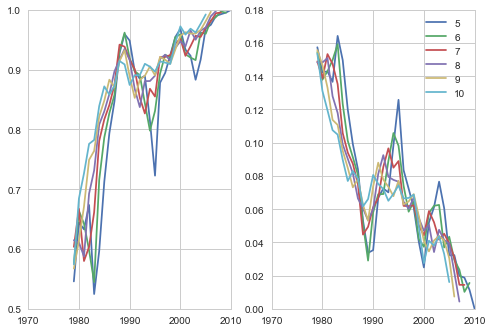

In [57]:
x = arange(0, df.speed.max() + 1)
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

for year_length in arange(5, 11):
    df_standard = df_all_years[str(2010):str(2014)]
    density, _ = np.histogram(df_standard['speed'], bins=x, normed=True)
    y_ecdf = sm.distributions.ECDF(df_standard.speed)(x)

    gofs = [yearly_gof(df_all_years, start_year, start_year+year_length-1, density, y_ecdf, x) 
            for start_year in arange(df_start_year, df_end_year-year_length)]

    gofs = pd.DataFrame(gofs)
    if len(gofs)>0:
        ax1.plot(gofs.year, gofs.r_square, label=year_length)
        ax2.plot(gofs.year, gofs.k_s, label=year_length)
plt.legend()

# 5. GMM by Expectation-maximization

In [58]:
sample= SPEED_SET
clf = mixture.GaussianMixture(n_components=NUMBER_OF_GAUSSIAN, covariance_type='full')
clf.fit(sample)
print(clf.converged_)

True


In [59]:
gmm_em_result = read_gmm_em_result(clf)
pretty_print_gmm(gmm_em_result)

weight  mean_x  mean_y  sig_x  sig_y   corr
1  0.429   8.428   3.503  1.870  1.316  0.042
2  0.372   3.995   1.491  1.768  1.606  0.232
3  0.199  -0.066  -1.315  2.500  1.939  0.269

In [60]:
fig,ax = plt.subplots(figsize=(3.5,3.5))
plot_gmm_ellipses(gmm_em_result, ax=ax, xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)

GMM Plot Result
0.428652928364 [[ 8.42793457  3.50326641]] [ 1.31359266  1.87152573] -86.6847786418
0.372327806785 [[ 3.99472871  1.49094731]] [ 1.46255536  1.88853642] -56.28039624
0.19901926485 [[-0.06584199 -1.3148735 ]] [ 1.78904757  2.60978942] -66.8230693937


In [61]:
X = Y = PLOT_AXIS_RANGE
pdf_Z = generate_Z_from_X_Y(X,Y, lambda coords: exp(clf.score_samples(coords)))

def residule_between_kde_and_gmm(points):
    kde_vals = exp(kde.score_samples(points))
    gmm_vals = exp(clf.score_samples(points))
    return kde_vals - gmm_vals 

residual_Z = generate_Z_from_X_Y(X,Y, residule_between_kde_and_gmm)

plot_3d_prob_density(X,Y,pdf_Z)
plot_3d_prob_density(X,Y,residual_Z)
align_figures()

fig = plt.figure(figsize=(3.5,2.5))
plot_2d_prob_density(X,Y,kde_Z,xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text, colorbar_lim=colorbar_lim)
fig_em = plt.figure(figsize=(3.5,2.5))
plot_2d_prob_density(X,Y,pdf_Z,xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text, colorbar_lim=colorbar_lim)
fig = plt.figure(figsize=(3.5,2.5))
plot_2d_prob_density(X,Y,residual_Z,
                     xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAATkAAAE5CAYAAADr4VfxAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsvXuQI2d9Nvq0pJY0kkZz09xnNDOa3XXidbg6hgTsJDYb
gw8kAQPGwJ4c25Vw8iWhnAKyjj/fEhMMFT6TBIy/lBOSFC6OofjIhUBVCmyIgyGGhNiOd8Fh5yqN
7vf7rbvPH+O3t9VqSX3VqGf7qXJ5d6Xut0fT/ej3/i7PQ3Ecx8GCBQsWjilsR30BFixYsGAkLJKz
YMHCsYZFchYsWDjWsEjOggULxxoWyVmwYOFYwyI5CxYsHGtYJGfBgoVjDYvkLFiwcKxhkZwFCxaO
NSySs2DBwrGGRXIWLFg41rBIzoIFC8caFslZsGDhWMMiOQsWLBxrWCRnwYKFYw2L5CxYsHCsYZGc
BQsWjjUskrNgwcKxhkVyFixYONawSM6CBQvHGhbJWbBg4VjDIjkLFiwca1gkZ8GChWMNi+QsWLBw
rGGRnAULFo41HEd9ARaOHhzHodlsot1uw263g6Zp2Gw2UBR11JdmwYJmUBzHcUd9ERaODo1GA4VC
AePj42i1WgCAaDSKqakpjI+Pw2azWaRnwdSwIrnLGAzDoFarIZVKwev1ot1ug6ZpcBwHjuPAMAza
7TaazSYoioLdbrdIz4LpYJHcZQiO49But8EwDCiKAsMw2NraAsMwcDgcYFkW1WoVLpcLDselW4SQ
XqPRgM1mg91uh91uh8PhsEjPwsjC2q5eZmBZFq1WC+TXHovFkM1mEQwG4XQ60Ww2EY/HQVEUWq0W
HA4HPB4PxsbG4PF4YLfbO85HzkNRFE92Doej630WLBwVrEjuMgHZfjIMAwBot9uIRCJgWRY0TWN8
fBzNZhNutxs0TWNiYgJerxeNRgPVahWFQgGJRIInPUJ8QjJrt9vgOA6NRsMiPQsjA4vkLgOwLIt2
uw2WZUFRFEqlEg4ODjA9PQ2/34/9/f2O91MUBY7jQFEU3G433G43pqenwXEc6vU6arUa8vk84vE4
aJrmCa8f6dlsh91KrVYLfr/fIj0LQ4NFcsccJI9GignxeBzFYhGrq6t8pCY3Y0FRFE9mQtKrVqvI
5/OIxWJwOp0d21tCbhzHoVarIZlM8gUM8n8r0rNgJCySO6YQb0+bzSbC4TCcTic2Nzf5goKWYoGQ
9IDDiJFEerlcDrFYDC6Xiyc8cgyJFMWRnkV6FoyARXLHEOLtaS6XQzwex9zcHKanp7uITRzJERJS
CpvNxufrZmZmeNKrVqvIZrOo1+sAgHQ6zZOjMNKzSM+CEbBI7phBuD1lWRaxWAy1Wg0bGxtwu91d
7zey7UNIegBQqVSQTCYBAJlMBo1GA263m4/03G63RXoWdIdFcscEHMchkUjA4/HA5XKhXq8jHA7D
6/Vic3OTJ49exwLGEh5wSHo2mw2BQADAYcRZq9VQrVaRTqd50iM5Pbmk53Q6rR49Cz1hkdwxAOl9
y+VycDgcKJVKSKVSWFpawsTERN9jpchB7XZ1EMRr2Ww2eL1eeL1eAJcmMMgURrPZ5Le1JNIj5xCT
XrPZBMMwmJqaAk3TFulZ4GGRnMlBJhcIyHZwc3MTTqdT1jlGpR/cbrfD5/PB5/MBuER61WoVyWQS
rVarK9IjZEYKHmNjY6jX6x0TGRbpXd6wSM6kEI9mlctl1Go1jI+PY3V1VfZD3et9o0B8/UgvkUig
3W7zpEeIXhzptVoti/Quc1gkZ0IIiwsAkEgkkMvl4Ha7MTk5qfkBHlUCEJNeu93mSa9cLvMtMyTS
c7lcFulZsEjOTBD3vrVaLUQiEVAUhc3NTUSjUcXnNCr/Ngw4HA6Mj49jfHwcLpcLtVoNPp+Pb05m
GIbP53k8no4ChZD0SCGDEJ9FescLFsmZBOLet2KxiIODAwQCAQQCgY4mWz1gRuKz2Ww86QGHkV61
WuXH0IRRnpj0WJblCzhC0nM4HHA4HBbpmRgWyZkADMPwgpYcxyEWi6FUKmFtbY3vQQPURWXCOVXh
v5kNUj+3w+GA3++H3+8HcBj5ku1tPp8Hy7IdkZ4wghOSXqvVQqlUwvz8vEV6JoRFciMMcXGB9L65
3W6cOHHCaogVYRDx0DQNmqY7SI9EetlsFhzHdUR6hPRIREi2txRFWZGeiWCR3IhCuD0FgGw2i0Qi
gfn5eUxNTenW3ybMUWk5jxlBJKUmJibAcVxHpJfNZgEAY2NjvJCoMOIVRnoW6Y02LJIbQeRyOdjt
drhcLrAsi2g0inq93nM0i+ByIScjQFEUnE4nnE5nB+lVq1WUSiU0Gg3s7OxIRnqARXqjDIvkRghk
e5pOp+H3+8EwDMLhMMbHxweOZmnBcSBHva9fSHo0TSObzWJ+fh7VahWVSgXpdBo2m40nvLGxsZ6k
B6DDH8Nut1ukN0RYJDciEPa+kepppVKRNZpFoBdZmZX0jCIOjuP4GVmn04nJyUnexpH06BGdPGEh
QxjBWaR3dLBI7ogh7n1jGAaVSgU2m03RaBagnpzMSmpHCYqi4HK54HK5MDU11UF6pVKJJz2hVHwv
0kulUpicnITX6+UVVizS0w8WyR0hesmSOxwOTE5OKiI4C8ZB3GIjBSnSazQaqNVqKBaLvD+GcHtL
SK9er/OV22azCQBd/hgW6amHRXJHBPFoVjweRz6fx8rKCorFoqqbWktElk6nUSwW4Xa7eWtCC4dQ
Gx0Tfwwh6UmZAgmr6OT3TqJ7seetRXrKYd3JQ4a4963VaiEcDsPhcODEiRO8VNKwtp3kASuVSpib
m+uYBa3Vah3bLT0KH0Zti+VEW1qgxzxwL1MghmF4fwxhpCckM4v01MMiuSFCvD0tFAqIRqOYnZ3F
zMwMf6NqiciUHFetVhEOh0FRFILBIO/ZQFSFyRwokS53uVw86QkFLeXCrA+iEQQq9McoFotYWFgA
x3E9TYEs0lMPi+SGBKHuG8dxiEajqFQqWF9f541gCIwuIHAch0wmg1QqheXlZUSjUcmxLvJwEb8G
EuUJBS0J6QkVPywog7B6K9cUiETWFukNhkVyBqPXaNbY2Bg2NzclR7O0kBzJ7fRCu93GwcEB2u02
X72NRqMDo5VeKr7VahXxeBztdrun4scwYGR12OitsNT55ZgCkchaaAokJL12u41ms4loNIrl5WXQ
NH1Zkp5FcgZCOFgPHJq3JJNJLCwsYGpqqudxcsiq13H9HnayPfX7/VhdXeW3m2pueCltt2q1imq1
ilwux8+BCoffjYZZH1w5JCo2BRKS3iBTIJL3I20uwkiPpukOcjyOsEjOAJDet/Pnz+PEiRMAgGg0
imaziVAoBJfL1fd4vfvWxNtTMqAufo+WnKBQ8UM4EkVMamw2G1wuFx9hmKl6exSR3CBIkZ6UKdDY
2FhX5RbojPSOO+mZ504zCcSD9ZVKBfF4HH6/HysrK7KS9Xrm5BiGQSQS6dieSh2nJ4QjUcLpADLF
sbu7y7dPCCuJFtRDnE4Qkh4AbG9v81LxYlMgQJr07HY7369nZtKzSE5HiHvfyHB9r+ipH/QgObI9
Jb4PcmwJtazf77pcLhf8fj8qlQrW1tb4rRapJGqt3BqJUYzkBoGQ3tjYGPL5PEKhEO+Elkwm+zqh
AZfuZbFUvBlJzyI5HUC2p+12m9cfi0Qi4DgOwWCQz1vJhdbtKsdxyGazSCaTqmwJjb6Bhe0TQGd+
Sey/KvUASoFUKM0II0mUnFuJKZDQCU1cyGg0GqAoqmsiY5RhkZxG9BrNmp6eRrvdVnUDqL3hScEi
HA7Lzv+NAsT5JakH8Kgrt0aSEGCsuIDUuaVIjwiICj9z8rmLW4SEnrfZbBaTk5MYGxvjyXKUiM8i
OQ0Q977F43E

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAO0AAAC0CAYAAAB4zKuwAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAHdNJREFUeJztnXlQFHfax79Dj6gBlBgVUAIqokHXaNRINnE14rqs1rri
ixdRUrtasXQ9YkIMXohRQI1HqtZrKxhrV5QVJalVa/fNVhaNbkx5gC9EBQUlGZDbg3IgCjLT7x9j
NzNN93TPOMxMzzyfKivp+9fih+d39fPTsCzLgiAI1eDj6gIQBGEbJC1BqAySliBUBklLECqDpCUI
lUHSEoTK0Lq6APZQUFDg6iIQbs6YMWNkz/m/wjwYDYGix3x9fTFixAhHF8shqFJaADiedl7xufom
PQL8AzqxNK7F098PsO0d52yYoOg8oyEQQWFbRY/VVaxVXDZnQ9VjglAZJC1BqAySliBUBklLECqD
pCUIlUHSEoTKcIm0RUVFSExMBADodDokJCTgnXfeQWpqKoxGoyuKRBCqwenSZmZmYsOGDWhpaQEA
bN26FatWrUJ2djZYlkVeXp6zi0QQqsLp0oaFhWHPnj389o0bNzBu3DgAwIQJE/D99987u0gEoSqc
PiMqNjYWd+/e5bdZloVGowEA+Pn5Qa/XK7qPvknZefaerzY8/f0A73hHJbh8GqOPT3uwb25uRo8e
PRRdZ8u0PU+f5ufp7we41zsajUZs2rQJt27dgq+vL9LS0hAeHs4fP3PmDPbt2wetVov4+HjMmTMH
T58+xbp161BVVYXW1lYsXboUkydPhk6nw5o1a6DRaBAZGYnU1FQLJ8Rwee/xsGHDcOnSJQDA+fPn
MXbsWBeXiCCs85///Aetra3IyclBUlIStm3bxh97+vQptm7dikOHDiErKws5OTm4d+8eTp06hcDA
QGRnZ+PgwYPYsmULAPv6dFweaZOTk5GSkoLdu3dj0KBBiI2NdXWRCC+i4cltm68pKCjAr371KwDA
qFGjcP36df7YnTt3EBYWhp49ewIwfW105coV/Pa3v+X/bbMsC4ZhAHTs07lw4QKmTJli9fkukTY0
NBTHjx8HAAwcOBBHjhxxRTEIAuXsZNH9A6xc09TUBH9/f36bYRi0tbVBq9WiqakJAQHt1Xg/Pz80
NTXBz8+Pv3blypVYtWoVAPv6dFxePSYIteHv74/m5mZ+22g0QqvVih5rbm7mJa6pqcG7776LGTNm
YPr06QDs69MhaQnCRkaPHo3z503fcxcWFmLIkCH8sYiICOh0OjQ2NqK1tRX5+fl47bXXcO/ePSxc
uBCrV6/GrFmz+PPt6dNxeZuWINTGlClTcOHCBcybNw8syyIjIwOnT5/Gzz//jLlz52LNmjVYtGgR
WJZFfHw8goKCkJaWhkePHmH//v3Yv38/ANNEI3v6dDRqXGGgoKCAMleY4envB9ieuUJJupmCggL8
1Cdb9NiAhncU3cMVUPWYIFQGSUsQKoOkJQiVQdIShMogaQlCZZC0BKEySFqCUBkkLUGoDJKWIFQG
TWMknELpg8c2nT+kV/dOKon6IWmJTkEoacSIlxVfe+daZYfrQ3wdUqwOlDfdFd0/oHMe5xBIWsKh
mMtmi6jmiF1XWvgTmNbHDo/AjYY3HXo/Z0DSEg6Bk9VeUQHgmv4hAGBEwIsdjoVEvIT6nxpR+sDx
4qoNkpZ4LmyNrJyYYkREBuNOWa3FOeYCc/cvvVYJwHvbvSQtYRdKZBUTNCIy2Op9hcevldUCANoM
BryGAP555u1eb5OXpCVswpqsQkmlBC1qblD+wH4MRvr1gV6vx7Xa9uoz92xOXm8S122knTlzJp8s
KzQ0FFu3bnVxiQghUu1Wc1mFoooJOiS8b4d9hU/rLLZHdQlqv4euHgbWgNHP7s1FX05eZ4trT95j
/l2KirBz505kZWUBAO7fv48NGzbg0aNHMBgM+PTTTxEWFmb1+W4hbUtLC1iW5V+EcC+sdTJxwprL
KhRVKKlQUI6ofqbzSqrrLc/pB0S0+KPovum+IwVt3xFOFtc873FhYSG2bduGAwcOAGjPe5ybm4vu
3bsjISEBMTEx6N27NzIzM3Hq1Cl0795exh07dmD69OmYNm0aLl68iPLycnVIe/PmTTx+/BgLFy5E
W1sbPvzwQ4waNcrVxSIgH12lZDUXVUxSTlAAuMVWWPzXJ8S0f6jG9I+3pLoepVo9mH4MXqjWoKi5
ASOfPZeTd4Sgk6ozsSfv8dSpU/l1rD7++GP+/KtXr2Lo0KH4wx/+gP79+2P9+vWyz3cLabt164ZF
ixZh9uzZ+Omnn/Dee+/h66+/5tNSikFr+Vji6Pe7+9iUizck4iXT/Z/l471taOHP6de/B/R6PcpY
U8rQ0L7tuYALnlTz/x8e2L4fACq63cONpz9a7Bvob3nOj01NuIFn5/QBwp/0hq6xCfogYEhbAK7W
m6rIkcF+qK56hP9rvIfBTFf0HRBo9zsrxZ68x0DHdawAoKqqCj169MBf//pX7N27F5mZmXj//fet
Pt8tpB04cCDCw8Oh0WgwcOBABAYGoqGhASEhIZLX0Fo+7Tjq/cw7mYaMEo+sWobhoysXWRkwGBLe
1yKiMmAQ1a8vbrEVqIZlB9Wrfdp/rs0+Jc/+r9HinIiegJ8xCgBQ3FCPim738IuXB6Kkuh53mJ8x
alAISnX1KMcTjHylP+6U1eIntImO8Toae/MeixEYGIiYmBgAQExMDD777DPZ57vFBwO5ubn8eih1
dXVoampCnz59XFwq76H0wWOLarB5Vfia/qFFVTgiMhhFzQ28sEPC++LnfiwvbFS/vvAJeQKfkCd8
dXdYn778n/Cg+2j2KeH/AEBUYHCHPwD4c4b1MVWlb7EVfLW68GmdRRVcbijJkdiT91iKMWPG4Ny5
cwCAK1euYPDgwbLPd4tIO2vWLKxduxYJCQnQaDTIyMiwWjUmHIPcWKuw3SpssxY+rbOQ9RZbYSEq
8Ew83Oev44Q0J5DpuCZxVKBpemFJYy2afUowIMiAHj6/QHFDBaL6hfGdVaPCg1Ckq8dIvz6IiAzG
tbJaJNj212Az9uQ9liI5ORkbNmzAsWPH4O/vj127dsk+n/IeewD2vJ+9PcJcdBPKCliKysFJKiYm
xyD/UItt80n83Nzg6/eqwGgZ+BmjUNxQj6Eak7iAaXio9Jm4d8pqkbHyLcV5j7/y/U702P+0jnfb
vMcUzrwMJbIC1qMrIB5ZhbKaRC3n9wnl5PdrBMs7+psWxSpvusvLHt51BO4amp9Vl6M6RNwXYNmr
7MmQtF6CI2SViq5cFdgyqppkFYraQVAAfbq1t+MantzGIE0eytnJ/LXlTXfRL6AQAfgVShpr+eea
izskvC9KdfU2/I2Y4O7XgRdsvpXTIGk9HCWzmAD7263mnUlAezXYXFahqOaSiiG2/GS1fhTMO2GL
G2wXVAyuh1pNkLQeii1TDoW9wQAUycp1MLVXhaVllRNVCvP2rTAqcpMvvA2S1gNROotJbAaT+Vir
tR5hQDq62iur1Krsps4o0+QONUZGR0PSehhiwlprs4pVgQFYlRWQj652R1azqrFUKhhvR5G0er0e
FRUV8PHxQWhoqNUZHoTrKH3wWHF0FRu6Adrn/wLKhnCE0dVeWYVRlhOWG/LRtTwCo2UAWLZnuWEf
b8KqtOfOncPBgwdx+/ZtBAcHQ6vVoqamBhEREVi4cCEmTpzorHISMljLdmhNWKGsnKhAx2owh1iE
tRdzWcvZyR3GaM3bsdwYLQDRcVpvQVLaNWvWoHfv3ti4cSMiIyMtjpWVlSE3NxenT5/Gzp07O72Q
hDLkeoiBjmOtgElYa1HVHClhy9nJGKTJQ8OT24qirVBWwDK6mmQ1CetnjMIPdTXQaustvvwBLIXl
JldgaoTs89W

## Goodness-of-fit Statistics

In [62]:
points = FITTING_RANGE
gmm_pdf_result = exp(clf.score_samples(points))
gof_df(gmm_pdf_result, kde_result)

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.971  0.022      0.581  4.703302e-07      0.031       0.432

In [63]:
gmm_em = group_gmm_param_from_gmm_param_array(gmm_em_result, sort_group = True)
mixed_model_pdf_em = generate_gmm_pdf_from_grouped_gmm_param(gmm_em)

# 6. GMM by Optimization

In [64]:
sample = SPEED_SET
points = FITTING_RANGE
max_speed = df.speed.max()
print(FIT_METHOD)

square_error


In [65]:
# from GMM,EM 
# GMM format: weight, meanx, meany, sigx, sigy, rho
x0 = gmm_em_result

cons = [
        # sum of every 6th element, which is the fraction of each gaussian
        {'type': 'eq', 'fun': lambda x: sum(x[::6]) - 1},
        # # limit the width/height ratio of elliplse, optional
#         {'type': 'ineq', 'fun': lambda x: width_height_ratios_set(x) - 1/3},
#         {'type': 'ineq', 'fun': lambda x: 3 - width_height_ratios_set(x)},
]

bonds = [(0., 0.99),(-fit_limit, fit_limit),(-fit_limit, fit_limit),
         (0., fit_limit),(0., fit_limit),(-0.99, 0.99)]*(len(x0)//6)

result = sp.optimize.minimize(
    lambda x0: GMM_fit_score(x0, kde_result, points, FIT_METHOD),
    x0,
    bounds = bonds,
    constraints=cons,
    tol = 0.000000000001,
    options = {"maxiter": 500})
result

     fun: -15.972501961852082
     jac: array([ -9.04493690e-01,   1.19209290e-07,   1.19209290e-07,
         1.19209290e-07,   2.38418579e-07,  -1.19209290e-07,
        -9.04491305e-01,  -3.57627869e-07,  -2.38418579e-07,
        -2.38418579e-07,   0.00000000e+00,   4.76837158e-07,
        -9.04493928e-01,  -2.38418579e-07,   2.38418579e-07,
         5.96046448e-07,  -4.76837158e-07,  -7.15255737e-07,
         0.00000000e+00])
 message: 'Optimization terminated successfully.'
    nfev: 785
     nit: 38
    njev: 38
  status: 0
 success: True
       x: array([ 0.20553098,  0.43479676, -1.49159285,  2.59931524,  1.66552499,
        0.1378013 ,  0.1983521 ,  3.28046047,  1.18129531,  1.4547299 ,
        1.49496557, -0.06456282,  0.59611691,  7.72053534,  3.2233904 ,
        2.62297244,  1.59247415,  0.28536099])

## 6.1 GMM Result

In [66]:
gmm = group_gmm_param_from_gmm_param_array(result.x, sort_group = True)
mixed_model_pdf = generate_gmm_pdf_from_grouped_gmm_param(gmm)
gmm_pdf_result = mixed_model_pdf(points)
pretty_print_gmm(gmm)

weight mean_x  mean_y  sig_x  sig_y    corr
1  0.596  7.721   3.223  2.623  1.592   0.285
2  0.206  0.435  -1.492  2.599  1.666   0.138
3  0.198  3.280   1.181  1.455  1.495  -0.065

In [67]:
fig_gmm, ax = plt.subplots(figsize=(3.5,3.5))
plot_gmm_ellipses(gmm, ax=ax, xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)

GMM Plot Result
0.596116914136 [[ 7.72053534  3.2233904 ]] [ 1.49345436  2.68058808] -75.6214066656
0.205530984024 [[ 0.43479676 -1.49159285]] [ 1.63906288  2.6160822 ] -81.6609010582
0.19835210184 [[ 3.28046047  1.18129531]] [ 1.42237348  1.52578335] -146.455237713


## 6.2 Goodness-of-fit statistics

In [68]:
gof_df(gmm_pdf_result, kde_result)

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.993  0.019      0.224  1.156726e-07      0.015       0.214

In [69]:
X = Y = PLOT_AXIS_RANGE
pdf_Z = generate_Z_from_X_Y(X,Y, mixed_model_pdf)# passing a function as an argument

def residule_between_kde_and_gmm(points):
    kde_vals = exp(kde.score_samples(points))
    gmm_vals = mixed_model_pdf(points)
    return kde_vals - gmm_vals 

residual_Z = generate_Z_from_X_Y(X,Y, residule_between_kde_and_gmm)

plot_3d_prob_density(X,Y,pdf_Z)
plot_3d_prob_density(X,Y,residual_Z)
align_figures()

fig = plt.figure(figsize=(3.5,2.5))
plot_2d_prob_density(X,Y,kde_Z, xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)
fig_gmm = plt.figure(figsize=(3.5,2.5))
plot_2d_prob_density(X,Y,pdf_Z, xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)
fig = plt.figure(figsize=(3.5,2.5))
plot_2d_prob_density(X,Y,residual_Z,  xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAATkAAAE5CAYAAADr4VfxAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsvXuUHPV9L/ipfvd0z/v96pnpFjJGGCOJgB0O3GTIXFhi
YjuyEXJu1mt0j1mvzzrckxC0HGzrghaRY1/23jhCe4PtrC+OF7wka5t4c7MGHJSVOVjIkYkE1sUz
o5nu6enu6en3+1G1fwy/n6prqrurqqt6ukb1OYfDaLp/9auervrU5/tmOI7jYMCAAQO7FKadPgED
BgwY0BIGyRkwYGBXwyA5AwYM7GoYJGfAgIFdDYPkDBgwsKthkJwBAwZ2NQySM2DAwK6GQXIGDBjY
1TBIzoABA7saBskZMGBgV8MgOQMGDOxqGCRnwICBXQ2D5AwYMLCrYZCcAQMGdjUMkjNgwMCuhkFy
BgwY2NUwSM6AAQO7GgbJGTBgYFfDIDkDBgzsahgkZ8CAgV0Ng+QMGDCwq2GQnAEDBnY1DJIzYMDA
roZBcgYMGNjVMEjOgAEDuxqWnT4BAzsPjuNQKpVQqVRgNpthtVphMpnAMMxOn5oBAy2D4TiO2+mT
MLBzKBaLSCaT6O7uRrlcBgAEg0H09/eju7sbJpPJID0Duoah5K5hVKtV5PN5bGxswOVyoVKpwGq1
guM4cByHarWKSqWCUqkEhmFgNpsN0jOgOxgkdw2C4zhUKhVUq1UwDINqtYrFxUVUq1VYLBawLItc
Lge73Q6L5eolQkivWCzCZDLBbDbDbDbDYrEYpGegY2GYq9cYWJZFuVwG+drX19cRi8Xg8Xhgs9lQ
KpUQCoXAMAzK5TIsFgu6urrgdDrR1dUFs9lcczxyHIZhKNlZLJZt7zNgYKdgKLlrBMT8rFarAIBK
pYJAIACWZWG1WtHd3Y1SqQSHwwGr1Yre3l64XC4Ui0Xkcjkkk0mEw2FKeoT4+GRWqVTAcRyKxaJB
egY6BgbJXQNgWRaVSgUsy4JhGKTTaaytrWFgYAA9PT1YXV2teT/DMOA4DgzDwOFwwOFwYGBgABzH
oVAoIJ/PI5FIIBQKwWq1UsJrRHom01a2UrlcRk9Pj0F6BtoGg+R2OYgfjQQTQqEQUqkUpqenqVKT
6rFgGIaSGZ/0crkcEokE1tfXYbPZasxbQm4cxyGfzyMSidAABvm/ofQMaAmD5HYphOZpqVSC3++H
zWaDz+ejAYVWggV80gO2FCNRevF4HOvr67Db7ZTwyBqiFIVKzyA9A1rAILldCKF5Go/HEQqFMDIy
goGBgW3EJlRyhITkwmQyUX/d4OAgJb1cLodYLIZCoQAAiEajlBz5Ss8gPQNawCC5XQa+ecqyLNbX
15HP5zE3NweHw7Ht/VqmffBJDwCy2SwikQgAYHNzE8ViEQ6Hgyo9h8NhkJ4B1WGQ3C4Bx3EIh8Po
6uqC3W5HoVCA3++Hy+WCz+ej5FFvLaAt4QFbpGcymTA0NARgS3Hm83nkcjlEo1FKesSnJ5X0bDab
kaNnoC4MktsFILlv8XgcFosF6XQaGxsbmJiYQG9vb8O1YuSg1FxtBuFeJpMJLpcLLpcLwNUKDFKF
USqVqFlLlB45hpD0SqUSqtUq+vv7YbVaDdIzQGGQnM5BKhcIiDno8/lgs9kkHaNT8sHNZjPcbjfc
bjeAq6SXy+UQiURQLpe3KT1CZiTg4XQ6USgUaioyDNK7tmGQnE4hLM3KZDLI5/Po7u7G9PS05Ju6
3vs6gfgakV44HEalUqGkR4heqPTK5bJBetc4DJLTIfjBBQAIh8OIx+NwOBzo6+tr+QbuVAIQkl6l
UqGkl8lkaMoMUXp2u90gPQMGyekJwty3crmMQCAAhmHg8/kQDAZlH1Mr/1s7YLFY0N3dje7ubtjt
duTzebjdbpqcXK1WqT+vq6urJkDBJz0SyCDEZ5De7oJBcjqBMPctlUphbW0NQ0NDGBoaqkmyVQN6
JD6TyURJD9hSerlcjpah8VWekPRYlqUBHD7pWSwWWCwWg/R0DIPkdIBqtUobWnIch/X1daTTaczM
zNAcNECZKuPXqfJ/pzeIfW6LxYKenh709PQA2FK+xLxNJBJgWbZG6fEVHJ/0yuUy0uk0RkdHDdLT
IQyS62AIgwsk983hcGDPnj1GQqwAzYjHarXCarXWkB5RerFYDBzH1Sg9QnpEERLzlmEYQ+npCAbJ
dSj45ikAxGIxhMNhjI6Oor+/X7X8Nr6PqpXj6BGkpVRvby84jqtRerFYDADgdDppI1G+4uUrPYP0
OhsGyXUg4vE4zGYz7HY7WJZFMBhEoVCoW5pFcK2QkxZgGAY2mw02m62G9HK5HNLpNIrFIpaXl0WV
HmCQXifDILkOAjFPo9Eoenp6UK1W4ff70d3d3bQ0qxXsBnJU+/z5pGe1WhGLxTA6OopcLodsNoto
NAqTyUQJz+l01iU9ADXzMcxms0F6bYRBch0Cfu4biZ5ms1lJpVkEapGVXklPK+LgOI7WyNpsNvT1
9dExjiRHj/TJ4wcy+ArOIL2dg0FyOwxh7lu1WkU2m4XJZJJVmgUoJye9ktpOgmEY2O122O129Pf3
15BeOp2mpMdvFV+P9DY2NtDX1weXy0U7rBikpx4MkttB1GtLbrFY0NfXJ4vgDGgHYYqNGMRIr1gs
Ip/PI5VK0fkYfPOWkF6hUKCR21KpBADb5mMYpKccBsntEISlWaFQCIlEAlNTU0ilUoou6laVnPD/
Brag9G9K5mPwSU9sKBA/ik6+d6LuhTNvDdKTD4Pk2gxh7lu5XIbf74fFYsGePXtoq6TdanZqdX5S
1FYrUKMeuN5QoGq1Sudj8JUen8wM0lMOg+TaCKF5mkwmEQwGMTw8jMHBQXqhtkJW7V4nB3q9EbUg
UP58jFQqhbGxMXAcV3cokEF6ymGQXJvA7/vGcRyCwSCy2SxmZ2fpIBiCdgcQhDcEwzDUfDKgPfjR
W6lDgch8DIP0msMgOY1RrzTL6XTC5/OJlma1QlZKyYllWZRKJVitVkXrdxpaKlGtTWGx40sZCmS3
22uUnpD0KpUKSqUSgsEgJicnYbVar0nSM0hOQ/AL64Gt4S2RSARjY2Po7++vu04pWbVi5vr9fqoG
zGYzLBYLvZH0ckPo5TyFkEKiwqFAfNJrNhSI+P1Imgtf6Vmt1hpy3I0wSE4DkNy3S5cuYc+ePQCA
YDCIUqkEr9cLu93ecH07AwipVAqVSgV9fX0YGBhAtVrFxsYGCoUCQqEQKpUKvbmEpUzXCnZCyTWD
GOmJDQVyOp3bIrdArdLb7aRnkJzKEBbWZ7NZhEIh9PT0YGpqSlJpVjt8cmS6VzKZhMVioUX/pGbW
ZDJhZGREtGidn+CqV/N2t0E4FIhPegCwtLREW8ULhwIB4qRHFL3eSc8gORUhzH0jxfWTk5O0vY9U
aElyJG2FVFUsLS1tW0f+zW9PxC9a55cy8ZXebmz/1IlKrhkI6TmdTiQSCXi9XjoJLRKJNJyEBly9
loWt4vVIegbJqQBinlYqFdp/LBAIgOM4eDweOpNAKrQ0V0lVxeDgYE1HYeH+9c5LWL8pTHC1Wq01
Sk+rpgJCkAilHqEliZJjyxkKxJ+EJgxkFItFMAyzrSKjk2GQXIuoV5o1MDCASqWi6AJQesE3IkeO
4xCJRBCPxzE1NSWbeOvtJ0xwJTcO3xlOSE9PT38+tCYhQNvmAmLHFiM90kCUkB5f6QkDUPyZt7FY
DH19fXA6nZQsO4n4DJJrAcLct1AohFQqhenpabhcrh2pXBBbRwbeAKBVFc32U3re9ZzhxEQCtvrl
CWcsdDL0nJ5CHr7NYDabt83HIN8dCUDxc/T4pJfNZtHV1QWTyYRgMIixsTH09fVp9pnkwiA5BRDm
vhWLRfj9fli

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAO0AAAC0CAYAAAB4zKuwAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAHdNJREFUeJztnXlQFHfax79Dj6gBlBgVUAIqokHXaNRINnE14rqs1rri
ixdRUrtasXQ9YkIMXohRQI1HqtZrKxhrV5QVJalVa/fNVhaNbkx5gC9EBQUlGZDbg3IgCjLT7x9j
NzNN93TPOMxMzzyfKivp+9fih+d39fPTsCzLgiAI1eDj6gIQBGEbJC1BqAySliBUBklLECqDpCUI
lUHSEoTK0Lq6APZQUFDg6iIQbs6YMWNkz/m/wjwYDYGix3x9fTFixAhHF8shqFJaADiedl7xufom
PQL8AzqxNK7F098PsO0d52yYoOg8oyEQQWFbRY/VVaxVXDZnQ9VjglAZJC1BqAySliBUBklLECqD
pCUIlUHSEoTKcIm0RUVFSExMBADodDokJCTgnXfeQWpqKoxGoyuKRBCqwenSZmZmYsOGDWhpaQEA
bN26FatWrUJ2djZYlkVeXp6zi0QQqsLp0oaFhWHPnj389o0bNzBu3DgAwIQJE/D99987u0gEoSqc
PiMqNjYWd+/e5bdZloVGowEA+Pn5Qa/XK7qPvknZefaerzY8/f0A73hHJbh8GqOPT3uwb25uRo8e
PRRdZ8u0PU+f5ufp7we41zsajUZs2rQJt27dgq+vL9LS0hAeHs4fP3PmDPbt2wetVov4+HjMmTMH
T58+xbp161BVVYXW1lYsXboUkydPhk6nw5o1a6DRaBAZGYnU1FQLJ8Rwee/xsGHDcOnSJQDA+fPn
MXbsWBeXiCCs85///Aetra3IyclBUlIStm3bxh97+vQptm7dikOHDiErKws5OTm4d+8eTp06hcDA
QGRnZ+PgwYPYsmULAPv6dFweaZOTk5GSkoLdu3dj0KBBiI2NdXWRCC+i4cltm68pKCjAr371KwDA
qFGjcP36df7YnTt3EBYWhp49ewIwfW105coV/Pa3v+X/bbMsC4ZhAHTs07lw4QKmTJli9fkukTY0
NBTHjx8HAAwcOBBHjhxxRTEIAuXsZNH9A6xc09TUBH9/f36bYRi0tbVBq9WiqakJAQHt1Xg/Pz80
NTXBz8+Pv3blypVYtWoVAPv6dFxePSYIteHv74/m5mZ+22g0QqvVih5rbm7mJa6pqcG7776LGTNm
YPr06QDs69MhaQnCRkaPHo3z503fcxcWFmLIkCH8sYiICOh0OjQ2NqK1tRX5+fl47bXXcO/ePSxc
uBCrV6/GrFmz+PPt6dNxeZuWINTGlClTcOHCBcybNw8syyIjIwOnT5/Gzz//jLlz52LNmjVYtGgR
WJZFfHw8goKCkJaWhkePHmH//v3Yv38/ANNEI3v6dDRqXGGgoKCAMleY4envB9ieuUJJupmCggL8
1Cdb9NiAhncU3cMVUPWYIFQGSUsQKoOkJQiVQdIShMogaQlCZZC0BKEySFqCUBkkLUGoDJKWIFQG
TWMknELpg8c2nT+kV/dOKon6IWmJTkEoacSIlxVfe+daZYfrQ3wdUqwOlDfdFd0/oHMe5xBIWsKh
mMtmi6jmiF1XWvgTmNbHDo/AjYY3HXo/Z0DSEg6Bk9VeUQHgmv4hAGBEwIsdjoVEvIT6nxpR+sDx
4qoNkpZ4LmyNrJyYYkREBuNOWa3FOeYCc/cvvVYJwHvbvSQtYRdKZBUTNCIy2Op9hcevldUCANoM
BryGAP555u1eb5OXpCVswpqsQkmlBC1qblD+wH4MRvr1gV6vx7Xa9uoz92xOXm8S122knTlzJp8s
KzQ0FFu3bnVxiQghUu1Wc1mFoooJOiS8b4d9hU/rLLZHdQlqv4euHgbWgNHP7s1FX05eZ4trT95j
/l2KirBz505kZWUBAO7fv48NGzbg0aNHMBgM+PTTTxEWFmb1+W4hbUtLC1iW5V+EcC+sdTJxwprL
KhRVKKlQUI6ofqbzSqrrLc/pB0S0+KPovum+IwVt3xFOFtc873FhYSG2bduGAwcOAGjPe5ybm4vu
3bsjISEBMTEx6N27NzIzM3Hq1Cl0795exh07dmD69OmYNm0aLl68iPLycnVIe/PmTTx+/BgLFy5E
W1sbPvzwQ4waNcrVxSIgH12lZDUXVUxSTlAAuMVWWPzXJ8S0f6jG9I+3pLoepVo9mH4MXqjWoKi5
ASOfPZeTd4Sgk6ozsSfv8dSpU/l1rD7++GP+/KtXr2Lo0KH4wx/+gP79+2P9+vWyz3cLabt164ZF
ixZh9uzZ+Omnn/Dee+/h66+/5tNSikFr+Vji6Pe7+9iUizck4iXT/Z/l471taOHP6de/B/R6PcpY
U8rQ0L7tuYALnlTz/x8e2L4fACq63cONpz9a7Bvob3nOj01NuIFn5/QBwp/0hq6xCfogYEhbAK7W
m6rIkcF+qK56hP9rvIfBTFf0HRBo9zsrxZ68x0DHdawAoKqqCj169MBf//pX7N27F5mZmXj//fet
Pt8tpB04cCDCw8Oh0WgwcOBABAYGoqGhASEhIZLX0Fo+7Tjq/cw7mYaMEo+sWobhoysXWRkwGBLe
1yKiMmAQ1a8vbrEVqIZlB9Wrfdp/rs0+Jc/+r9HinIiegJ8xCgBQ3FCPim738IuXB6Kkuh53mJ8x
alAISnX1KMcTjHylP+6U1eIntImO8Toae/MeixEYGIiYmBgAQExMDD777DPZ57vFBwO5ubn8eih1
dXVoampCnz59XFwq76H0wWOLarB5Vfia/qFFVTgiMhhFzQ28sEPC++LnfiwvbFS/vvAJeQKfkCd8
dXdYn778n/Cg+2j2KeH/AEBUYHCHPwD4c4b1MVWlb7EVfLW68GmdRRVcbijJkdiT91iKMWPG4Ny5
cwCAK1euYPDgwbLPd4tIO2vWLKxduxYJCQnQaDTIyMiwWjUmHIPcWKuw3SpssxY+rbOQ9RZbYSEq
8Ew83Oev44Q0J5DpuCZxVKBpemFJYy2afUowIMiAHj6/QHFDBaL6hfGdVaPCg1Ckq8dIvz6IiAzG
tbJaJNj212Az9uQ9liI5ORkbNmzAsWPH4O/vj127dsk+n/IeewD2vJ+9PcJcdBPKCliKysFJKiYm
xyD/UItt80n83Nzg6/eqwGgZ+BmjUNxQj6Eak7iAaXio9Jm4d8pqkbHyLcV5j7/y/U702P+0jnfb
vMcUzrwMJbIC1qMrIB5ZhbKaRC3n9wnl5PdrBMs7+psWxSpvusvLHt51BO4amp9Vl6M6RNwXYNmr
7MmQtF6CI2SViq5cFdgyqppkFYraQVAAfbq1t+MantzGIE0eytnJ/LXlTXfRL6AQAfgVShpr+eea
izskvC9KdfU2/I2Y4O7XgRdsvpXTIGk9HCWzmAD7263mnUlAezXYXFahqOaSiiG2/GS1fhTMO2GL
G2wXVAyuh1pNkLQeii1TDoW9wQAUycp1MLVXhaVllRNVCvP2rTAqcpMvvA2S1gNROotJbAaT+Vir
tR5hQDq62iur1Krsps4o0+QONUZGR0PSehhiwlprs4pVgQFYlRWQj652R1azqrFUKhhvR5G0er0e
FRUV8PHxQWhoqNUZHoTrKH3wWHF0FRu6Adrn/wLKhnCE0dVeWYVRlhOWG/LRtTwCo2UAWLZnuWEf
b8KqtOfOncPBgwdx+/ZtBAcHQ6vVoqamBhEREVi4cCEmTpzorHISMljLdmhNWKGsnKhAx2owh1iE
tRdzWcvZyR3GaM3bsdwYLQDRcVpvQVLaNWvWoHfv3ti4cSMiIyMtjpWVlSE3NxenT5/Gzp07O72Q
hDLkeoiBjmOtgElYa1HVHClhy9nJGKTJQ8OT24qirVBWwDK6mmQ1CetnjMIPdTXQaustvvwBLIXl
JldgaoTs89W

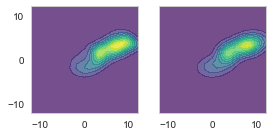

In [70]:
fig = plt.figure(figsize=(4.2,2.4))
ax1 = fig.add_subplot(1,2,1) 
plot_2d_prob_density(X, Y, kde_Z, ax=ax1,
                     xlabel='', ylabel='', colorbar=False)
ax1.grid(False)
ax2 = fig.add_subplot(1,2,2) 
plot_2d_prob_density(X, Y, pdf_Z, ax=ax2,
                     xlabel='', ylabel='', colorbar=False)
ax2.grid(False)
ax2.get_yaxis().set_visible(False)

In [71]:
def f(V,theta):
    return (mixed_model_pdf([[V*cos(theta),V*sin(theta)]]))*V

def f_em(V,theta):
    return (mixed_model_pdf_em([[V*cos(theta),V*sin(theta)]]))*V

In [72]:
%%time
x = arange(0, max_speed, 0.5)
_, y_weibull, y_cdf_weibull, weibull_params, y_ecdf = fit_weibull_and_ecdf(df.speed, x= x)

Wall time: 2.5 s


Speed Distribution Comparison
(0.94268386128684589, 0.70476475113867032, 0.92742786314942993)
Wall time: 9.95 s


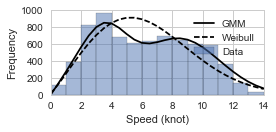

In [73]:
%%time
# Calculate Speed Distribution
# 1. GMM Model
y_ =[integrate.nquad(f, [[x_-0.01, x_+0.01],[0, 2*pi]]) for x_ in x]
y_gmm = array(list(zip(*y_))[0])/0.02

# 2. Weibull
y_weibul = sp.stats.weibull_min.pdf(x, *weibull_params)

# 3. Plot Comparison
df['speed'].hist(bins=arange(0, df.speed.max()), alpha=0.5, label='Data')
plot(x, y_gmm*len(df.speed),'-', color='black', label='GMM')
plot(x, y_weibul*len(df.speed), '--', color='black', label='Weibull') 
print('Speed Distribution Comparison')
plt_configure(xlabel='Speed'+speed_unit_text,
              ylabel='Frequency',legend=True, figsize=(4, 2))
plt.gca().set_ylim(bottom = 0)
plt.tight_layout()
plt.locator_params(axis='y', nbins=5)

# 4. R square for GMM, Weibull
print(R_square_for_speed(df['speed'], f, weibull_params, f_em))

In [74]:
%%time
y_ = [integrate.nquad(f, [[0, x_val],[0, 2*pi]]) for x_val in x]
y_cdf_gmm = array(list(zip(*y_))[0])

# 5.2. CDF Comaprison
plot(x, y_ecdf,'o', alpha=0.8, label='Data')
plot(x, y_cdf_gmm,'-', color='black',label='GMM')
plot(x, y_cdf_weibull,'--', color='black',label='Weibull')
plt_configure(xlabel = "V", ylabel='P', legend=True, figsize=(4,3))

plt.figure()
plot(log(x), log(-log(1-y_ecdf)),'o', label = 'Empirical')
plot(log(x), log(-log(1-y_cdf_weibull)),'--', label = 'Weibull')
plot(log(x), log(-log(1-y_cdf_gmm)),'-', color='black', label = 'GMM')
plt_configure(xlabel='ln(V)',ylabel='ln(-ln(1-P))',legend={'loc':'best'}, figsize=(4,3))
align_figures()

cdf_diff, cdf_diff_weibull= np.abs(y_ecdf - y_cdf_gmm), np.abs(y_ecdf - y_cdf_weibull)
print(cdf_diff.max(), cdf_diff_weibull.max()) 
print(x[cdf_diff.argmax()], x[cdf_diff_weibull.argmax()])

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: RuntimeWarning: divide by zero encountered in log
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:12: RuntimeWarning: divide by zero encountered in log
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:13: RuntimeWarning: divide by zero encountered in log


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAARYAAADSCAYAAACPQ+9ZAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzt3XtAzfcfx/HnqZSUa1Fuuc5tZhS55pbG3AklK2Y0zRhi
jNX83M3Eb+5s+5m2SK6Fcstly7USq4iFRCq60OneOd/fH82Zlrl2zil9Hn/pfM/5ft7H7NXn+/1+
LjJJkiQEQRBKkI62CxAE4e0jgkUQhBIngkUQhBIngkUQhBIngkUQhBIngkUQhBKn1mC5fPkyzs7O
xV4PDg7G3t4eBwcHdu7cqc4SBEHQAj11nXjLli34+/tjaGhY5PX8/HyWLl3Krl27MDQ0ZPTo0fTu
3RtTU1N1lSIIgoaprcdiYWHBmjVrir0eGxuLhYUFVatWRV9fHysrKy5evKiuMgRB0AK19Vj69u3L
3bt3i70ul8upXLmy6mcjIyPkcvkLzxcWFlai9QmC8PKsrKxe6f1qC5Z/Y2xsTGZmpurnzMzMIkHz
PK/65UpSWFiYaF+0r/F2w2OSOXbhDrF3kmliUYs+1hZYNq/Ft96h3H9Y/BdyHVNjZjm3Z8bqUzxr
to6OjoyVX/TgW+9Q7iU/Iv3BPVISb/Eo5T6P0xLJTLtHQeYD4u/eQ6koACA0NPSV69Z4sDRp0oS4
uDjS09OpVKkSoaGhfPLJJ5ouQxBKvfCYZLwPRQMgAfcfylU/J6ZkPvMziamFr5ubGBUJnpxsOQ8T
YslNv8OoUes4fyGUu/F3UCoVaqldY8ESEBBAVlYWDg4OzJkzh08++QRJkrC3t8fMzExTZQhCmXHs
wp1nvn78wp1iwfGEeQ0jJEninVp57P1lK3HXQ0lNiiM3+99vN+jpV8TJbSEf9rIiNvIMDx8+pH79
+hToViU+Tfe1aldrsNSrV0/1OHnQoEGq13v37k3v3r3V2bQglAlPLnUSUzIxNzFSXerA83slY/q1
VPVeCvLzyMxI5e6flzgWfYyvJ0SSl5dX5DNN3+1A544dUOY+Qi6X0759e1q1akWzZs1o2rQpFStW
LHzjkF7F2nud+5savxQSBKHQ05c6UPRSx7J5rX/tlVQxUBB/7SxXj/9MyG+nkD9OLfaeatWq0bJl
S2xtbenXrx+dOnVCV/f1eh+vQwSLIGjJ8y51LJsX3qj1PhRNZkYqBUoZkmTI7wc2E3ZiR5H36+rq
0rt3bwYOHIi1tTVt27b9uweiJSJYBEFL/u1S536KnEuXLhHg789hvz1cjbpCw1adSE+6TXpKIgAG
Bgb07NmTTz/9lAEDBqCvr6/J0l9IBIsgaMmzLnXSkuPZt3kmq6YnAyCTyQC4HX2OKlWq4OLiwqhR
o7Czsyt1YfK0chUsz7tRJgjq8Lx/c93bmrFo5UFiLgVjWrsxnfqORVdXD2V+DgYGBuTm5iKTyRg+
fDhdu3bls88+w8DAQMvf6OWUm2B50Y2y13X+/HmmTZtG06ZNkSSJgoICXFxc6N+//zPfn5CQwLVr
18RTsXLg3/7NRf8RwbmT/mzfvp3U1MIbr5mPU8h+lEBkaDCKggJq1KjB9OnTcXNzw8LCgrCwsDIT
KlCOguVFN8reRKdOnVi1ahVQOJLY2dmZRo0a0bJly2LvPXfuHDdv3hTBUg48/W8uJ/MxFY2qALBw
wTdc/+McZmZmDB06lBs3bhAVFcX921G89957TJ06lTFjxhSbwFuWlJtgedFIxZJiZGSEg4MDhw4d
4pdffiExMZHk5GR69+7N1KlT2bx5Mzk5ObRr147KlSuzdu1aJEkiMzOTlStX0qhRoxKtR9Ce+w8y
uHX1PBG/7yX+Rjgfz/OhcrWatOvlxEQXe/bv38++ffuQyWQMHTqUL774gh49eqjuq5Rl5SZYnjdS
saSZmJhw5MgR+vXrx8iRI8nNzaV79+5Mnz4dV1dXbt68ia2tLb/++isrVqzAzMyMjRs3EhQUhJub
W4nXI2hWTk4O3t7e+KxcSnLCLQDMG7QiW55OXo6cP37bhe+l0wAMHjyYxYsX07p1a22WXOLKTbA8
GRPwT7bWFiXeVkJCAu3ateOPP/7g3LlzGBsbFxsJCWBmZsbixYupVKkSSUlJWFpalngtguZIkoRM
JuPWrVu4urqiq6dHy/YfYNljJAaGxpw9vJWroUdAkujWrRvLli2ja9eu2i5bLcpNsDy5j3L8wh0S
UzMxr2GErRqeCsnlcvz8/BgxYgTZ2dksWLCAuLg4du7ciSRJ6OjooFQqAfDw8ODo0aMYGxsze/bs
Z85GFUq38Jhktu//jSP7t6EnU7Dlx5+wbNmSH3/8kb59+/Ln/Ww8PL7hzFE/FIp8mrzTgtVeKxgw
YMBbccnzb8pNsEBhuKjj8fK5c+dwdnZGR0cHhULBlClTaNSoEe7u7kRERKCvr0+DBg1ITk6mWbNm
bNiwgXfffZfBgwerbtKZmpqSnJxc4rUJ6nMwOIxZs+dyNewoSBLVTOvyv32XYGg7xo8fz759+5g8
eTIJCQk0aNCAhQsX4uTkpNGh9dpSroJFHTp27MjZs2efeczf37/Ya2ZmZhw+fBiAAQMGqLU2QX22
b9+Os8tYFAX5mNZujLWdM03fs0FHV5c9h8NYPPcH9uzZg76+PgsWLODLL78sU4+L35QIFkF4SXK5
nPT0dOrVq0enTp2oUsMc6z7OtLC0Raajg6RU8sfZA/wesJHcnEy6devGli1baNGihbZL1zgRLILw
Anl5eezcuZOff/6Zdu3aERgYSKNGjZi9YrdqGENacjzH/FZyL/YyFQ2N2LBhA66urujolM8ddkSw
CMJzBAUF8fnnnxMbG4uRkREdO3ZEoVCgq6uLXccG/BzwB6EndnD+yM8oCvJp3Lor69ato1/397Vd
ulaJYBGEf7Fx40bc3NzQ1dVl1KhRfP/990VWO6xZKZfTO+YREXYeoyo1GD52Nl98NharFmJFRBEs
gvAUpVJJSkoKNWvWZMSIEfyyfRftPxhPNtX4+Ug8faxlWDavRUBAAOPGjSM1NZWRI0eyadMmqlev
ru3yS43yeQEoCM9w9epVevToQf/+/VEoFNxJUdJh6NfIKtVRLWa91f8yY8Z9yuDBg8nKymLjxo34
+vqKUPkHESwlID4+nqlTpzJq1ChcXFxwdXXlxo0brFmzhpYtW5KUlKR6b0pKCu+++y579uzh7t27
NG/enM2bNxc536RJk565Na2gHjk5OXh6evL+++/z+++/U79+feRyebGJq+kP77FzzRR8ft5MixYt
uHDhAp9++ulbPdDtdb01l0KzZs3Cz8+vRM85cuRIVqxY8dz3ZGdn4+bmxsKFC2nXrh0AV65cYcGC
BVhbW9OwYUMCAwMZN24cAIcOHaJ27dqqz1tYWHD48GFcXV0BSEtLIy4uTmw5qyHXrl1jyJAhXL9+
nXr16rF27VqGDBkCFJ24GvvHaX7ft4a83Czete7H+eBdGBmV/Dyzt4XosbyhEydO0KlTJ1WoALRp
04Zt27YB0L9/f4KCgoq8v1evv1dCr169OiYmJsTGxgIQGBhIv379NFS9YG5uTkFBAVOnTiU6OloV
KlA4cbUgP49jO1cS7LscSVLS12kuYz9fKELlBd6aHsuKFSte2LtQh7t372Jh8fdERjc3N+RyOcnJ
ybRv357WrVtjaGhIfHw8SqUSc3PzYiMwBwwYwMGDB5k6dSrHjx9nxowZr7X7nPByEhMTWbp0Kd9+
+y3VqlXjypUrzwyK9xsasOrraSTeuYpJ7cYMHDuf6rXqq2Xi6tvmrQkWbTE3NycyMlL184YNGwAY
NWoUCkXhLnNPgqOgoIBBgwYREhJS5Bx9+vRhzJgxDB8+nJo1a2p9hfW3WVBQEGPHjiU5OZlWrVrR
oeewZy4dGRY

0.0296556528043 0.0644533481666
12.0 4.0
Wall time: 9.62 s


In [75]:
# Calculate Angle Distribution
x = linspace(0,2*pi, num=36+1)
y_ =[integrate.nquad(f, [[0, inf],[x_-pi/36, x_+pi/36]]) for x_ in x]
y = array(list(zip(*y_))[0])*len(df['dir']) 

df['dir'].hist(bins=DIR_BIN, alpha=0.5, label='Data')
plot(x/pi*180, y,'-', color='black', label='GMM')
plt_configure(xlabel='Direction'+dir_unit_text, ylabel='Frequency', 
              legend={'loc': 'best'} ,tight='xtight',figsize = (4,2))
plt.tight_layout()
dir_fig = plt.gcf()
print('Direction Distribution Comparison')

Direction Distribution Comparison


In [76]:
%%time
incre = max(SECTOR_LENGTH, 10)
density_collection=Parallel(n_jobs=-1)(delayed(direction_compare)(gmm, df, angle, incre) 
                                        for angle in arange(0, 360, incre))  
# This R square is computed as in paper 
# Comparison of bivariate distribution constructionapproaches for analysing wind speed anddirection data
# http://onlinelibrary.wiley.com/doi/10.1002/we.400/full
print(true_R_square(density_collection))

0.957411089396
Wall time: 7.59 s


## 6.3 Sectoral Comaprison

In [77]:
# %%time
# curve_collection=Parallel(n_jobs=-1)(delayed(direction_compare2)
#                                      (gmm, df, angle, incre, complex=True) for angle in arange(start, end, incre))  

In [78]:
# Calculate Speed Distribution
def model_data_comparison(df, original_incre = 10, incre = 10):
    start, end = -original_incre/2 + incre/2, 360
    curve_collection = []
    max_speed = df.speed.max()
    
    # Find a max count for plotting histogram
    max_count = max_count_for_angles(df, start, end, incre)
    plot_range = [0, max_speed, 0, max_count*1.05]
    
    for angle in arange(start, end, incre):
        angle_radian, incre_radian = np.radians([angle, incre])  
        start_angle, end_angle = angle-incre/2, angle+incre/2
        
        # 0. Select data from observation
        sub_df, sub_max_speed = select_df_by_angle(df, start_angle, end_angle)
        data_size = len(sub_df.speed)
        # 1. Get Weibull and ECDF
        x, y_weibull, y_cdf_weibull, weibull_params, y_ecdf = fit_weibull_and_ecdf(sub_df.speed)
        # 2. Get GMM PDF, CDF
        _, y_gmm, y_cdf_gmm, direction_prob = gmm_integration_in_direction(f, angle_radian-incre_radian/2, angle_radian+incre_radian/2, x)
        
        # 3. R square for GMM, Weibull
        bins = arange(0, sub_df.speed.max()+1)
        density, _ = np.histogram(sub_df['speed'], bins=bins, normed=True)
        density_expected_gmm_ =[integrate.nquad(f, [[x_, x_+1],[angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) 
                            for x_ in bins[:-1]]
        density_expected_gmm = array(list(zip(*density_expected_gmm_ ))[0])/direction_prob
        R_square_gmm = sector_r_square(density, density_expected_gmm)
        
        density_expected_weibull = sp.stats.weibull_min.cdf(bins[1:], *weibull_params) - sp.stats.weibull_min.cdf(bins[:-1], *weibull_params) 
        R_square_weibull = sector_r_square(density, density_expected_weibull)

        # 4. K-S for GMM, Weibull
        cdf_diff, cdf_diff_weibull= np.abs(y_ecdf - y_cdf_gmm), np.abs(y_ecdf - y_cdf_weibull)
                
        # 5. Make Plots
        fig = plt.figure(figsize=(10,1.9))
        # 5.1. Frequency Comparison
        ax1 = fig.add_subplot(1,3,1)        
        sub_df['speed'].hist(bins=arange(0, sub_max_speed), alpha=0.5, label='Data')                  
        plot(x, y_gmm*data_size,'-', color='black', label='GMM')
        plot(x, y_weibull*data_size, '--', color='black',label='Weibull')   
#         plt_configure(xlabel = "$V$", ylabel='Frequency', legend=True)
        plt_configure(xlabel = "V", ylabel='Frequency', legend=True)
        plt.axis(plot_range)
        
        # 5.2. CDF Comaprison
        ax2 = fig.add_subplot(1,3,2)
        plot(x, y_ecdf,'o', alpha=0.8, label='Data')
        plot(x, y_cdf_gmm,'-', color='black',label='GMM')
        plot(x, y_cdf_weibull,'--', color='black',label='Weibull')
        plt.gca().set_xlim(right = max_speed)
#         plt_configure(xlabel = "$V$", ylabel='$P$', legend=True)
        plt_configure(xlabel = "V", ylabel='P', legend=True)
        
        # 5.3. Weibull Comparison
#         ax3 = fig.add_subplot(1,3,3)
#         plot(log(x), log(-log(1-y_ecdf)),'o', alpha=0.8, label='Data')
#         plot(log(x), log(-log(1-y_cdf_gmm)),'-', color='black', label='GMM')
#         plot(log(x), log(-log(1-y_cdf_weibull)),'--',color='black',label='Weibull')
#         plt.gca().set_xlim(right = log(max_speed+1))
#         plt_configure(xlabel="ln(V)", ylabel="ln(-ln(1-P)",legend={'loc':'best'})
        
        curves = {'direction': angle, 'datasize': data_size, 'weight': direction_prob, 'x': x, 
                  'gmm_pdf': y_gmm, 'gmm_cdf': y_cdf_gmm,
                  'weibull_pdf': y_weibull, 'weibull_cdf': y_cdf_weibull, 'ecdf': y_ecdf,
                  'max_cdf_diff_gmm': cdf_diff.max(), 'max_cdf_diff_weibull': cdf_diff_weibull.max(), 
                  'r_square_gmm': R_square_gmm, 'r_square_weibull': R_square_weibull}
        curve_collection.append(curves)
        
        plt.tight_layout()
        plt.show()
        print('%s (%s - %s) degree' % (angle, start_angle, end_angle))
        print('data size:', len(sub_df), 'weight', len(sub_df)/len(df))
        print('GMM', 'Weibull')
        print('R square', R_square_gmm,  R_square_weibull)
        print('max diff:', cdf_diff.max(), cdf_diff_weibull.max(), 
              'speed value:', x[cdf_diff.argmax()], x[cdf_diff_weibull.argmax()], 'y gmm', y_cdf_gmm[cdf_diff.argmax()])
        print(' ')
    return curve_collection

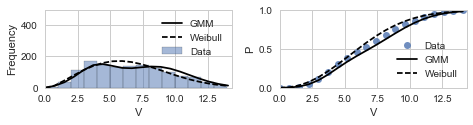

5.0 (-5.0 - 15.0) degree
data size: 1319 weight 0.18058598028477546
GMM Weibull
R square 0.919855970024 0.884773477165
max diff: 0.0597583603527 0.0610091158821 speed value: 8.15384905388 7.41259004898 y gmm 0.628641942907
 


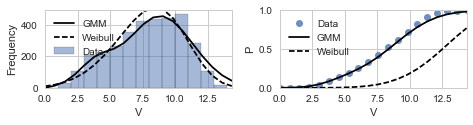

25.0 (15.0 - 35.0) degree
data size: 3378 weight 0.46248630887185105
GMM Weibull
R square 0.943740763308 0.915454947018
max diff: 0.0564794799537 0.579190350338 speed value: 11.3467990012 11.3467990012 y gmm 0.857374871734
 


45.0 (35.0 - 55.0) degree
data size: 800 weight 0.10952902519167579
GMM Weibull
R square 0.901229068527 0.842681451129
max diff: 0.0349942582926 0.120222218992 speed value: 5.42705580215 6.78381975269 y gmm 0.458755741707
 


65.0 (55.0 - 75.0) degree
data size: 132 weight 0.018072289156626505
GMM Weibull
R square 0.800065805744 0.84355253902
max diff: 0.11498989133 0.122000903617 speed value: 3.65429990614 2.43619993743 y gmm 0.521373745034
 


85.0 (75.0 - 95.0) degree
data size: 42 weight 0.005750273822562979
GMM Weibull
R square 0.916288157371 0.865590118087
max diff: 0.0932658584015 0.260414886509 speed value: 2.27787845434 2.27787845434 y gmm 0.450408715544
 


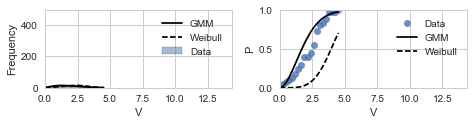

105.0 (95.0 - 115.0) degree
data size: 38 weight 0.0052026286966046
GMM Weibull
R square 0.374557207132 0.932487089993
max diff: 0.272104652172 0.603213325779 speed value: 2.37225739546 3.0839346141 y gmm 0.719473073225
 


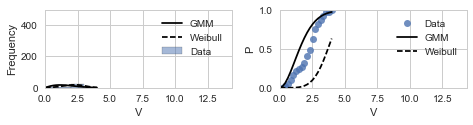

125.0 (115.0 - 135.0) degree
data size: 41 weight 0.005613362541073384
GMM Weibull
R square -0.489331264271 0.632911785959
max diff: 0.327462818872 0.626575087376 speed value: 1.89150612315 2.94234285824 y gmm 0.644535989604
 


145.0 (135.0 - 155.0) degree
data size: 27 weight 0.003696604600219058
GMM Weibull
R square 0.556346703348 0.822292584743
max diff: 0.264615566777 0.072335300389 speed value: 1.37886260814 1.37886260814 y gmm 0.375726677888
 


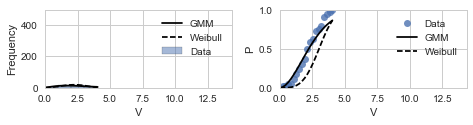

165.0 (155.0 - 175.0) degree
data size: 46 weight 0.006297918948521358
GMM Weibull
R square 0.7602736245 0.955427166469
max diff: 0.142751057784 0.343389395364 speed value: 3.62318307957 2.3444125809 y gmm 0.813770681346
 


185.0 (175.0 - 195.0) degree
data size: 67 weight 0.009173055859802848
GMM Weibull
R square 0.857420259158 0.898226922139
max diff: 0.124473842219 0.118904485427 speed value: 3.4335477486 1.47152046369 y gmm 0.621794814498
 


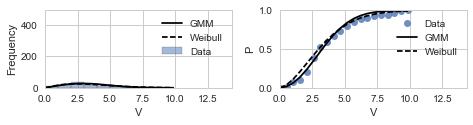

205.0 (195.0 - 215.0) degree
data size: 122 weight 0.016703176341730557
GMM Weibull
R square 0.800004262585 0.817144951382
max diff: 0.0655086934847 0.111580053098 speed value: 3.11316565825 1.55658282913 y gmm 0.467278191761
 


225.0 (215.0 - 235.0) degree
data size: 171 weight 0.023411829134720702
GMM Weibull
R square 0.757930595189 0.881154135678
max diff: 0.146580351734 0.0547107515795 speed value: 5.09626005119 2.26500446719 y gmm 0.865878597348
 


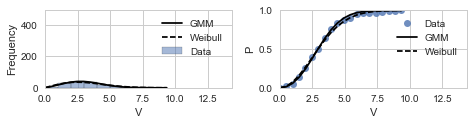

245.0 (235.0 - 255.0) degree
data size: 148 weight 0.020262869660460023
GMM Weibull
R square 0.944916096235 0.931454717754
max diff: 0.03841788037 0.0433869981515 speed value: 5.42155953232 3.94295238714 y gmm 0.943823285775
 


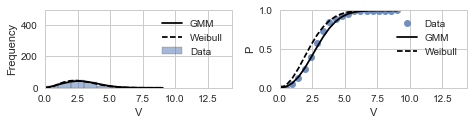

265.0 (255.0 - 275.0) degree
data size: 145 weight 0.019852135815991236
GMM Weibull
R square 0.962725788389 0.961470054428
max diff: 0.0779975432359 0.157763679223 speed value: 3.81362642374 1.90681321187 y gmm 0.770278318833
 


285.0 (275.0 - 295.0) degree
data size: 132 weight 0.018072289156626505
GMM Weibull
R square 0.817806364462 0.845499269936
max diff: 0.115035043059 0.0921741853035 speed value: 3.03376856378 1.89610535236 y gmm 0.581934653911
 


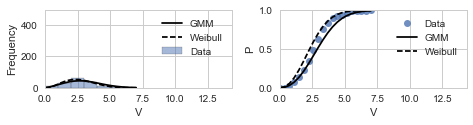

305.0 (295.0 - 315.0) degree
data size: 157 weight 0.021495071193866375
GMM Weibull
R square 0.843004294176 0.926758379914
max diff: 0.144814712441 0.129454405145 speed value: 3.32048535366 2.21365690244 y gmm 0.61951649775
 


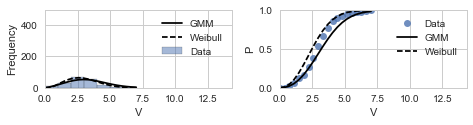

325.0 (315.0 - 335.0) degree
data size: 200 weight 0.027382256297918947
GMM Weibull
R square 0.827257861476 0.934405311776
max diff: 0.147695213712 0.149788184372 speed value: 4.06257406401 2.21594948946 y gmm 0.712304786288
 


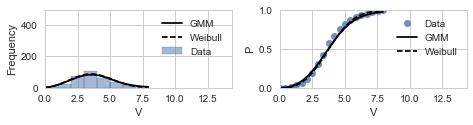

345.0 (335.0 - 355.0) degree
data size: 339 weight 0.04641292442497262
GMM Weibull
R square 0.908986253995 0.924381733862
max diff: 0.066334933595 0.078583002081 speed value: 3.76134427525 3.76134427525 y gmm 0.508886305343
 
Wall time: 34.6 s


In [79]:
%%time
if len(effective_column) == 16:
    rebinned_angle = 22.5
else: 
    rebinned_angle = 20
    
curve_collection = model_data_comparison(df, SECTOR_LENGTH, rebinned_angle)

0.902037727805246 0.8973137309824784


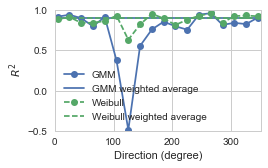

In [80]:
diff_df = pd.DataFrame(curve_collection) 

gmm_mean, weibull_mean = plot_sectoral_comparison(diff_df.r_square_gmm, diff_df.r_square_weibull, 
                                                  diff_df.direction, diff_df.datasize)
plt_configure(ylabel="$\ R^2$", xlabel='Direction'+dir_unit_text)
ylim = min(plt.gca().get_ylim()[0],0.75)
plt.gca().set_ylim(top=1, bottom=ylim)
plt.tight_layout()
print(gmm_mean, weibull_mean)

0.06880024360088327 0.3252842991015489


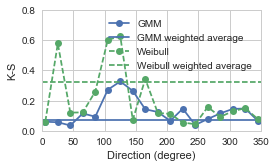

In [81]:
gmm_mean, weibull_mean = plot_sectoral_comparison(diff_df.max_cdf_diff_gmm, diff_df.max_cdf_diff_weibull, 
                                                  diff_df.direction, diff_df.datasize)
plt_configure(ylabel="K-S", xlabel='Direction'+dir_unit_text)
ylim = max(plt.gca().get_ylim()[1],0.25)
plt.gca().set_ylim(top=ylim, bottom=0)
plt.tight_layout()
print(gmm_mean, weibull_mean)

In [82]:
# Compare direction weight with previous figure
display(dir_fig)

## 6.4 Insufficient-fit Sector Investigation

### 6.4.1 Data Variability, by Bootstrap (Resampling)

In [83]:
angle =  max_diff_angle = diff_df.ix[diff_df['max_cdf_diff_gmm'].idxmax()]['direction']
incre = rebinned_angle

In [84]:
FRACTION = 1

# Select data from observation
start_angle, end_angle = angle-incre/2, angle+incre/2
angle_radian, incre_radian = radians(angle), radians(incre)  
sub_df, sub_max_speed = select_df_by_angle(df, start_angle, end_angle)

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:17: RuntimeWarning: divide by zero encountered in log
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:22: RuntimeWarning: divide by zero encountered in log
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:34: RuntimeWarning: divide by zero encountered in log


125.0 (115.0 - 135.0) Degree Speed Distribution
0.144358393065 2.0 0.680943758919


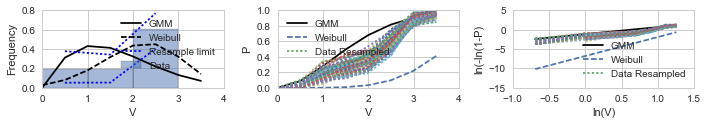

In [85]:
x = arange(0, sub_max_speed, 0.5)
_, y_weibull, y_cdf_weibull, weibull_params, y_ecdf = fit_weibull_and_ecdf(sub_df.speed, x)
_, y_gmm, y_cdf_gmm, direction_prob = gmm_integration_in_direction(f, angle_radian-incre_radian/2, angle_radian+incre_radian/2, x)

fig = plt.figure(figsize=(10,1.9))
ax1 = fig.add_subplot(1,3,1)   
ax2 = fig.add_subplot(1,3,2)   
ax3 = fig.add_subplot(1,3,3)   

# 1. Data
bins=arange(0, sub_max_speed)
sub_df['speed'].hist(ax=ax1, bins=bins, alpha=0.5, label='Data', normed=True)  

# 2. GMM
ax1.plot(x, y_gmm,'-', color='black', label='GMM')
ax2.plot(x, y_cdf_gmm,'-', color = 'black', label='GMM')
ax3.plot(log(x), log(-log(1-y_cdf_gmm)),'-', color = 'black',label='GMM')

# 3. Weilbull 
ax1.plot(x, y_weibull,'--',color='black',label='Weibull')
ax2.plot(x, y_cdf_weibull,'--',label='Weibull')
ax3.plot(log(x), log(-log(1-y_cdf_weibull)),'--',label='Weibull')

# 4. Data Resampled
count_collection = []
for i in range(1,100):
    sub_df_resampled = sub_df.sample(frac=FRACTION, replace=True)    
    resampled_count, _ = np.histogram(sub_df_resampled['speed'], bins=bins, normed=True) 
    count_collection.append(resampled_count)
    
    ecdf = sm.distributions.ECDF(sub_df_resampled.speed)
    y_ecdf = ecdf(x) 
    ax2.plot(x, y_ecdf,':', label='Data Resampled')
    ax3.plot(log(x), log(-log(1-y_ecdf)),':', label='Data Resampled')
    if i == 1: 
#         plt_configure(ax=ax2, xlabel = "$V$", ylabel='$P$', legend={'loc':'best'})
#         plt_configure(ax=ax3, xlabel="ln($V$)", ylabel="ln(-ln(1-$P$)",legend={'loc':'best'})
        plt_configure(ax=ax2, xlabel = "V", ylabel='P', legend={'loc':'best'})
        plt_configure(ax=ax3, xlabel="ln(V)", ylabel="ln(-ln(1-P)",legend={'loc':'best'})

print('%s (%s - %s) Degree Speed Distribution' % (angle, start_angle, end_angle))
count_collection = np.array(count_collection)
mx, mn = np.max(count_collection,0), np.min(count_collection,0)
ax1.plot(bins[1:]-0.5, mx, ':', color='blue')
ax1.plot(bins[1:]-0.5, mn, ':', color='blue', label='Resample limit')
ax1.set_ylim(bottom = 0)
# plt_configure(ax=ax1, xlabel='$V$',ylabel='Frequency',legend={'loc':'best'})
plt_configure(ax=ax1, xlabel='V', ylabel='Frequency',legend={'loc':'best'})
ax1.locator_params(axis='y', nbins=5)
ax2.locator_params(axis='y', nbins=5)
ax3.locator_params(axis='y', nbins=5)
plt.tight_layout()
diff = abs(y_ecdf - y_cdf_gmm)
print(diff.max(), x[diff.argmax()], y_cdf_gmm[diff.argmax()])

### 6.4.2 Time Variability

In [86]:
fig_time_variability_3d = plt.figure()
ax1 = fig_time_variability_3d.gca(projection='3d')

fig_time_variability_cdf,ax2 = plt.subplots(figsize=(3,1.8))
fig_time_variability_weibull, ax3 = plt.subplots(figsize=(3,1.8))

ax2.plot(x, y_cdf_gmm,'-', color='black', label = 'GMM')
ax2.plot(x, y_cdf_weibull,'--', label='Weibull')

ax3.plot(log(x), log(-log(1-y_cdf_gmm)),'-', color='black',label='GMM')
ax3.plot(log(x), log(-log(1-y_cdf_weibull)), '--', label='Weibull')

# 3. Data
prop_cycle=iter(mpl.rcParams['axes.color_cycle'])
for start_time in range(20000000, 20150000, 50000):
    end_time = start_time + 50000 
    time_label = start_time//10000
    df_other_years = df_all_years.query('(date >= @start_time) & (date < @end_time)')
    df_other_years_at_angle, sub_max_speed_other_year = select_df_by_angle(df_other_years, start_angle, end_angle)
    if len(df_other_years_at_angle) > 0 :
        
        ecdf = sm.distributions.ECDF(df_other_years_at_angle.speed)
        y_ecdf = ecdf(x)
        ax2.plot(x, y_ecdf,':', label = time_label)
        ax3.plot(log(x), log(-log(1-y_ecdf)),':', label = time_label)
        
        title = '%s - %s' %(time_label, time_label+4)
        count, division = np.histogram(df_other_years_at_angle['speed'], normed=True,
                                       bins=arange(0, sub_max_speed_other_year))
        ax1.bar(left=division[:-1], height=count, zs=time_label, zdir='x', 
                color=next(prop_cycle), alpha=0.8)
        x_3d = time_label*np.ones_like(x)
        ax1.plot(x_3d, x, y_gmm, '-', color='black', label='GMM'  if time_label == 2010 else '')
        ax1.plot(x_3d, x, y_weibull, '--', color='blue', label='Weibull' if time_label == 2010 else '')
        
print('%s (%s - %s) Degree Speed Distribution' % (angle, start_angle, end_angle))
ax1.set_ylim(bottom = 0)
ax1.set_zlabel('Frequency')
plt_configure(ax=ax1, xlabel='Time',ylabel='V', legend=True)
# plt_configure(ax=ax2, xlabel = "$V$", ylabel='$P$', legend={'loc':'best'})
# plt_configure(ax=ax3, xlabel="ln($V$)", ylabel="ln(-ln(1-$P$)", legend={'loc':'best'})
plt_configure(ax=ax2, xlabel = "V", ylabel='P', legend={'loc':'best'})
plt_configure(ax=ax3, xlabel="ln(V)", ylabel="ln(-ln(1-P)", legend={'loc':'best'})

ax1.set_zlim(bottom = 0)
align_figures()

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: RuntimeWarning: divide by zero encountered in log
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: RuntimeWarning: divide by zero encountered in log
D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:25: RuntimeWarning: divide by zero encountered in log


125.0 (115.0 - 135.0) Degree Speed Distribution


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAcwAAAE5CAYAAAAdhBAsAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsnXl4VOXZ/7/nzJp9skwSAklIAogUEbGWIoK41qKobUXc
EK1rN6tWW2urpchLUbQWq/Kr1VZtXRAVlVeRFgRRRF9FAePCGlbJLFlnP+vvj/gcz5zMcmbNDPN8
rstLMpOc58ycmed77vu57+/DyLIsg0KhUCgUSkzYoT4BCoVCoVDyASqYFAqFQqHogAomhUKhUCg6
oIJJoVAoFIoOqGBSKBQKhaIDKpgUCoVCoeiACiaFQqFQKDqggkmhUCgUig6oYFIoFAqFogMqmBQK
hUKh6IAKJoVCoVAoOqCCSaFQKBSKDqhgUigUCoWiAyqYFAqFQqHogAomhUKhUCg6oIJJoVAolKxx
8OBB3HTTTbj44otx5ZVX4vrrr8euXbvw17/+FcceeywcDofyu11dXfjWt76Fl19+GYcOHcIxxxyD
xx57LOx4N954I+bOnZuVc6eCSaFQKJSsEAgE8JOf/ARXX301XnjhBTz99NP4+c9/jgULFgAARo4c
idWrVyu//8Ybb2DYsGHKz01NTVizZo3yc09PD/bv35+18zdmbSQKhUKh5Ay33347VqxYkdZjzp49
G0uWLIn6/Pr16/Hd734XJ5xwgvLYhAkT8PTTT+Phhx/GzJkz8eabb+Kqq65Sfv+0005TfreyshI2
mw179uxBW1sbVq9ejXPOOQcfffRRWl9HNGiESaFQKJSscOjQITQ1NSk//+QnP8HcuXNxzjnnoLOz
EzU1NSgqKsLBgwexf/9+1NfXw2KxhB3j3HPPxeuvvw4AWLduHc4888ysnT+NMCkUCqUAWbJkScxo
MBPU19ejvb1d+XnZsmUAgIsvvhiiKAL4RhAFQcCsWbOwadOmsGOceeaZuPzyy/HDH/4QdrsdVqs1
a+dPI0wKhUKhZIUzzjgDmzdvxtatW5XH9u/fj87OTjAMAwD43ve+h3Xr1uGjjz7C5MmTBx2jpKQE
LS0tWLJkCc4777ysnTtABZNCoVAoWaKkpATLli3DU089hSuuuAKXXHIJ7rzzTvz2t79FQ0MDAKCs
rAz19fUYN24cWDayRM2aNQtbtmzBlClTsnn6YGRZlrM6IoVCoVAoeQiNMCkUCoVC0QEVTAqFQqFQ
dECrZCkFiSRJEAQBHMfBYDCAZVkYDAYYDAal+IBCoVDUUMGkFBSSJMHhcKCyslL5WZZlyLIMn88H
j8eDhoYGsCwLhmGokFIoFAUqmJSCQJIkiKIISZJw5MgR2Gw2SJIEnudhMpkUMSQCSnrCSE0cwzCK
gFIhpVAKEyqYlKMaknpVF4PLsgyXy4Xu7m4wDANRFGE2m8GyLARBgM/ng9lshtFoDBNDvUJqNBqV
nykUytEDLfqhHJWIogiO48BxnCJugiAoOyFwHIeWlha0tLSgtbUVtbW1sFgskGUZPT09OHDgAPbs
2YMDBw6gs7MTPT098Pl8ivgSoQS+EVJBEBAKhZTUrtfrhd/vRyAQQCgUgiiKoF1clEJm3rx52L59
O4CB7+CJJ56Ixx9/XHl+7ty5+OKLLwb93caNG7F8+XIcOnQIF198se7xpk6dqhx3z549KZ49jTAp
RxmiKCqpVyJqgiDA7Xajp6cH5eXlYFkWw4YNg8FgUIp+ioqKIMsyQqEQRowYoRwrFAqB4ziEQiF4
vV5FgC0WC8xmM8xms/LveBFpKBQCALAsq0SgJK1LI1JKITB16lR89NFHmDBhArZs2YJTTjkFb7/9
Nq699lqEQiEcPnwYY8eOHfR306dPBzDgRTuUUMGkHBVEEkqe5+F2u9Hb24uKigq0tbXBbDbD4/GE
pVSjYTAYUFxcjOLi4rDHSXUtEVOv14tQKASGYcIElPxbu86pFlKe55WIlayLqv9NhZSSSUaOHPzY
pZcCf/pTcs/v2xd7vJNPPhmPPvoofvzjH+Ptt9/G7Nmzcf/998Pj8eCzzz7Dd77zHXz44Yd48MEH
YTAY0NjYiAULFmDVqlXYu3cvLrnkEnR3d+PGG29EV1cXZsyYgZ/97Ge44447MHPmTEyfPh0bN27E
G2+8gcWLFyf2ZuiACiYlr4kklBzHwe12o6+vDzabDaNGjYLJZIp7LIZhdKVMjUYjjEZjmJASESQi
GgwG0d/fD47jwDCMIqJqMSXiqE7tCoKg/JsIqVo4RVGMKMIUSj4wbtw47N27F7Is48MPP8Stt96K
KVOm4L333sOOHTtwyimn4K677sKzzz6L6upq/OUvf8HKlSthNH4jVX6/H0uWLEFxcTEuv/xynHHG
GVk7fyqYlLxDluWwqle1ULpcLvT396OyshKjR48O+6IR9ApjIjAMowhpSUlJ2LmStU2O4xAIBNDb
26ukgtUiSv5PxFFduStJEgBg9+7dGDlypFJYpC02Uv8dhRKPeBFhqs9rYVkWY8eOxcaNG2G322E2
mzF9+nRs2LABX375JS6//HLcdddduPnmmwEAwWAQJ598Mpqbm5VjjB07FmVlZQCA4447Dh0dHWFj
ZLJOgAomJW+IJpShUAgulwsejwdVVVVRhZIQTTAzJaQmk2lQhCvLMnieVwqT/H6/IqRGo3HQ+igR
UnJMIFxI1SnmaGukFEouMHXqVPztb3/DueeeCwA48cQT8eijjwIY2CC6vr4ejz76KMrKyrBu3ToU
FxfjyJEjyt/v2bMHPp8PFosF27dvx5w5c7B582a4XC4AwOeff56xc6eCScl5iFBqK1RDoRCcTie8
Xq8uodQylJEYWe80m81hjxMhVa+PchwHnudhNBohSRK6u7thtVqVv9dGlWoh5ThOGU8rpNoiJQol
G5x88sn4/e9/j/vuuw8AYDabUVZWhmOPPRYsy+J3v/sdrr/+esiyjJKSEtx3331hgllRUYFbbrkF
3d3dmDlzJkaNGoXZs2fjzjvvxKpVqzAy0sJrmqC7lVByFrIuSNoxyOQeDAbhcrng9XpRXV2N6upq
GAwG3cfdtWsXGhsbYbVaFUEBgFAohCNHjmT0C5cssiyD4zgcOHAANptNEVVBEGAymQaldtVmDNGO
BwwWUqPRSNdHKZQo0AiTknNEEkqGYRAIBOByueD3+1FdXY2GhoaEhJKQidRrpiGFQwzDoKqqSnnd
xK2IRKSk0IgIqXZ9lAhpIhEpdTWiUAaggknJGWRZVpr9KyoqlInd7/fD5XIhEAigpqYGI0aMSHlN
LltrmJmGZVlYLBZYLJawxyVJCmt9IeujxNVI2/oSqWCICKn6PSHpXGoPSClEqGBShhx1ROn3+9Hf
3w+bzQa/3w+n04lgMAi73Y7Gxsa0FK8UwuTOsiysViusVmvY42oHpFAoBL/fj1AoBEmSIra+RFrn
1NoDkvFIWpfneVit1rhpYQol36CCSRkyIqVeWZYFz/Po6OgAx3Gw2+1oampKa5VnNqtkcw3ialRU
VBT2OBFSbbGRLMsRW19imTHs27cPDQ0NSgqZGtZTjhaoYFKyTrRiHq/XC4fDAY7j0NDQAJvNlpGJ
VS2MhSCSeogmpPFcjbRiajAYwq4p3fmFcjRBBZOSNdQm5cA3qVGPxwOn0wlRFFFeXg6/36/sV5lN
qHgOJhlXI3Xri56INFpql+78Qsk1qGBSMg4xGyATJBGm/v5+uFwuSJKE2tpaRSz9fn9Gz4cKY2rE
czXav38/jEYjgsEg+vr6dLkaqY9BDespuQoVTErGULvykDSdLMvo6+tTXDnsdjvKy8uViS8bYlbI
a5iZhLgaMQwDm82mmEjEcjUyGAwRi41iCanWsF7b/kKFlJIpqGBS0k4koQSA3t5euFwusCyL2tpa
lJWVDZrYqGj

### 6.4.3 Adjacent Sector Variability

In [87]:
incre = rebinned_angle
angle_group = [max_diff_angle-incre, max_diff_angle, max_diff_angle+incre]

In [88]:
fig_adjecent_variability_3d = plt.figure()
ax1 = fig_adjecent_variability_3d.gca(projection='3d')
fig_adjecent_variability_cdf, ax2 = plt.subplots(figsize=(3,1.8))
fig_adjecent_variability_weibull, ax3 = plt.subplots(figsize=(3,1.8))

legend_3d = False
prop_cycle=iter(mpl.rcParams['axes.color_cycle'])

curve_df = pd.DataFrame(curve_collection)

for angle in angle_group:
    curves = curve_df.query('direction == @angle%360').T.to_dict()
    curves = curves[list(curves)[0]]
    data_size, x =  curves['datasize'], curves['x']
    y_gmm, y_cdf_gmm =  curves['gmm_pdf'], curves['gmm_cdf'] 
    y_weibull, y_cdf_weibull, y_cdf = curves['weibull_pdf'],  curves['weibull_cdf'], curves['ecdf']

    linestyle = '-' if angle == max_diff_angle else ':'
    alpha = 0.7 if angle == max_diff_angle else 0.3

    ax2.plot(x, y_gmm*data_size, linestyle, label=angle)        
    ax3.plot(x, y_weibull*data_size, linestyle, label=angle)

    start_angle, end_angle = angle-incre/2, angle+incre/2
    sub_df, sub_max_speed = select_df_by_angle(df, start_angle, end_angle)

    x_3d = angle*np.ones_like(x)
    ax1.plot(x_3d, x, y_gmm*data_size, color='black', label='GMM')
    ax1.plot(x_3d, x, y_weibull*data_size, color='blue', linestyle='--',label='Weibull')

    count, division = np.histogram(sub_df['speed'], bins=arange(0, sub_max_speed))
    ax1.bar(left=division[:-1], height=count, zs=angle, zdir='x', color=next(prop_cycle), alpha=0.8)

    if legend_3d == False:
        ax1.legend()
        legend_3d = True
        
plt_configure(ax=ax1, xlabel='Direction', ylabel='Speed')   
plt_configure(ax=ax2, xlabel='V',ylabel='Frequency',legend={'loc':'best'})
plt_configure(ax=ax3, xlabel='V',ylabel='Frequency',legend={'loc':'best'})
ax1.set_zlabel('Frequency')
ax1.set_zlim(bottom = 0)
ylim = max(ax1.get_ylim()[1],ax3.get_ylim()[1])
ax2.set_ylim(bottom = 0, top=ylim)
ax3.set_ylim(bottom = 0, top=ylim)

print(max_diff_angle) 
print('GMM, Weibull, Histogram')
align_figures()

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


125.0
GMM, Weibull, Histogram


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAcwAAAE5CAYAAAAdhBAsAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsnXmYHFW5/79V1dv0bD37kpnJLAkJSQxLhBCC0StwidFc
uVdAFgEDsv1QiCgQMeBluSIJYHAJeuG6sCjLFTQIyDVRiEBAEAgmQDKZJetMb9Pd03t1Lb8/hlOp
7um9q2t6es7nefJktq5T1V1V33rPed/vy8iyLINCoVAoFEpa2KneAQqFQqFQpgNUMCkUCoVCyQIq
mBQKhUKhZAEVTAqFQqFQsoAKJoVCoVAoWUAFk0KhUCiULKCCSaFQKBRKFlDBpFAoFAolC6hgUigU
CoWSBVQwKRQKhULJAiqYFAqFQqFkARVMCoVCoVCygAomhUKhUChZQAWTQqFQKJQsoIJJoVAoFEoW
UMGkUCgUim4cPHgQ1113Hc477zxccskluPLKK9Hf348f//jHOPbYY2G325W/dbvdWLhwIZ555hkc
OnQI8+bNw3//93/Hbe/qq6/GxRdfrMu+U8GkUCgUii6Ew2Fcc801WLNmDZ566ik88sgj+PrXv447
7rgDANDd3Y0XX3xR+fsXXngBbW1tyvddXV146aWXlO89Hg/279+v2/4bdBuJQqFQKCXDjTfeiKef
flrTbZ577rnYuHFjyt//9a9/xSmnnIITTjhB+dnixYvxyCOP4Cc/+QlWrVqFP/3pT/jqV7+q/P2/
/Mu/KH9bV1cHm82GgYEB9PX14cUXX8TKlSvx9ttva3ocqaARJoVCoVB04dChQ+jq6lK+v+aaa3Dx
xRdj5cqVGB0dRWNjIyoqKnDw4EHs378fra2tMJvNcdv4/Oc/j+effx4AsG3bNpxxxhm67T+NMCkU
CmUGsnHjxrTRYDFobW3Frl27lO8ffPBBAMB5550HURQBHBVEQRCwevVqvPbaa3HbOOOMM3DRRRfh
P/7jP9DU1ASLxaLb/tMIk0KhUCi6cPrpp2PHjh147733lJ/t378fo6OjYBgGAHDWWWdh27ZtePvt
t7F06dJJ26isrERPTw82btyIL3zhC7rtO0AFk0KhUCg6UVlZiQcffBC//vWv8ZWvfAXnn38+brnl
FnznO99Be3s7AKC6uhqtra1YsGABWDa5RK1evRr/+Mc/sGzZMj13H4wsy7KuI1IoFAqFMg2hESaF
QqFQKFlABZNCoVAolCygWbKUGYkkSRAEATzPg+M4sCwLjuPAcZySfEChUChqqGBSZhSSJMFut6Ou
rk75XpZlyLKMYDAIv9+P9vZ2sCwLhmGokFIoFAUqmJQZgSRJEEURkiRhZGQENpsNkiQhFovBaDQq
YkgElNSEkZw4hmEUAaVCSqHMTKhgUsoaMvWqTgaXZRlOpxNjY2NgGAaiKMJkMoFlWQiCgGAwCJPJ
BIPBECeG2QqpwWBQvqdQKOUDTfqhlCWiKILnefA8r4ibIAhKJwSe59HT04Oenh709vaiubkZZrMZ
sizD4/HgwIEDGBgYwIEDBzA6OgqPx4NgMKiILxFK4KiQCoKAaDSqTO0GAgGEQiGEw2FEo1GIogha
xUWZyVx66aV4//33AUxcg0uWLMHDDz+s/P7iiy/Ghx9+OOl127dvx5NPPolDhw7hvPPOy3q85cuX
K9sdGBgocO9phEkpM0RRVKZeiagJggCXywWPx4OamhqwLIu2tjZwHKck/VRUVECWZUSjUXR0dCjb
ikaj4Hke0WgUgUBAEWCz2QyTyQSTyaR8nSkijUajEAQBHo8HbW1tYBhGmdalESllJrB8+XK8/fbb
WLx4Mf7xj3/gtNNOwyuvvIKvfe1riEajOHz4MObPnz/pdStWrAAw4UU7lVDBpJQFyYQyFovB5XLB
6/WitrYWfX19MJlM8Pv9cVOqqeA4DlarFVarNe7nJLuWiGkgEEA0GgXDMHECSr5Wr3OS5CIipLFY
TIlYybqo+msqpJRi0t09+WcXXADcfXd+vx8eTj/eqaeeis2bN+Oyyy7DK6+8gnPPPRf33nsv/H4/
du/ejZNPPhlvvfUWfvjDH4LjOHR2duKOO+7Ac889h8HBQZx//vkYGxvD1VdfDbfbjc985jO49tpr
sW7dOqxatQorVqzA9u3b8cILL+AHP/hBbm9GFlDBpExrkgklz/NwuVzw+Xyw2WyYM2cOjEZjxm0x
DJPVlKnBYIDBYIgTUhJNEhGNRCIYHx8Hz/NgGEYRUY7jlAQkIo5qMRUEQfmaCKlaOKmQUqYzCxYs
wODgIGRZxltvvYUbbrgBy5Ytw+uvv449e/bgtNNOw6233orf/OY3aGhowKZNm/Dss8/CYDgqVaFQ
CBs3boTVasVFF12E008/Xbf9p4JJmXbIshyX9aoWSqfTifHxcdTV1WHu3LlxFxohW2HMBYZhFCGt
rKyM21eytsnzPMLhMCRJwuDgIDiOi4tIyf9EDNWZu5IkKdsj47EsOynZSP06CiUTmSLCQn+fCMuy
mD9/PrZv346mpiaYTCasWLECL7/8Mj766CNcdNFFuPXWW7F27VoAQCQSwamnnorZs2cr25g/fz6q
q6sBAJ/4xCcwNDQUN0Yx8wSoYFKmDamEMhqNwul0wu/3o76+PqVQElIJZrGE1Gg0KhEuz/M4fPgw
uru7EYvFlMSkUCgEr9cLnudhMBgmrY+qhZSQTkiDwSAqKipgsViUiJRCKQWWL1+On//85/j85z8P
AFiyZAk2b94MYKJBdGtrKzZv3ozq6mps27YNVqsVIyMjyusHBgYQDAZhNpvx/vvv48tf/jJ27NgB
p9MJAPjggw+Ktu9UMCklDxHKsbExeL1edHV1KULpcDgQCASyEspEpiISI6JM1jtNJlPc72VZRiwW
i1sf5XkesVgMBoNhUjRqMpkmRZWSJMHtdqOuri5lRMpx3KQkJQpFD0499VSsX78eGzZsAACYTCZU
V1fj2GOPBcuy+O53v4srr7wSsiyjsrISGzZsiBPM2tpafPOb38TY2BhWrVqFOXPm4Nxzz8Utt9yC
5557Dt3JFl41gnYroZQsZF2QlGMEAgG43W60trbC6XQiEAigoaEBDQ0N4Dgu6+329/ejs7MTFosF
PM8rP49GoxgZGSnqBReLxXDw4EH09vbm9DpZlpVoVJ25KwgCjEbjpKldu92O+vr6uOnhxO0Bk4XU
YDBQMwYKJQU0wqSUHIlCqV6jDIfDGB4eRkNDA9rb23MSSkIxpl6LDUkcMpvNyvoNAMWtiIgoSTSK
xWKw2+2oqKiIE1PiapRqapc8QKiFlLoaUSgTUMGklAyphDIUCsHpdCIUCoFlWcydO7fgNTm91jCL
DcuyipCqOXjwIKqqqsCyLHieV9ZHiatRYulLsoQhIqTq94RM55K/JVPLVEgpMwEqmJQpJ51QOhwO
RCIRNDU1oaGhAXa7vWCxnOqbu16ibDKZJk3Jqh2QotEoQqEQotEoJElKuj6abJ2T1JCKooiBgQHl
AYb67FLKHSqYlCkjlVAGg0E4HA7wPI+mpiZ0dXWBZVmEw2FNxEbPLNlkY+hFsrGIq1FFRUXcz4mQ
JiYbybKctPQlMcqkhvWUmQAVTIruJBNKAAgEAnA4HBAEAU1NTbDZbHE3Vq0ETb2d6TgNWwxSCWk6
VyOj0QhZluH1epO6GgHZG9ZTIaVMB6hgUnRDbVIOHI2A/H4/HA4HRFFEc3MzamtrU944iyluVDwn
k87VKBwOY3R0NKWrUbKINHEb5GtCMjMG6mpEKRWoYFKKjiiK8Hg8qKqqAnBUmMbHx+F0OiFJEpqb
m1FTU5P2xliMCJOSO6T8xGq1gmEYtLa2AjjqakQi0kgkAp/Ppxjcp3M1IiQzrJckCQ6HAx0dHdSw
njKlUMGkFA3

# 7. Result Variability & Cross-Validation

In [89]:
if 'bandwidth' not in globals():
    bandwidth = DEFAULT_BANDWDITH    
if 'FIT_METHOD' not in globals():
    FIT_METHOD = 'square_error'       
if 'KDE_KERNEL' not in globals():
    KDE_KERNEL = 'gaussian'
    
config = {'bandwidth': bandwidth, 
          'fitting_range': FITTING_RANGE,
          'fit_limit': fit_limit,
          'kde_kernel': KDE_KERNEL}

print(bandwidth, FIT_METHOD)

0.7 square_error


## 7.1 Variability of the Result

weight mean_x  mean_y  sig_x  sig_y    corr
1  0.604  7.613   3.207  2.697  1.586   0.270
2  0.262  1.044  -1.197  2.895  1.757   0.297
3  0.134  3.193   1.358  1.295  1.277  -0.189

GMM Plot Result
0.604248699919 [[ 7.61293774  3.20710295]] [ 1.49985311  2.74572085] -77.0682110354
0.261887863779 [[ 1.04444095 -1.19722528]] [ 1.63905186  2.96353835] -75.1394237883
0.133863436302 [[ 3.19323639  1.35776401]] [ 1.15777038  1.40283448] -132.908378538


R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.991  0.020      0.094  1.379719e-07      0.016       0.234

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.992  0.019      0.129  1.275953e-07      0.016       0.225

weight mean_x  mean_y  sig_x  sig_y    corr
1  0.574  7.908   3.257  2.605  1.543   0.242
2  0.233  3.341   1.203  1.550  1.501  -0.042
3  0.193  0.436  -1.557  2.678  1.571   0.107

GMM Plot Result
0.573935831078 [[ 7.90750807  3.25680721]] [ 1.47464675  2.64420254] -78.072250141
0.233099009659 [[ 3.3414151  1.2028643]] [ 1.48498558  1.56577116] -116.487504045
0.192965159263 [[ 0.43558728 -1.55672595]] [ 1.5574281   2.68565854] -84.5816852485


R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.992  0.020      1.147  1.322529e-07      0.016       0.229

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.992  0.026      0.438  1.310416e-07      0.016       0.228

weight mean_x  mean_y  sig_x  sig_y    corr
1  0.603  7.628   3.260  2.693  1.587   0.283
2  0.281  1.440  -0.957  2.912  1.855   0.415
3  0.116  3.251   1.416  1.289  1.200  -0.092

GMM Plot Result
0.602910606572 [[ 7.62763653  3.260426  ]] [ 1.49207857  2.74648857] -76.4677523237
0.281195173686 [[ 1.4404595  -0.95728702]] [ 1.60954689  3.05510001] -69.1818707101
0.115894219741 [[ 3.25104181  1.41555867]] [ 1.17089199  1.31616716] -116.080534266


R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.992  0.021      0.202  1.332981e-07      0.016       0.230

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.992  0.022      0.123  1.297263e-07      0.016       0.227

weight mean_x  mean_y  sig_x  sig_y    corr
1  0.597  7.805   3.237  2.597  1.567   0.262
2  0.223  3.279   1.090  1.440  1.543  -0.075
3  0.180  0.061  -1.614  2.510  1.587   0.033

GMM Plot Result
0.597192905399 [[ 7.80533884  3.23711419]] [ 1.48497228  2.64439599] -76.7841266541
0.222948010336 [[ 3.2788172  1.0895999]] [ 1.41458382  1.56644242] -156.281468855
0.179859084265 [[ 0.06093212 -1.61443662]] [ 1.5859266   2.51121407] -88.0080463997


R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.991  0.021      1.162  1.411606e-07      0.016       0.237

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.992  0.028      0.543  1.303645e-07      0.016       0.227

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.616   7.724   3.186  2.654  1.664   0.346
2  0.222   3.147   1.033  1.414  1.678   0.069
3  0.163  -0.206  -1.582  2.367  1.608  -0.004

GMM Plot Result
0.615502677712 [[ 7.72358952  3.18554529]] [ 1.50994639  2.74437541] -72.2097042097
0.221985156025 [[ 3.14658442  1.0333221 ]] [ 1.40226398  1.6873836 ] 169.052911148
0.162512166263 [[-0.20649111 -1.58196249]] [ 1.60771264  2.36746342] -90.3077785028


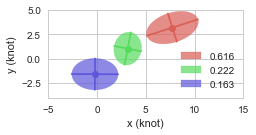

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.991  0.023      0.975  1.508418e-07      0.017       0.245

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.992  0.029      0.791  1.349316e-07      0.016       0.231

weight mean_x  mean_y  sig_x  sig_y   corr
1  0.488  8.211   3.455  2.436  1.517  0.165
2  0.332  3.688   1.417  1.928  1.572  0.128
3  0.180  0.336  -1.736  2.698  1.486  0.169

GMM Plot Result
0.488195960517 [[ 8.21113346  3.45513109]] [ 1.48387655  2.45581369] -80.7356081705
0.332040036084 [[ 3.68761189  1.41706944]] [ 1.53629881  1.95648062] -74.0036527026
0.179764003399 [[ 0.33604016 -1.73562012]] [ 1.45616136  2.71440789] -82.5075036315


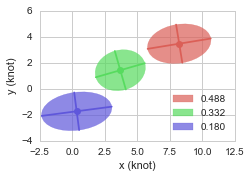

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.992  0.020      1.931  1.271316e-07      0.017       0.224

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.991  0.018      0.507  1.541610e-07      0.017       0.247

weight mean_x  mean_y  sig_x  sig_y    corr
1  0.601  7.683   3.227  2.647  1.611   0.321
2  0.209  0.326  -1.628  2.564  1.687   0.170
3  0.191  3.268   1.092  1.482  1.511  -0.058

GMM Plot Result
0.60064932373 [[ 7.68263611  3.22659012]] [ 1.48491007  2.71934038] -74.1032564329
0.20857408199 [[ 0.32604054 -1.62823821]] [ 1.644871    2.59060466] -79.242899791
0.19077659428 [[ 3.26796425  1.09198945]] [ 1.45022036  1.54183757] -144.303127047


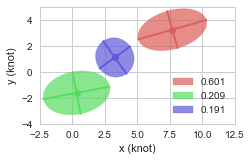

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.991  0.018      0.256  1.467051e-07      0.016       0.241

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.992  0.019      0.175  1.301181e-07      0.016       0.227

weight mean_x  mean_y  sig_x  sig_y   corr
1  0.556  7.965   3.344  2.535  1.558  0.252
2  0.259  3.418   1.174  1.634  1.538  0.015
3  0.184  0.361  -1.616  2.483  1.632  0.060

GMM Plot Result
0.556219004101 [[ 7.96547317  3.3435955 ]] [ 1.48139751  2.58119962] -76.7603346054
0.259397573679 [[ 3.41753612  1.17406082]] [ 1.53668547  1.63525484] -83.1154490645
0.18438342222 [[ 0.36114047 -1.61583882]] [ 1.62639644  2.486111  ] -86.0575228748


R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.992  0.019      0.948  1.276582e-07      0.016       0.225

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.992  0.022      0.423  1.300988e-07      0.016       0.227

weight mean_x  mean_y  sig_x  sig_y    corr
1  0.609  7.682   3.194  2.626  1.593   0.289
2  0.273  1.325  -0.917  2.944  1.850   0.399
3  0.118  2.949   1.461  1.034  1.456  -0.057

GMM Plot Result
0.608788008231 [[ 7.68164595  3.19353944]] [ 1.49138585  2.68498721] -75.4855377191
0.27315752448 [[ 1.32529884 -0.91688508]] [ 1.62498158  3.07385923] -70.1942918514
0.118054467289 [[ 2.94895564  1.46108121]] [ 1.03081205  1.45838505] -175.324920443


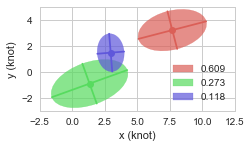

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.993  0.020      0.132  1.075538e-07      0.014       0.207

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.989  0.028      0.143  1.707674e-07      0.018       0.260

weight mean_x  mean_y  sig_x  sig_y    corr
1  0.591  7.759   3.263  2.610  1.554   0.288
2  0.273  1.397  -0.951  2.939  1.933   0.367
3  0.136  3.204   1.420  1.241  1.403  -0.108

GMM Plot Result
0.590633225353 [[ 7.75936377  3.26324517]] [ 1.45740707  2.66538574] -75.983980553
0.27303521775 [[ 1.39726375 -0.95068004]] [ 1.72286919  3.06696411] -69.7924620287
0.136331556897 [[ 3.20350483  1.42017233]] [ 1.21173535  1.4283479 ] -159.398406581


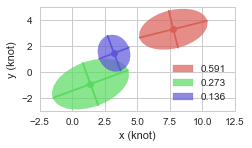

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.992  0.019      0.164  1.238231e-07      0.015       0.222

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.992  0.024      0.155  1.272777e-07      0.016       0.225


Wall time: 11.3 s


In [90]:
%%time
results = Parallel(n_jobs=-1)(delayed(resampled_fitting)(df, FIT_METHOD, NUMBER_OF_GAUSSIAN, config) for i in range(10))                        
for result in results:
    display(pretty_print_gmm(result['gmm']))
    fig,ax = plt.subplots(figsize=(3.5,3.5))
    plot_gmm_ellipses(result['gmm'],ax=ax, xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)
    plt.show()
    
    display(gof_df(result['gmm_pdf_result'], result['kde_result']))
    display(gof_df(result['gmm_pdf_result'], kde_result))
    print('')

## 7.2 Cross-validation, to select the number of Gaussian

In [91]:
%%time
from sklearn.cross_validation import train_test_split, KFold

## 5-fold cross validation
gaussian_number_range = arange(1,6)
CV_result_train_all,CV_result_test_all =[],[]
number_of_fold = 4
print('Number of train/test dataset', len(df)*(number_of_fold-1)/number_of_fold, len(df)/number_of_fold) 

for number_of_gaussian in gaussian_number_range:
    print( '  ')
    print('Number of gaussian', number_of_gaussian)
    
    kf = KFold(len(df), n_folds=number_of_fold, shuffle=True) 

    CV_result = Parallel(n_jobs=-1)(delayed(fit_per_fold)(df, train_index, test_index, FIT_METHOD, number_of_gaussian, config) for train_index, test_index in kf)                        

    CV_result_train, CV_result_test = list(zip(*CV_result))
    CV_result_train, CV_result_test = list(CV_result_train), list(CV_result_test)
        
    CV_result_train_all.append(CV_result_train)
    CV_result_test_all.append(CV_result_test)
    
    print('Train')
    pretty_pd_display(CV_result_train)
    print('Test')
    pretty_pd_display(CV_result_test)

Number of train/test dataset 5478.0 1826.0
  
Number of gaussian 1
Train


Chi_square       K_S       MSE  RMSE / Max  RMSE / Mean  R_square
0    0.320733  0.065727  0.000001    0.053731     0.760613  0.911479
1    0.263538  0.066025  0.000001    0.053072     0.765252  0.909057
2    0.243242  0.064603  0.000001    0.053496     0.743136  0.914109
3    0.304533  0.064344  0.000001    0.054207     0.764961  0.908625

Test


Chi_square       K_S       MSE  RMSE / Max  RMSE / Mean  R_square
0    0.244511  0.063982  0.000002    0.055586     0.784334  0.901387
1    0.648507  0.050466  0.000001    0.053254     0.752555  0.913351
2    0.949695  0.082435  0.000002    0.057293     0.861607  0.886581
3    0.204138  0.072256  0.000001    0.051992     0.740500  0.917207

  
Number of gaussian 2
Train


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.092315  0.028551  2.530730e-07    0.023368     0.317168  0.984267
1    0.099002  0.029565  2.878556e-07    0.023550     0.337932  0.982213
2    0.089997  0.029266  2.671991e-07    0.022748     0.325308  0.983669
3    0.097445  0.030666  2.761161e-07    0.023068     0.331131  0.983170

Test


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.153389  0.038371  4.835444e-07    0.027564     0.436978  0.971377
1    0.052954  0.029855  4.095947e-07    0.029117     0.403358  0.975345
2    0.221910  0.037900  3.690830e-07    0.028033     0.383858  0.976936
3    0.225792  0.035696  3.577650e-07    0.026823     0.376424  0.977474

  
Number of gaussian 3
Train


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.066882  0.018821  1.079235e-07    0.014542     0.206839  0.993380
1    0.238675  0.019004  1.127925e-07    0.014935     0.211762  0.993056
2    0.202971  0.020165  1.237642e-07    0.015689     0.221611  0.992419
3    0.904467  0.020154  1.339649e-07    0.016406     0.230494  0.991710

Test


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.994270  0.015211  2.265332e-07    0.021596     0.300320  0.985978
1    1.120422  0.036817  3.063451e-07    0.024648     0.347715  0.981342
2    0.225774  0.026018  2.719043e-07    0.023057     0.328523  0.983179
3    0.098455  0.026726  1.626559e-07    0.017625     0.254321  0.990202

  
Number of gaussian 4
Train


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.101092  0.007229  4.486654e-08    0.009494     0.133380  0.997245
1    0.231687  0.009346  4.638712e-08    0.009516     0.135791  0.997128
2    0.139159  0.007979  4.217737e-08    0.009086     0.129396  0.997403
3    0.136117  0.009405  4.841388e-08    0.009881     0.138530  0.997039

Test


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.175662  0.015353  1.324202e-07    0.015904     0.229524  0.991831
1    0.063427  0.022106  1.868330e-07    0.019724     0.271614  0.988784
2    0.561395  0.025952  1.594549e-07    0.018145     0.251431  0.990256
3    0.624129  0.022729  2.386818e-07    0.020450     0.308301  0.985183

  
Number of gaussian 5
Train


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.264094  0.005812  1.990692e-08    0.006353     0.088872  0.998774
1    0.110697  0.004011  1.695219e-08    0.005822     0.082024  0.998951
2    0.104638  0.005448  1.733902e-08    0.005801     0.082958  0.998944
3    0.319655  0.006663  1.849235e-08    0.006033     0.085663  0.998860

Test


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.342235  0.018396  1.321581e-07    0.015681     0.229084  0.991940
1    1.272068  0.026857  1.689490e-07    0.018091     0.258897  0.989848
2    0.180514  0.030666  1.435949e-07    0.017173     0.238656  0.990946
3    0.072794  0.020507  1.970215e-07    0.020001     0.279638  0.988035

Wall time: 41.4 s


In [92]:
train_scores_mean, train_scores_std = generate_mean_std_gof(CV_result_train_all)
print('Train gof mean, std')
display(train_scores_mean)

test_scores_mean, test_scores_std = generate_mean_std_gof(CV_result_test_all)
print('Test gof mean, std')
display(test_scores_mean)

Train gof mean, std


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
1    0.283011  0.065175  1.449897e-06    0.053627     0.758490  0.910818
2    0.094690  0.029512  2.710609e-07    0.023183     0.327885  0.983330
3    0.353249  0.019536  1.196113e-07    0.015393     0.217676  0.992641
4    0.152014  0.008490  4.546123e-08    0.009494     0.134274  0.997204
5    0.199771  0.005484  1.817262e-08    0.006002     0.084880  0.998882

Test gof mean, std


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
1    0.511713  0.067285  1.557091e-06    0.054531     0.784749  0.904632
2    0.163511  0.035455  4.049968e-07    0.027884     0.400155  0.975283
3    0.609730  0.026193  2.418596e-07    0.021732     0.307720  0.985175
4    0.356153  0.021535  1.793475e-07    0.018556     0.265218  0.989013
5    0.466903  0.024107  1.604309e-07    0.017736     0.251569  0.990192

R_square

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


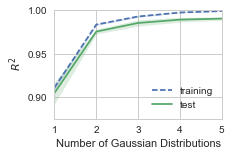

K_S


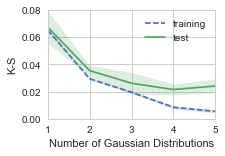

Chi_square


In [93]:
prop_cycle=mpl.rcParams['axes.color_cycle']
gaussian_number_range = train_scores_mean.index
for column, column_name in zip(['R_square','K_S','Chi_square'],["$\ R^2$", "K-S", "$\widetilde{\chi^2} $"]):
    plot(gaussian_number_range, train_scores_mean[column],
             '--', label = 'training', color=prop_cycle[0])
    plt.fill_between(gaussian_number_range, 
                     train_scores_mean[column] - train_scores_std[column],
                     train_scores_mean[column] + train_scores_std[column], 
                     alpha=0.2, color=prop_cycle[0])
    
    plot(gaussian_number_range, test_scores_mean[column],
             '-', label = 'test',color=prop_cycle[1])
    plt.fill_between(gaussian_number_range, 
                 test_scores_mean[column] - test_scores_std[column],
                 test_scores_mean[column] + test_scores_std[column], 
                 alpha=0.2,color=prop_cycle[1])
    plt.xticks(gaussian_number_range)
    print(column)
    plt.locator_params(axis='y', nbins=5)
    plt_configure(xlabel='Number of Gaussian Distributions', ylabel=column_name, 
                  figsize=(3,2), legend={'loc':'best'})
    if column == 'R_square':
        plt.gca().set_ylim(top=1)
    if column == 'K_S' or column == 'Chi_square':
        plt.gca().set_ylim(bottom=0)
    plt.show()

In [94]:
fig = plt.figure(figsize=(4.2,2.4))
ax1 = fig.add_subplot(1,2,1) 
plot_2d_prob_density(X, Y, kde_Z, ax=ax1,
                     xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text, colorbar=False)
ax1.grid(False)
ax2 = fig.add_subplot(1,2,2) 
plot_2d_prob_density(X, Y, pdf_Z, ax=ax2,
                     xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text, colorbar=False)
ax2.grid(False)
ax2.get_yaxis().set_visible(False)

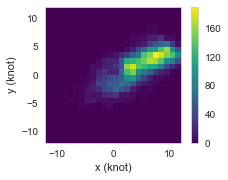

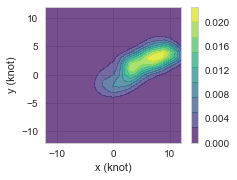

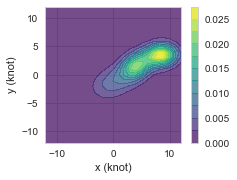

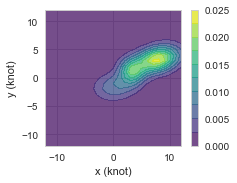

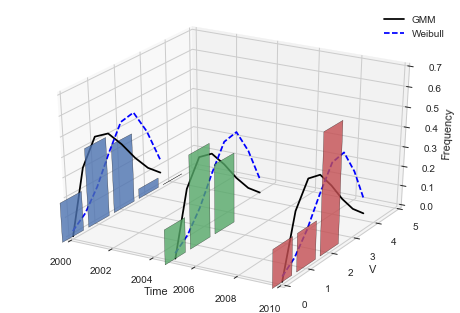

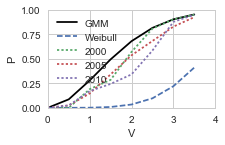

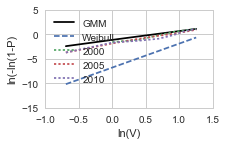

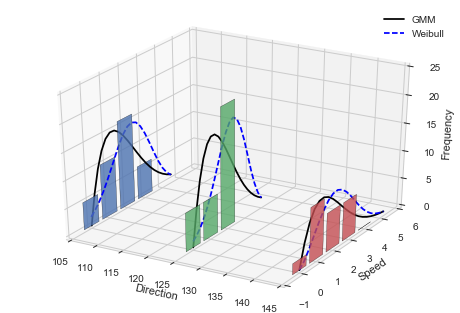

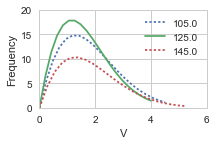

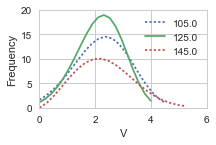

In [95]:
for fig in [fig_hist, fig_kde, fig_em, fig_gmm]:
    display(fig)
for fig in [fig_time_variability_3d, fig_time_variability_cdf, fig_time_variability_weibull, 
            fig_adjecent_variability_3d, fig_adjecent_variability_cdf, fig_adjecent_variability_weibull,]:
    display(fig)

In [96]:

import time
save_notebook()
time.sleep(3)
location_name = get_location_name(file_path)
print(location_name)
current_file = 'GMM.ipynb'
output_file = './output_HTML/'+location_name+'.html' 

output_HTML(current_file, output_file)

8N67W
